In [2]:
import random
import statistics
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm # importing colormap
from matplotlib import colors
plt.style.use('fivethirtyeight')

In [3]:
probSusceptible=0.7
probInfected=1-probSusceptible
probCatch=0.5
probBeSusceptible=0.5

In [4]:
noOfSusceptsAtAnyTime,noOfInfectsAtAnyTime=[],[]
no_of_suscepts,no_of_infects=0,0

In [5]:
def initGrid(m,n,probOfSuscept):
    grid_states=np.full((m,n),0) # mxn mtrx where each value is filled with 
    
    global no_of_suscepts
    global no_of_infects
    
    for r in range(m):
        for c in range(n):
            #print(probOfSuscept,"**calc prob**")
            if(random.uniform(0,1)>=probOfSuscept):
                no_of_infects+=1
                no_of_suscepts-=1
                if(random.uniform(0,1)>0.5):
                    grid_states[r][c]=2
                else:
                    grid_states[r][c]=1
    return grid_states

In [6]:
def reflectingLat(lat,m,n):
    row1=lat[0,:]
    row2=lat[m-1,:]
    latNS=np.insert(lat,0,row1,axis=0)
    latNS=np.insert(latNS,m+1,row2,axis=0)
    
    col1=latNS[:,0]
    col2=latNS[:,n-1]
    extendLat=np.insert(latNS,0,col1,axis=1)
    extendLat=np.insert(extendLat,n+1,col2,axis=1)
    return extendLat

In [7]:
def absorbingLat(lat,m,n,constVal):
    noOfRows,noOfCols=len(lat),len(lat[0])
    
    row1=row2=np.zeros(noOfCols)+constVal
    latNS=np.insert(lat,0,row1,axis=0) # axis=0 means insert along the axis of row
    latNS=np.insert(latNS,m+1,row2,axis=0)
    
    col1=col2=np.zeros(noOfRows+2)+constVal
    extendLat=np.insert(latNS,0,col1,axis=1)
    extendLat=np.insert(extendLat,n+1,col2,axis=1)
    return extendLat

In [8]:
def periodicLat(lat,m,n):
    row1=lat[0,:]
    row2=lat[m-1,:]
    latNS=np.insert(lat,0,row2,axis=0)
    latNS=np.insert(latNS,m+1,row1,axis=0)
    
    col1=latNS[:,0]
    col2=latNS[:,n-1]
    extendLat=np.insert(latNS,0,col2,axis=1)
    extendLat=np.insert(extendLat,n+1,col1,axis=1)
    return extendLat

In [9]:
def applyRule(own_state,N,E,S,W):
    global no_of_suscepts
    global no_of_infects
    if(own_state==0 ):
        if((N==1 or N==2) or (E==1 or E==2) or (S==1 or S==2) or (W==1 or W==2)):
            own_state=1 # if any of the neighbour of a susceptible person is infected then he will become infected 
            no_of_infects+=1
            no_of_suscepts-=1
    else:
        own_state+=1
        #own_state%=8
        if(own_state==1):
            no_of_infects+=1
            no_of_suscepts-=1
        elif(own_state==3):
            no_of_infects-=1
        elif(own_state==8):
            if(random.uniform(0,1)<probBeSusceptible):
                own_state%=8
                no_of_suscepts+=1
            else:
                own_state-=1
    return own_state

In [10]:
def applyRule2(own_state,N,E,S,W):
    global no_of_suscepts
    global no_of_infects
    if(own_state==0 ):
        if((N==1 or N==2) or (E==1 or E==2) or (S==1 or S==2) or (W==1 or W==2)):
            if(random.uniform(0,1)<probCatch):
                own_state=1 # if any of the neighbour of a susceptible person is infected then he will become infected 
                no_of_infects+=1
                no_of_suscepts-=1
    else:
        own_state+=1
        #own_state%=8
        if(own_state==1):
            no_of_infects+=1
            no_of_suscepts-=1
        elif(own_state==3):
            no_of_infects-=1
        elif(own_state==8):
            if(random.uniform(0,1)<probBeSusceptible):
                own_state%=8
                no_of_suscepts+=1
            else:
                own_state-=1
    return own_state

In [11]:
def applyRule3(own_state,N,E,S,W):
    global no_of_suscepts
    global no_of_infects
    
    neighb_vals=[N,E,S,W]
    no_of_sick_neighs=0
    
    if(own_state==0):
        for value in neighb_vals:
            if(value==1 or value==2):
                no_of_sick_neighs+=1
        if(random.uniform(0,1)<no_of_sick_neighs/4):
            own_state=1 # if any of the neighbour of a susceptible person is infected then he will become infected 
            no_of_infects+=1
            no_of_suscepts-=1
    else:
        own_state+=1
        #own_state%=8
        if(own_state==1):
            no_of_infects+=1
            no_of_suscepts-=1
        elif(own_state==3):
            no_of_infects-=1
        elif(own_state==8):
            if(random.uniform(0,1)<probBeSusceptible):
                own_state%=8
                no_of_suscepts+=1
            else:
                own_state-=1
    return own_state

In [12]:
def applyRule4(own_state,N,E,S,W):
    global no_of_suscepts
    global no_of_infects
    
    neighb_vals=[N,E,S,W]
    lev_of_inf_of_neighs=0
    
    if(own_state==0):
        for value in neighb_vals:
            if(value==1 or value==2):
                lev_of_inf_of_neighs+=(1/value)
        if(random.uniform(0,1)<lev_of_inf_of_neighs/4):
            own_state=1 # if any of the neighbour of a susceptible person is infected then he will become infected 
            no_of_infects+=1
            no_of_suscepts-=1
    else:
        own_state+=1
        #own_state%=8
        if(own_state==1):
            no_of_infects+=1
            no_of_suscepts-=1
        elif(own_state==3):
            no_of_infects-=1
        elif(own_state==8):
            if(random.uniform(0,1)<probBeSusceptible):
                own_state%=8
                no_of_suscepts+=1
            else:
                own_state-=1# means he's immunity is for more than 3 days
    return own_state

In [13]:
def applyRuleOnExtendedGrid(extendBar,m,n,rule=1):
    newBar=np.full((m,n),0)
    for r in range(1,m+1): # rows going from 1 to m
        for c in range(1,n+1):
            val=0
            if(rule==1):
                val=applyRule(extendBar[r][c],extendBar[r-1][c],extendBar[r][c+1],extendBar[r+1][c],extendBar[r][c-1])
            elif(rule==2):
                val=applyRule2(extendBar[r][c],extendBar[r-1][c],extendBar[r][c+1],extendBar[r+1][c],extendBar[r][c-1])
            elif(rule==3):
                val=applyRule3(extendBar[r][c],extendBar[r-1][c],extendBar[r][c+1],extendBar[r+1][c],extendBar[r][c-1])
            elif(rule==4):
                val=applyRule4(extendBar[r][c],extendBar[r-1][c],extendBar[r][c+1],extendBar[r+1][c],extendBar[r][c-1])
            newBar[r-1][c-1]=val     
    return newBar     

In [14]:
def DiseaseSpreadSim(m,n,probOfSuscept,typeOfBndryCond,noOfDays,rule=1):
    noOfSusceptsAtAnyTime.clear()
    noOfInfectsAtAnyTime.clear()
    global no_of_suscepts
    global no_of_infects
    
    no_of_suscepts,no_of_infects=m*n,0
    
    grid_states=initGrid(m,n,probOfSuscept)
    grids=[]
    grids.append(grid_states)
    
    noOfSusceptsAtAnyTime.append(no_of_suscepts)
    noOfInfectsAtAnyTime.append(no_of_infects)
    
    for i in range(noOfDays): # t is the no of days for which we want to run the simulation
#         print('init bar for below:- ')
#         print(bar)
#         print('**************')
        if(typeOfBndryCond=='reflecting'): gridExtended=(reflectingLat(grid_states,m,n)).copy()
        elif(typeOfBndryCond=='periodic'): gridExtended=(periodicLat(grid_states,m,n)).copy()
        elif(typeOfBndryCond=='absorbing'): gridExtended=(absorbingLat(grid_states,m,n,constVal)).copy()
#         print('extended bar for below:- \n')
#         print(barExtended)
#         print('*******************')
        grid_states=applyRuleOnExtendedGrid(gridExtended,m,n,rule)# apply rule on gridExtended()
        grids.append(grid_states)
        noOfSusceptsAtAnyTime.append(no_of_suscepts)
        noOfInfectsAtAnyTime.append(no_of_infects)
        #print(bar)
    print(len(grids))
    return grids

In [15]:
rows,cols=6,2

In [92]:
probSusceptible=0.5

In [93]:
grids1=DiseaseSpreadSim(10,10,probSusceptible,'reflecting',rows*cols-1)

12


In [32]:
cmp = np.array([[0.00, 1.00, 0.00], [0.00, 0.00, 1.00], \
                    [0.00, 0.00, 0.50], [1.00, 0.00, 0.00], \
                    [0.80, 0.00, 0.00], [0.60, 0.00, 0.00], \
                    [0.40, 0.00, 0.00], [0.20, 0.00, 0.00]],'f')
colormap=colors.ListedColormap(cmp)

In [31]:
def animDiseaseSpread(grids,v_min_val=0,v_max_val=7): # as possibe states in the grid are from 0 to 7
    fig,ax=plt.subplots(rows,cols,figsize=(15,40)) #fig,ax=plt.supbplots(rows,cols,figsize=(15,40))
    for i in range(rows):
        for j in range(cols):
            ax[i][j].pcolormesh(grids[i*cols+j],cmap=colormap,vmin=v_min_val,vmax=v_max_val)
            #ax[i][j].colorbar()          

# Q1 

## For Prob_of_susceptibles=0.5 

In [163]:
grids1

[array([[2, 1, 0, 0, 2, 2, 1, 1, 2, 0],
        [1, 0, 2, 2, 2, 1, 0, 0, 1, 1],
        [0, 0, 0, 1, 0, 0, 2, 0, 2, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 2, 0],
        [0, 0, 0, 0, 1, 2, 0, 1, 1, 0],
        [2, 1, 2, 1, 0, 1, 1, 0, 0, 0],
        [2, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [2, 0, 2, 1, 0, 2, 0, 1, 0, 0],
        [1, 0, 0, 0, 2, 0, 0, 0, 2, 0],
        [1, 2, 0, 0, 0, 0, 2, 0, 1, 0]]),
 array([[3, 2, 1, 1, 3, 3, 2, 2, 3, 1],
        [2, 1, 3, 3, 3, 2, 1, 1, 2, 2],
        [1, 0, 1, 2, 1, 1, 3, 1, 3, 1],
        [0, 0, 0, 1, 2, 1, 1, 1, 3, 1],
        [1, 1, 1, 1, 2, 3, 1, 2, 2, 1],
        [3, 2, 3, 2, 1, 2, 2, 1, 1, 0],
        [3, 1, 1, 1, 0, 1, 1, 2, 1, 0],
        [3, 1, 3, 2, 1, 3, 1, 2, 1, 0],
        [2, 1, 1, 1, 3, 1, 1, 1, 3, 1],
        [2, 3, 1, 0, 1, 1, 3, 1, 2, 1]]),
 array([[4, 3, 2, 2, 4, 4, 3, 3, 4, 2],
        [3, 2, 4, 4, 4, 3, 2, 2, 3, 3],
        [2, 1, 2, 3, 2, 2, 4, 2, 4, 2],
        [1, 1, 1, 2, 3, 2, 2, 2, 4, 2],
        [2, 2, 2, 2, 3, 4, 2, 3, 3, 

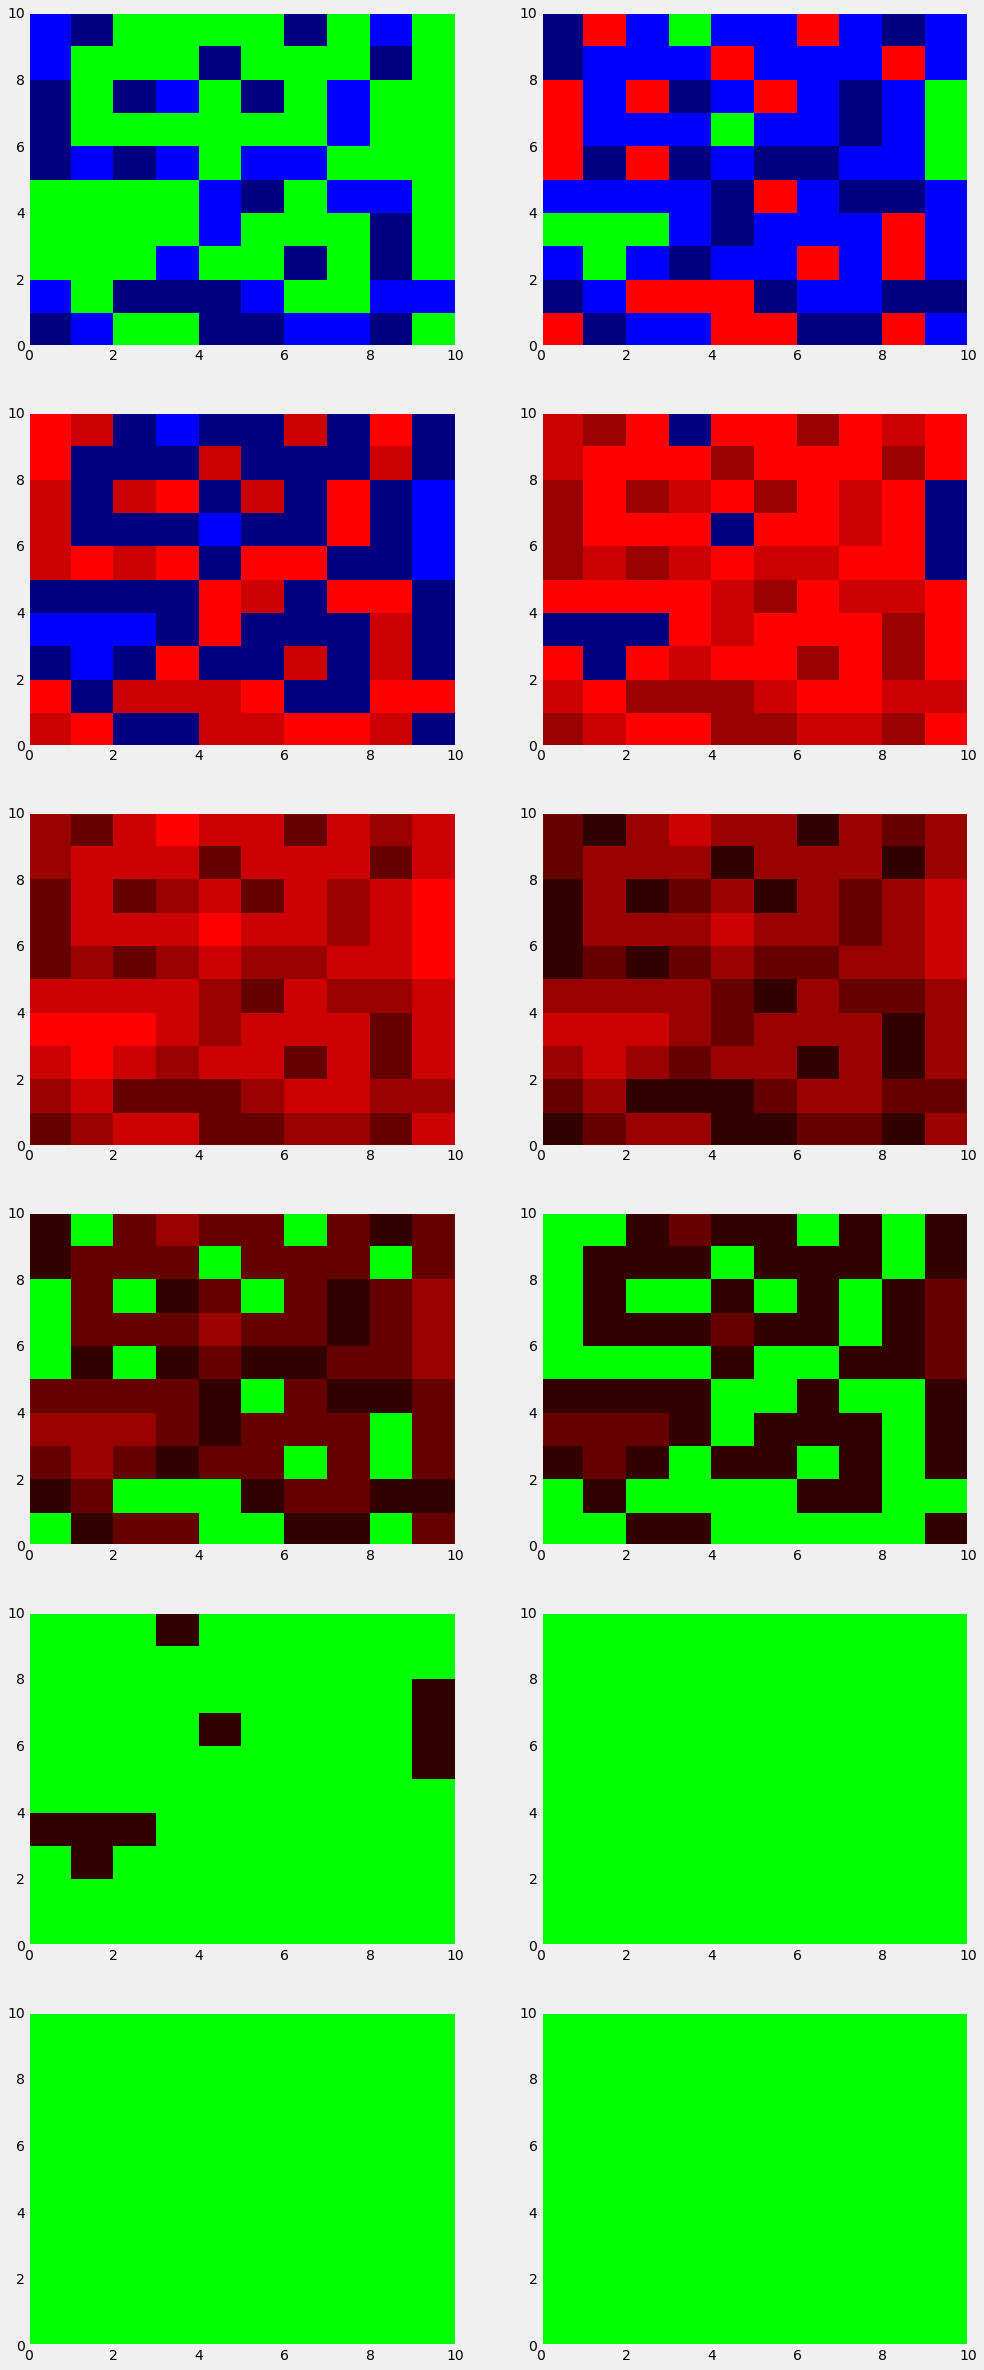

In [164]:
animDiseaseSpread(grids1)

In [96]:
print(noOfInfectsAtAnyTime)
print(noOfSusceptsAtAnyTime)

noOfInfectsAtAnyTime1=noOfInfectsAtAnyTime.copy()
noOfSusceptsAtAnyTime1=noOfSusceptsAtAnyTime.copy()

[43, 70, 57, 9, 0, 0, 0, 0, 0, 0, 0, 0]
[57, 9, 0, 0, 0, 0, 21, 43, 91, 100, 100, 100]


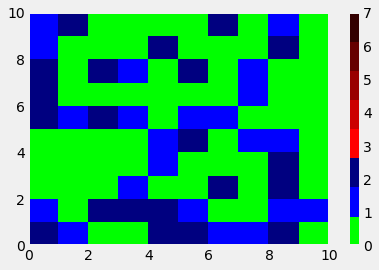

In [168]:
plt.pcolormesh(grids1[0],cmap=colormap,vmin=0,vmax=7)
plt.colorbar()
#ax[i][j].pcolormesh(grids1[i*cols+j],cmap=colormap,vmin=v_min_val,vmax=v_max_val)

## For Prob_of_susceptibles=0.4

In [ ]:
probSusceptible=0.4
grids2=DiseaseSpreadSim(10,10,probSusceptible,'reflecting',rows*cols-1)

In [187]:
grids2

[array([[1, 0, 2, 2, 1, 0, 2, 0, 2, 2],
        [1, 1, 1, 1, 1, 0, 2, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 1, 0, 0, 2],
        [2, 2, 1, 1, 2, 2, 2, 0, 2, 0],
        [2, 2, 2, 2, 1, 1, 0, 0, 0, 1],
        [2, 2, 2, 1, 0, 1, 0, 1, 0, 1],
        [2, 1, 0, 0, 0, 0, 0, 2, 0, 2],
        [1, 0, 1, 1, 0, 1, 1, 2, 0, 2],
        [0, 2, 1, 0, 2, 1, 0, 2, 1, 0],
        [0, 0, 0, 0, 2, 1, 1, 0, 0, 0]]),
 array([[2, 1, 3, 3, 2, 1, 3, 1, 3, 3],
        [2, 2, 2, 2, 2, 1, 3, 1, 1, 1],
        [1, 1, 2, 1, 1, 1, 2, 1, 1, 3],
        [3, 3, 2, 2, 3, 3, 3, 1, 3, 1],
        [3, 3, 3, 3, 2, 2, 1, 1, 1, 2],
        [3, 3, 3, 2, 1, 2, 1, 2, 1, 2],
        [3, 2, 1, 1, 0, 1, 1, 3, 1, 3],
        [2, 1, 2, 2, 1, 2, 2, 3, 1, 3],
        [1, 3, 2, 1, 3, 2, 1, 3, 2, 1],
        [0, 1, 1, 1, 3, 2, 2, 1, 1, 0]]),
 array([[3, 2, 4, 4, 3, 2, 4, 2, 4, 4],
        [3, 3, 3, 3, 3, 2, 4, 2, 2, 2],
        [2, 2, 3, 2, 2, 2, 3, 2, 2, 4],
        [4, 4, 3, 3, 4, 4, 4, 2, 4, 2],
        [4, 4, 4, 4, 3, 3, 2, 2, 2, 

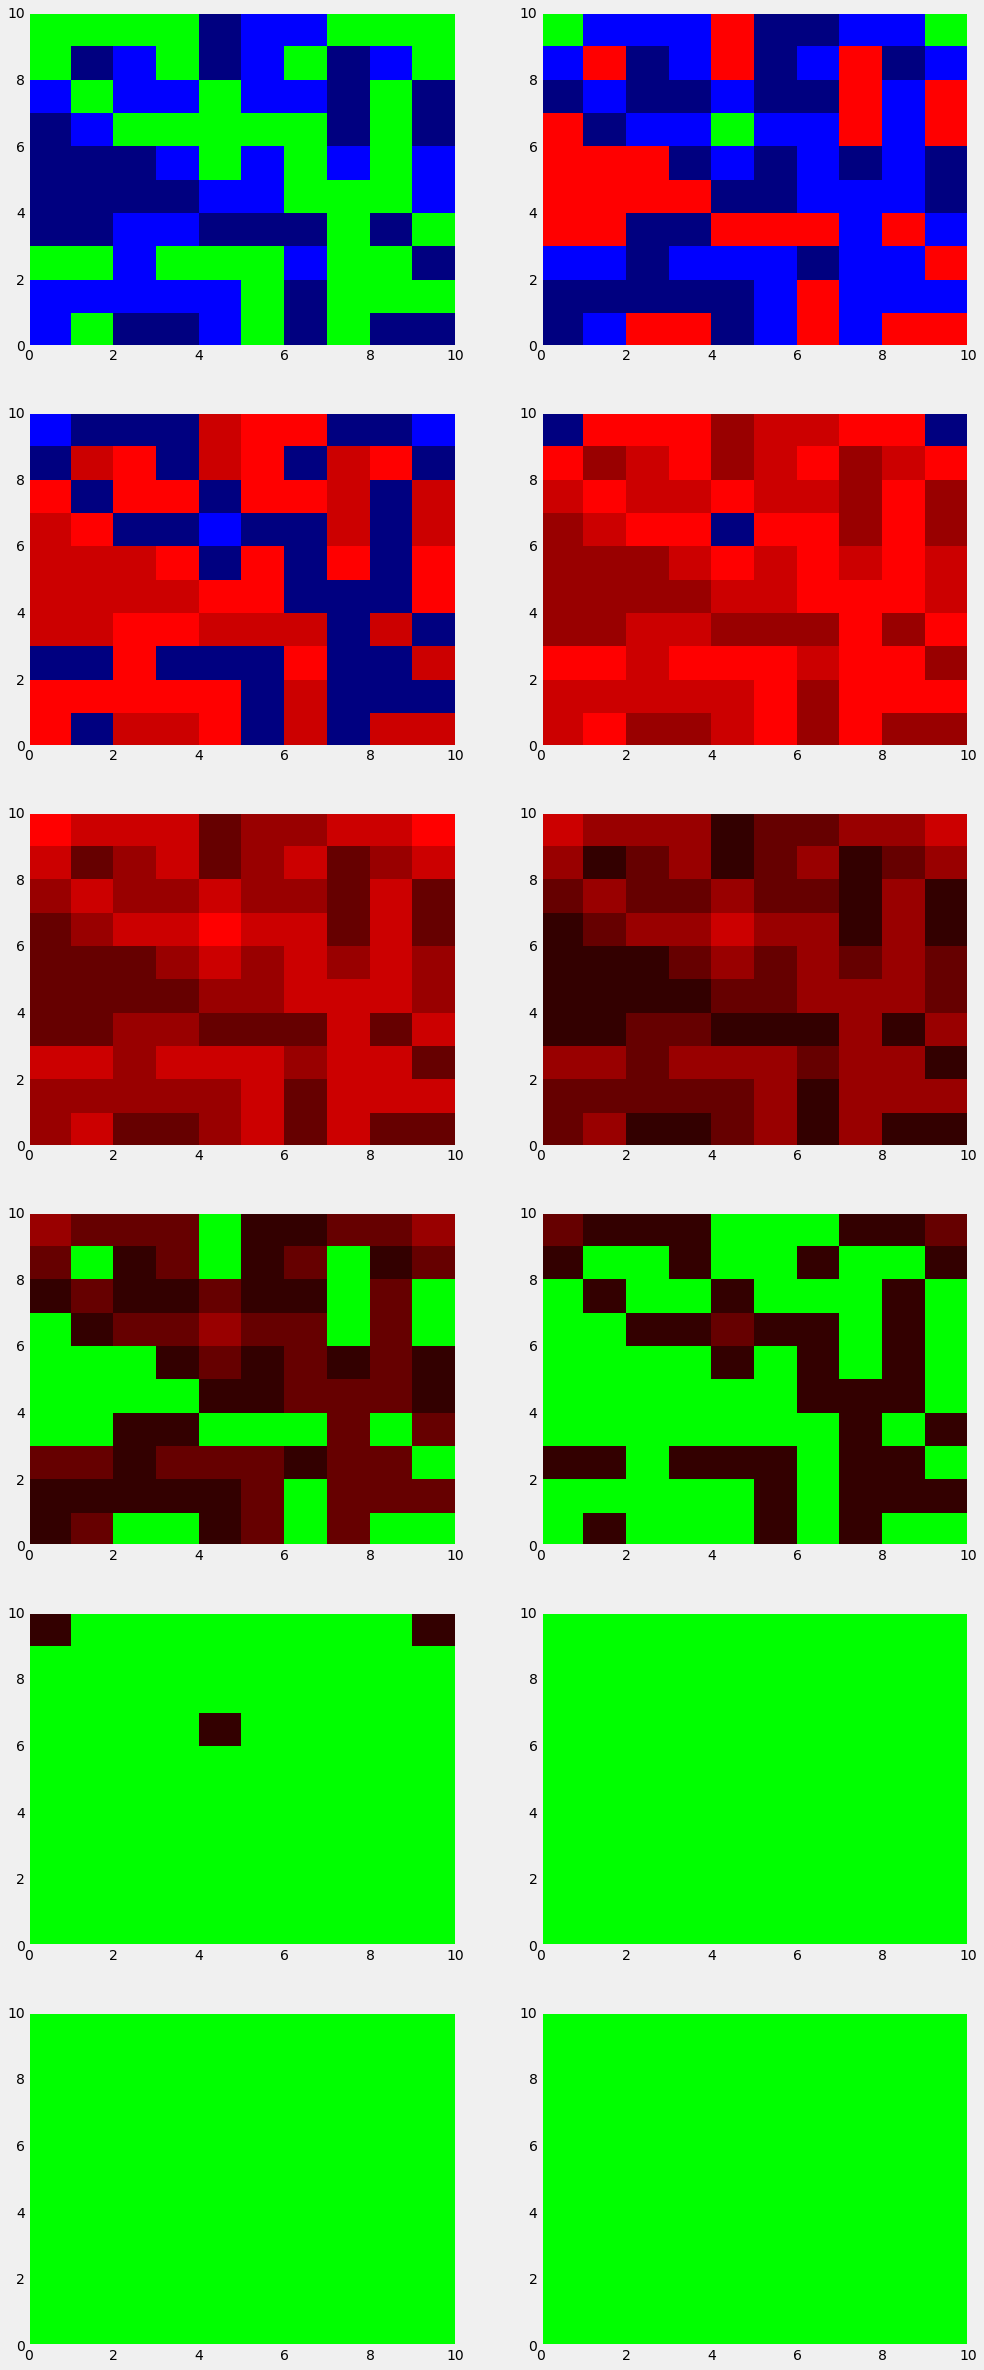

In [188]:
animDiseaseSpread(grids2)

In [170]:
print(noOfInfectsAtAnyTime)
print(noOfSusceptsAtAnyTime)

noOfInfectsAtAnyTime2=noOfInfectsAtAnyTime.copy()
noOfSusceptsAtAnyTime2=noOfSusceptsAtAnyTime.copy()

[58, 68, 42, 3, 0, 0, 0, 0, 0, 0, 0, 0]
[42, 3, 0, 0, 0, 0, 29, 58, 97, 100, 100, 100]


## For Prob_of_susceptibles=0.2

In [ ]:
probSusceptible=0.2
grids3=DiseaseSpreadSim(10,10,probSusceptible,'reflecting',rows*cols-1)

In [189]:
grids3

[array([[1, 2, 1, 1, 2, 0, 0, 2, 2, 0],
        [2, 2, 1, 1, 1, 1, 1, 1, 2, 1],
        [1, 2, 1, 2, 1, 1, 2, 2, 1, 2],
        [1, 1, 0, 2, 2, 0, 0, 2, 1, 1],
        [1, 0, 2, 2, 1, 1, 0, 2, 2, 1],
        [0, 2, 1, 0, 2, 2, 0, 1, 1, 0],
        [2, 2, 2, 1, 2, 2, 2, 2, 1, 2],
        [1, 2, 1, 1, 2, 0, 1, 2, 1, 0],
        [0, 1, 1, 2, 0, 2, 0, 0, 0, 2],
        [1, 1, 2, 1, 2, 1, 0, 2, 2, 1]]),
 array([[2, 3, 2, 2, 3, 1, 1, 3, 3, 1],
        [3, 3, 2, 2, 2, 2, 2, 2, 3, 2],
        [2, 3, 2, 3, 2, 2, 3, 3, 2, 3],
        [2, 2, 1, 3, 3, 1, 1, 3, 2, 2],
        [2, 1, 3, 3, 2, 2, 1, 3, 3, 2],
        [1, 3, 2, 1, 3, 3, 1, 2, 2, 1],
        [3, 3, 3, 2, 3, 3, 3, 3, 2, 3],
        [2, 3, 2, 2, 3, 1, 2, 3, 2, 1],
        [1, 2, 2, 3, 1, 3, 1, 1, 1, 3],
        [2, 2, 3, 2, 3, 2, 1, 3, 3, 2]]),
 array([[3, 4, 3, 3, 4, 2, 2, 4, 4, 2],
        [4, 4, 3, 3, 3, 3, 3, 3, 4, 3],
        [3, 4, 3, 4, 3, 3, 4, 4, 3, 4],
        [3, 3, 2, 4, 4, 2, 2, 4, 3, 3],
        [3, 2, 4, 4, 3, 3, 2, 4, 4, 

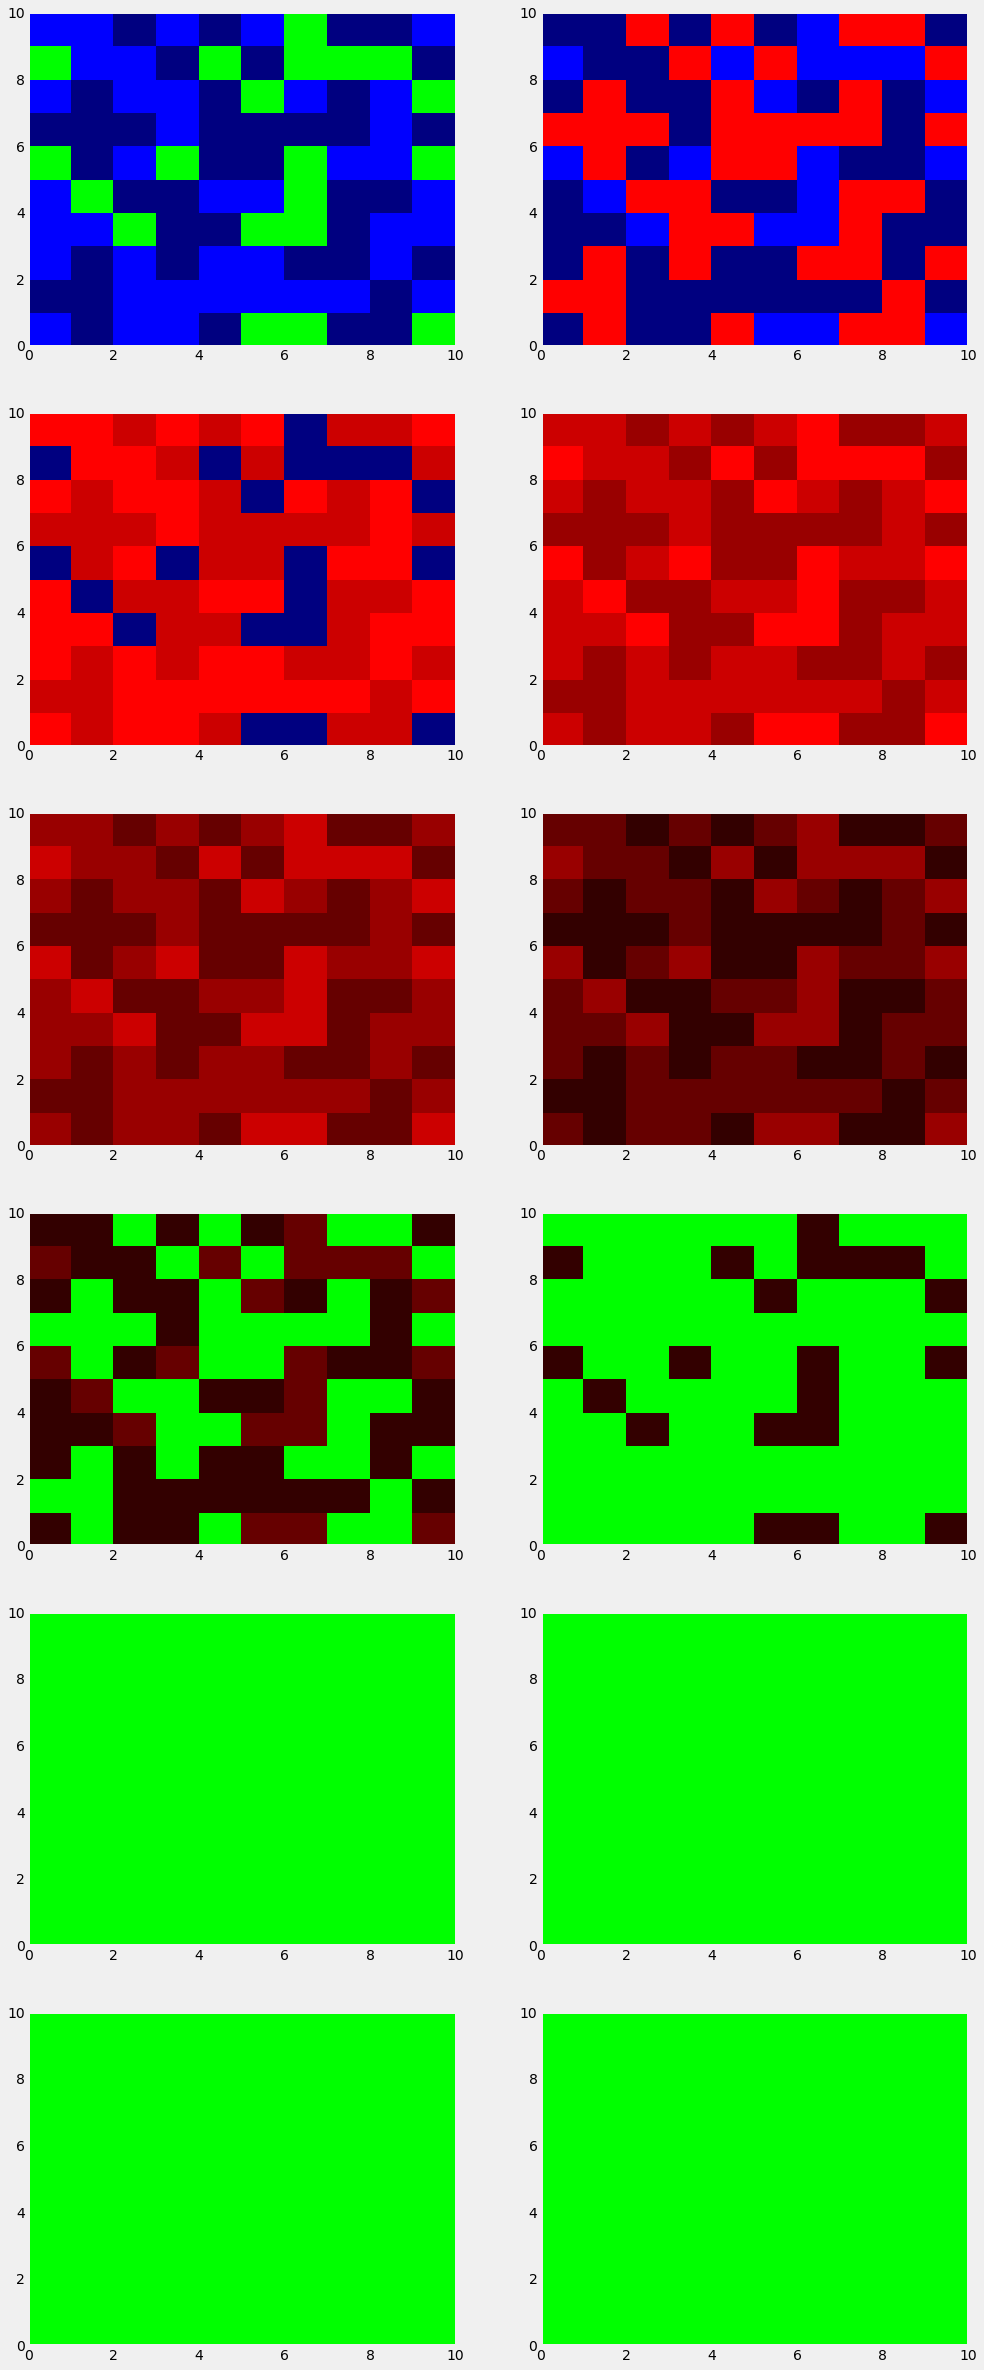

In [190]:
animDiseaseSpread(grids3)

In [176]:
print(noOfInfectsAtAnyTime)
print(noOfSusceptsAtAnyTime)
noOfInfectsAtAnyTime3=noOfInfectsAtAnyTime.copy()
noOfSusceptsAtAnyTime3=noOfSusceptsAtAnyTime.copy()

[58, 68, 42, 3, 0, 0, 0, 0, 0, 0, 0, 0]
[42, 3, 0, 0, 0, 0, 29, 58, 97, 100, 100, 100]


## For Prob_of_susceptibles=0.8 

In [194]:
probSusceptible=0.8
grids4=DiseaseSpreadSim(10,10,probSusceptible,'reflecting',rows*cols-1)

12


In [195]:
grids4

[array([[1, 0, 0, 2, 0, 0, 0, 2, 2, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 2, 0],
        [0, 2, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 2, 0, 0, 0, 1, 0, 0],
        [0, 0, 2, 0, 0, 2, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
        [2, 0, 2, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 2, 0, 0, 0, 0, 0, 0]]),
 array([[2, 1, 1, 3, 1, 0, 1, 3, 3, 1],
        [1, 1, 0, 1, 2, 1, 0, 1, 3, 1],
        [1, 3, 1, 0, 1, 0, 0, 0, 1, 0],
        [1, 1, 0, 1, 0, 0, 0, 1, 0, 0],
        [2, 1, 1, 3, 1, 1, 1, 2, 1, 0],
        [1, 1, 3, 1, 1, 3, 1, 1, 0, 0],
        [0, 1, 1, 0, 0, 1, 3, 1, 0, 1],
        [1, 2, 1, 0, 0, 0, 1, 0, 1, 2],
        [3, 1, 3, 1, 0, 0, 0, 0, 0, 1],
        [1, 1, 2, 3, 1, 0, 0, 0, 0, 0]]),
 array([[3, 2, 2, 4, 2, 1, 2, 4, 4, 2],
        [2, 2, 1, 2, 3, 2, 1, 2, 4, 2],
        [2, 4, 2, 1, 2, 1, 0, 1, 2, 1],
        [2, 2, 1, 2, 1, 1, 1, 2, 1, 0],
        [3, 2, 2, 4, 2, 2, 2, 3, 2, 

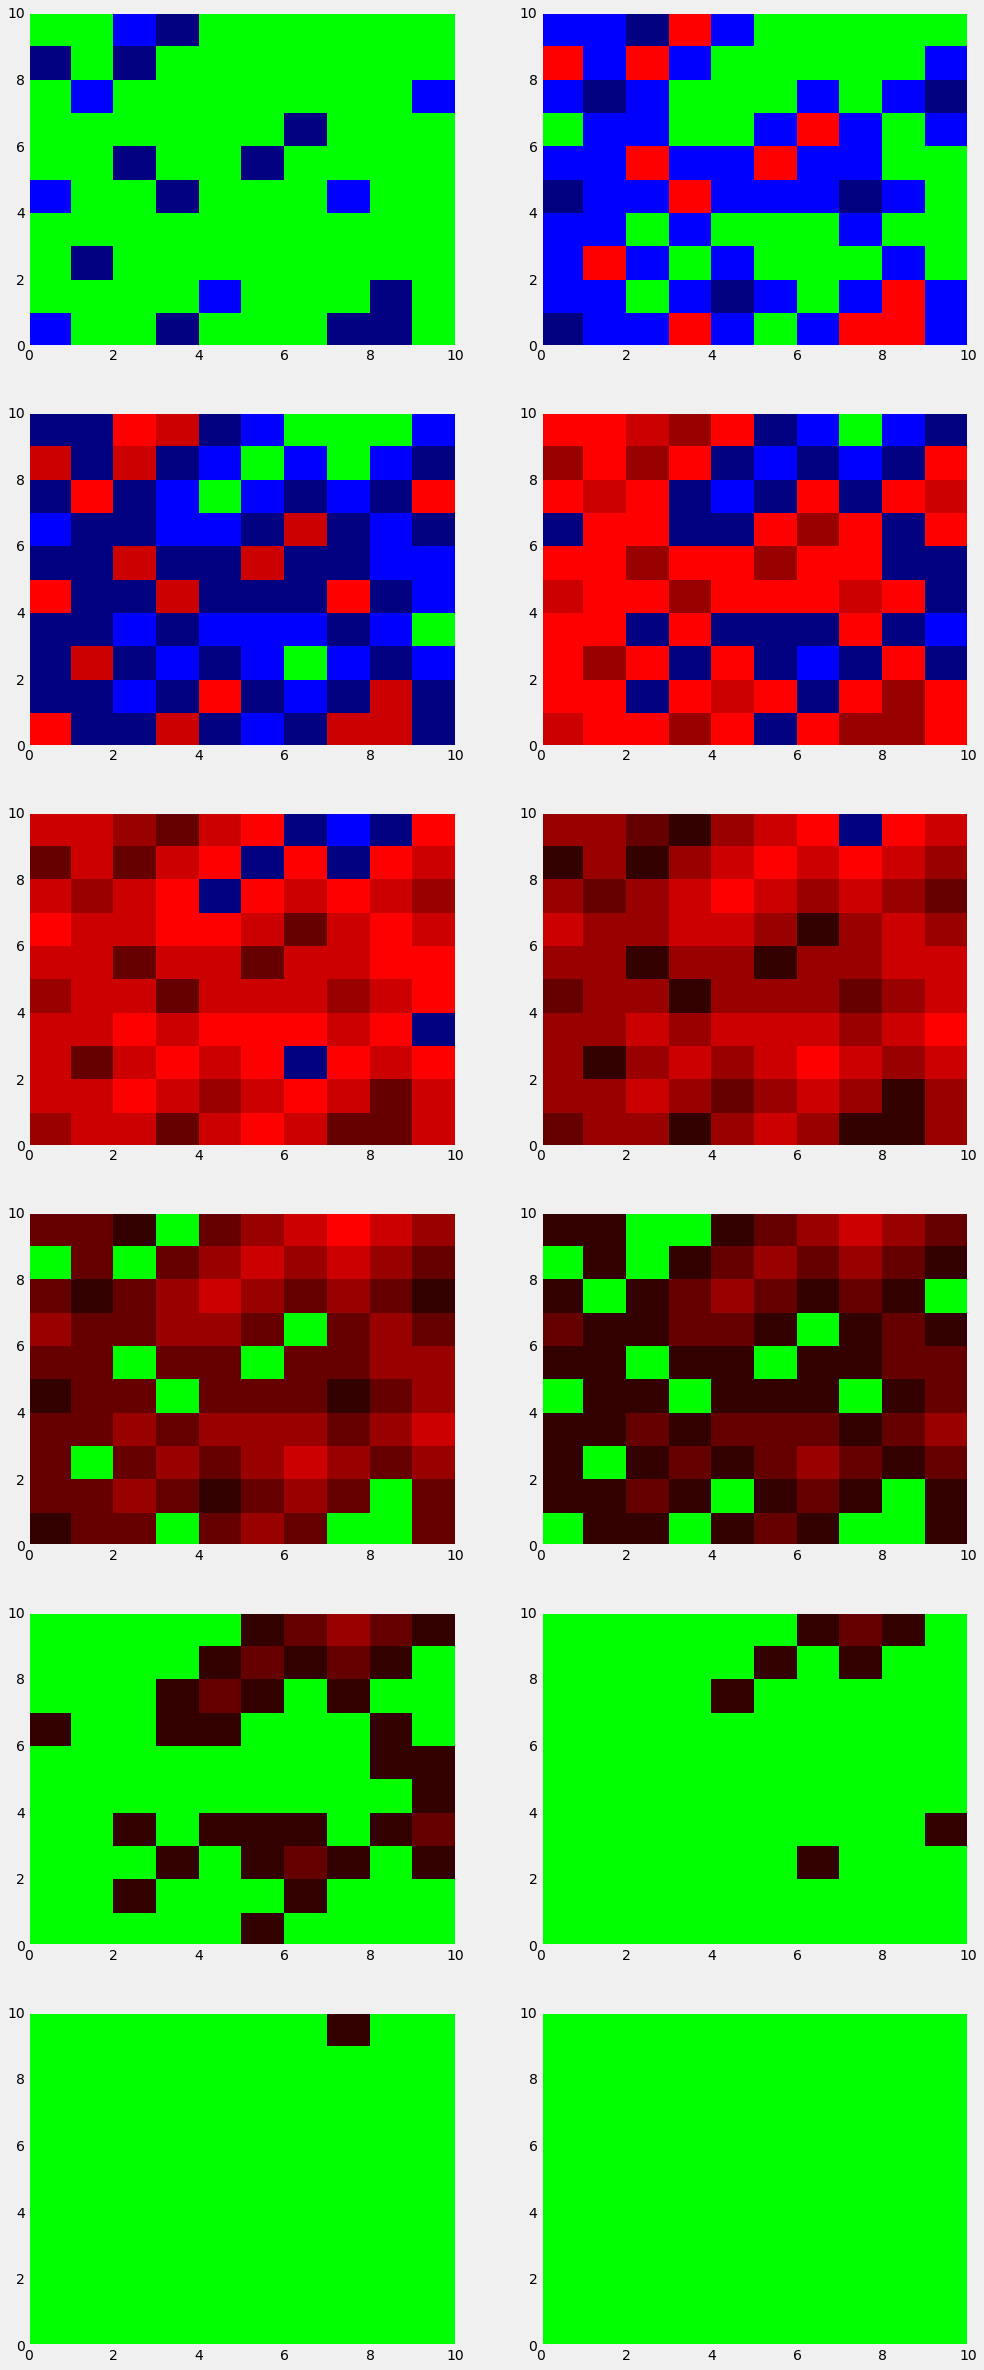

In [197]:
animDiseaseSpread(grids4)

In [196]:
print(noOfInfectsAtAnyTime)
print(noOfSusceptsAtAnyTime)
noOfInfectsAtAnyTime4=noOfInfectsAtAnyTime.copy()
noOfSusceptsAtAnyTime4=noOfSusceptsAtAnyTime.copy()


[19, 53, 73, 34, 8, 1, 0, 0, 0, 0, 0, 0]
[81, 35, 8, 1, 0, 0, 12, 19, 65, 92, 99, 100]


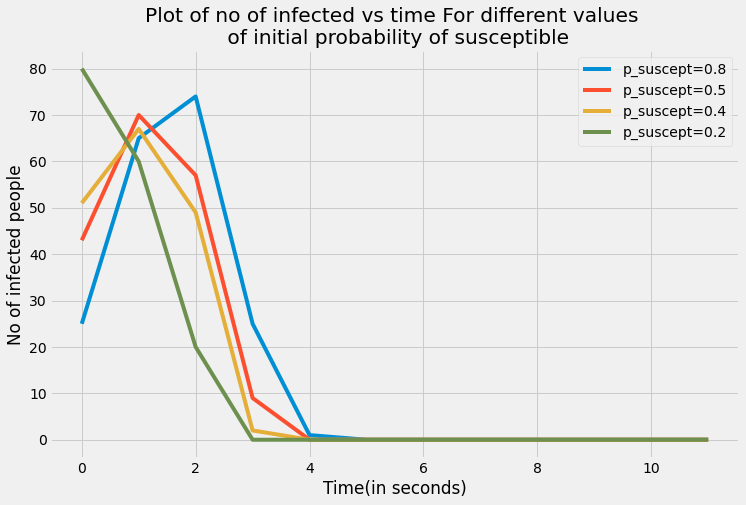

In [109]:
time_steps=np.arange(rows*cols)
str="Plot of no of infected vs time For different values \n of initial probability of susceptible"
plt.figure(figsize=(11,7))
plt.title(str)
plt.xlabel('Time(in seconds)')
plt.ylabel('No of infected people')
plt.plot(time_steps,noOfInfectsAtAnyTime4,label='p_suscept=0.8')
plt.plot(time_steps,noOfInfectsAtAnyTime1,label='p_suscept=0.5')
plt.plot(time_steps,noOfInfectsAtAnyTime2,label='p_suscept=0.4')
plt.plot(time_steps,noOfInfectsAtAnyTime3,label='p_suscept=0.2')
plt.legend()

## Q2 

In [198]:
probSusceptible=0.5
probCatch=0.5
probBeSusceptible=0.5

## Prob of Catch=0.5 

In [199]:
grids5=DiseaseSpreadSim(10,10,probSusceptible,'reflecting',rows*cols-1,2)

12


In [200]:
grids5

[array([[2, 0, 1, 2, 1, 2, 0, 1, 0, 2],
        [1, 0, 2, 2, 1, 0, 1, 0, 2, 1],
        [0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
        [1, 2, 0, 0, 2, 0, 1, 2, 2, 0],
        [0, 0, 1, 0, 1, 0, 0, 2, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 1, 0, 1],
        [1, 2, 1, 0, 2, 2, 0, 1, 0, 1],
        [1, 1, 2, 2, 0, 1, 2, 0, 0, 0],
        [0, 1, 0, 1, 2, 0, 0, 0, 0, 2],
        [1, 1, 1, 0, 1, 1, 2, 1, 2, 0]]),
 array([[3, 1, 2, 3, 2, 3, 0, 2, 0, 3],
        [2, 1, 3, 3, 2, 0, 2, 1, 3, 2],
        [1, 0, 2, 0, 2, 0, 1, 0, 1, 1],
        [2, 3, 0, 1, 3, 0, 2, 3, 3, 1],
        [0, 0, 2, 0, 2, 0, 0, 3, 1, 0],
        [0, 1, 0, 0, 2, 2, 1, 2, 0, 2],
        [2, 3, 2, 1, 3, 3, 1, 2, 0, 2],
        [2, 2, 3, 3, 1, 2, 3, 0, 0, 0],
        [1, 2, 0, 2, 3, 0, 1, 1, 1, 3],
        [2, 2, 2, 0, 2, 2, 3, 2, 3, 1]]),
 array([[4, 2, 3, 4, 3, 4, 0, 3, 0, 4],
        [3, 2, 4, 4, 3, 0, 3, 2, 4, 3],
        [2, 0, 3, 1, 3, 1, 2, 1, 2, 2],
        [3, 4, 0, 2, 4, 1, 3, 4, 4, 2],
        [0, 1, 3, 1, 3, 0, 1, 4, 2, 

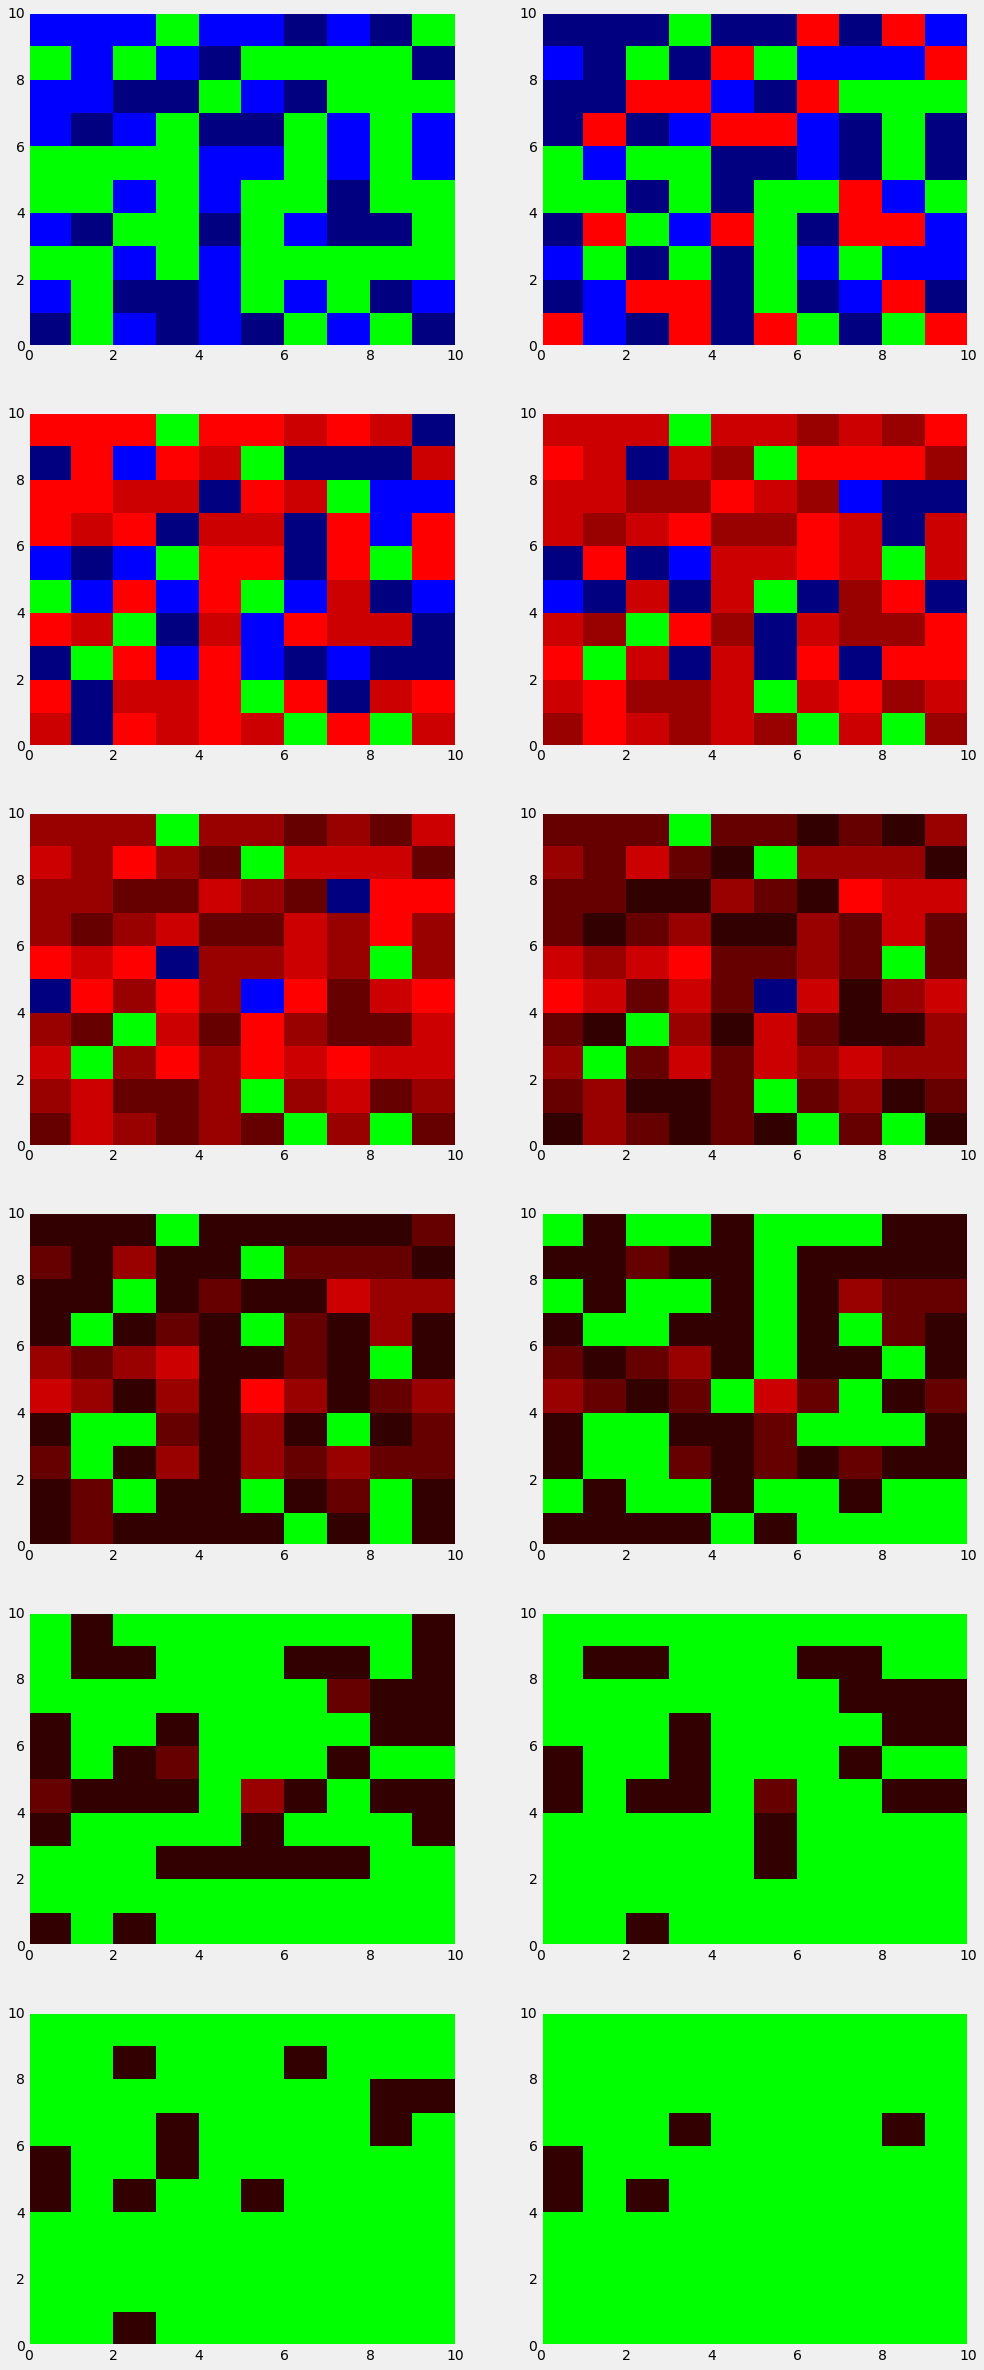

In [201]:
animDiseaseSpread(grids5)

In [202]:
print(noOfInfectsAtAnyTime)
print(noOfSusceptsAtAnyTime)
noOfInfectsAtAnyTime5=noOfInfectsAtAnyTime.copy()
noOfSusceptsAtAnyTime5=noOfSusceptsAtAnyTime.copy()

[54, 52, 34, 17, 4, 1, 0, 0, 0, 0, 0, 0]
[46, 26, 12, 9, 8, 8, 15, 38, 64, 78, 88, 95]


## Same prob of catch but prob of be suscept=1 

In [208]:
probBeSusceptible=1

In [210]:
grids7=DiseaseSpreadSim(10,10,probSusceptible,'reflecting',rows*cols-1,2)
grids7

12


[array([[0, 0, 1, 2, 0, 0, 0, 2, 0, 0],
        [1, 0, 1, 1, 0, 0, 0, 0, 1, 0],
        [0, 2, 0, 2, 1, 2, 0, 0, 0, 2],
        [2, 0, 0, 0, 2, 0, 0, 1, 2, 0],
        [2, 0, 1, 2, 0, 0, 2, 0, 1, 0],
        [2, 2, 2, 0, 1, 0, 0, 0, 1, 1],
        [0, 0, 0, 0, 0, 2, 1, 1, 0, 0],
        [0, 2, 0, 0, 0, 0, 0, 2, 1, 0],
        [2, 2, 2, 0, 1, 0, 0, 1, 0, 0],
        [0, 1, 0, 2, 2, 0, 2, 2, 0, 0]]),
 array([[1, 1, 2, 3, 1, 0, 0, 3, 1, 0],
        [2, 0, 2, 2, 1, 1, 0, 1, 2, 1],
        [0, 3, 1, 3, 2, 3, 1, 0, 1, 3],
        [3, 1, 1, 0, 3, 1, 1, 2, 3, 0],
        [3, 1, 2, 3, 1, 1, 3, 1, 2, 1],
        [3, 3, 3, 1, 2, 1, 1, 1, 2, 2],
        [1, 0, 0, 0, 1, 3, 2, 2, 0, 1],
        [0, 3, 1, 0, 1, 0, 1, 3, 2, 0],
        [3, 3, 3, 1, 2, 1, 0, 2, 0, 0],
        [0, 2, 1, 3, 3, 1, 3, 3, 0, 0]]),
 array([[2, 2, 3, 4, 2, 1, 0, 4, 2, 1],
        [3, 1, 3, 3, 2, 2, 1, 2, 3, 2],
        [0, 4, 2, 4, 3, 4, 2, 1, 2, 4],
        [4, 2, 2, 1, 4, 2, 2, 3, 4, 0],
        [4, 2, 3, 4, 2, 2, 4, 2, 3, 

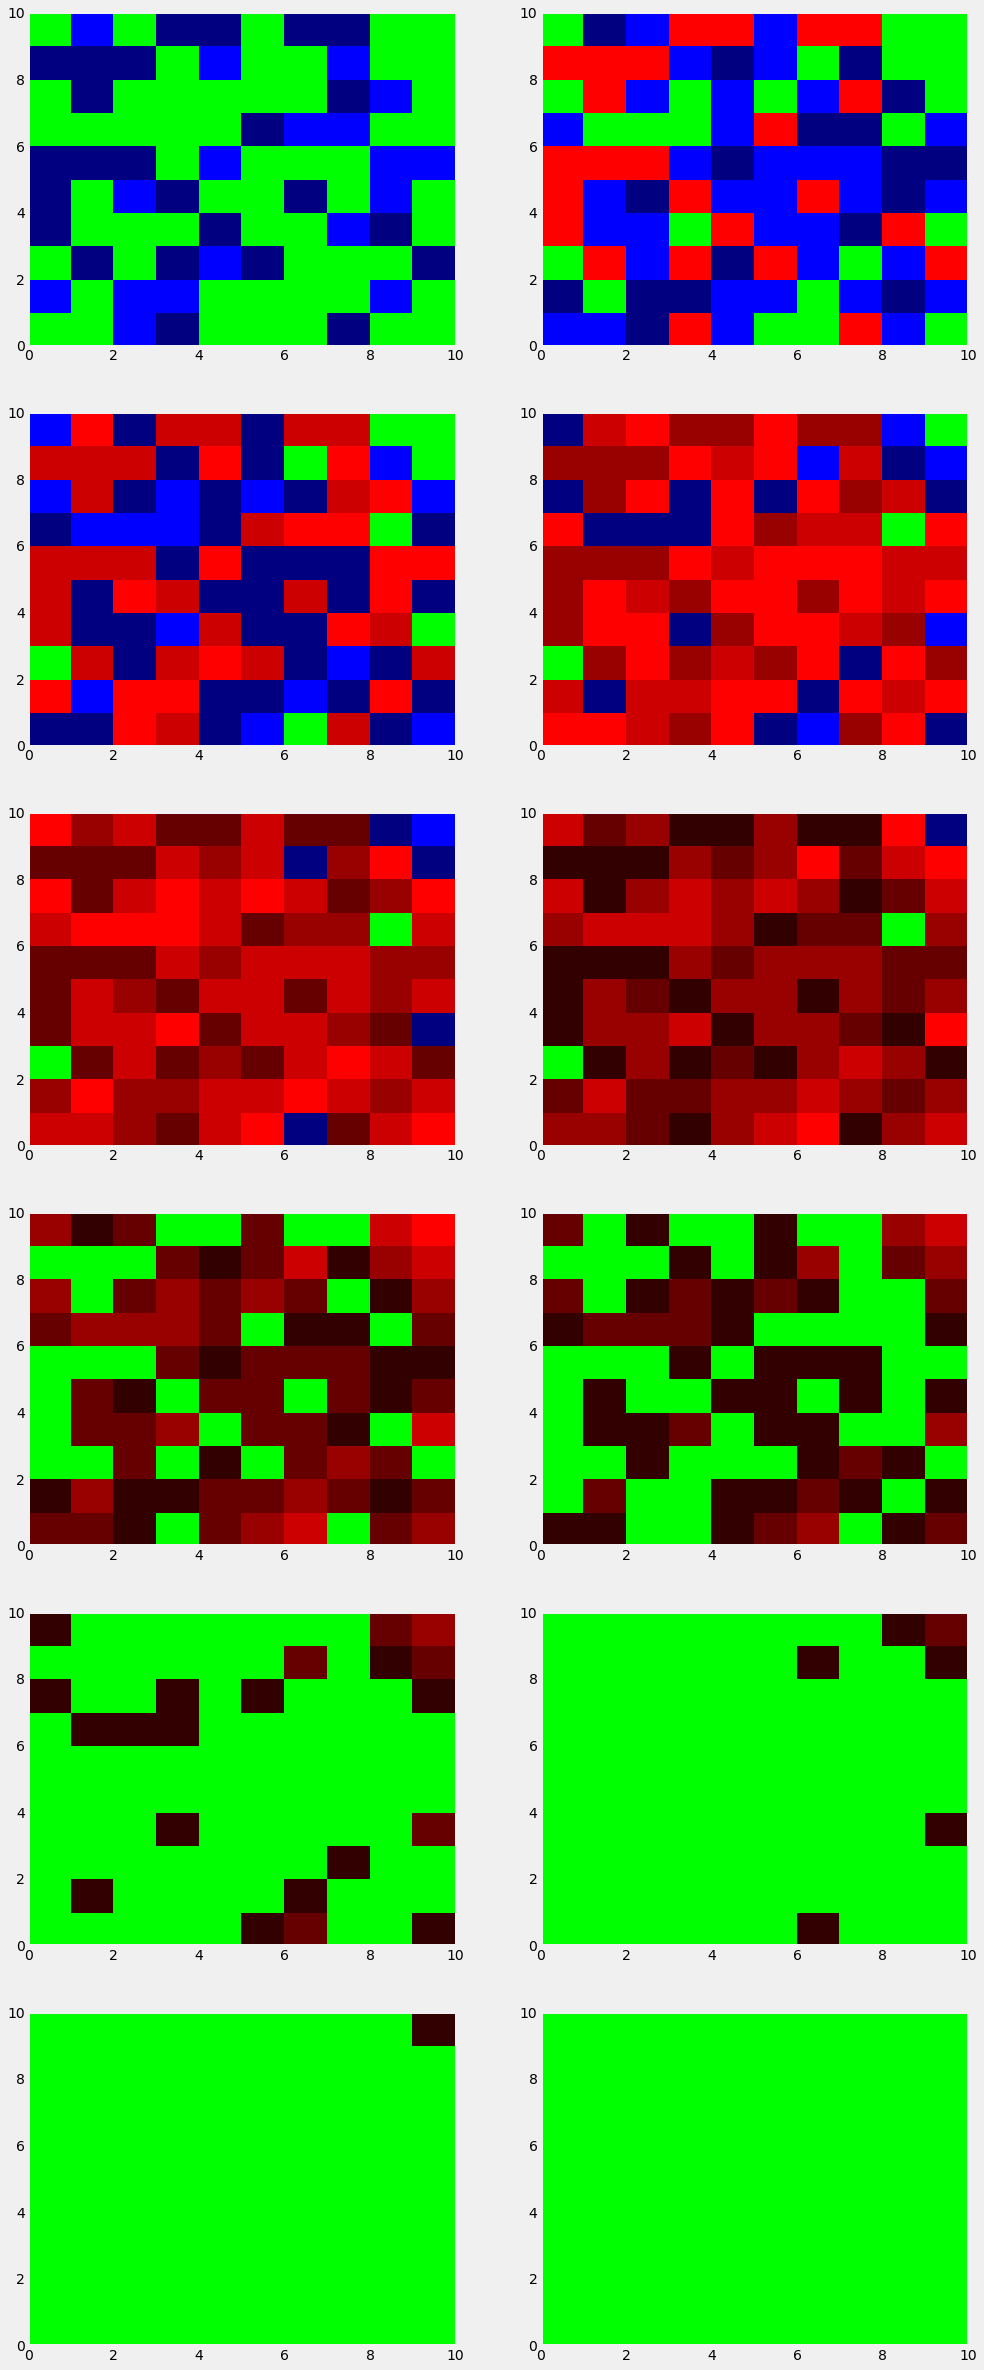

In [211]:
animDiseaseSpread(grids7)

In [212]:
print(noOfInfectsAtAnyTime)
print(noOfSusceptsAtAnyTime)
noOfInfectsAtAnyTime7=noOfInfectsAtAnyTime.copy()
noOfSusceptsAtAnyTime7=noOfSusceptsAtAnyTime.copy()

[43, 52, 49, 20, 6, 1, 0, 0, 0, 0, 0, 0]
[57, 23, 8, 3, 2, 2, 27, 45, 79, 94, 99, 100]


## ProbOfCatch=0.7 

In [203]:
probCatch=0.7
probBeSusceptible=0.5

In [204]:
grids6=DiseaseSpreadSim(10,10,probSusceptible,'reflecting',rows*cols-1,2)

12


In [205]:
grids6

[array([[0, 0, 2, 0, 1, 1, 0, 0, 2, 1],
        [1, 0, 0, 0, 0, 0, 0, 0, 1, 1],
        [0, 0, 1, 1, 1, 0, 0, 2, 1, 1],
        [2, 2, 0, 0, 0, 2, 0, 0, 0, 0],
        [0, 1, 0, 0, 1, 0, 1, 1, 0, 0],
        [1, 0, 1, 0, 2, 0, 0, 0, 0, 2],
        [0, 0, 1, 0, 0, 1, 0, 2, 2, 2],
        [1, 2, 0, 0, 1, 2, 0, 1, 1, 0],
        [0, 2, 0, 0, 0, 0, 0, 2, 0, 0],
        [0, 0, 0, 0, 2, 0, 1, 2, 1, 1]]),
 array([[1, 1, 3, 1, 2, 2, 1, 0, 3, 2],
        [2, 0, 1, 1, 1, 0, 0, 1, 2, 2],
        [1, 0, 2, 2, 2, 1, 0, 3, 2, 2],
        [3, 3, 1, 1, 1, 3, 0, 1, 0, 1],
        [0, 2, 1, 1, 2, 1, 2, 2, 1, 1],
        [2, 1, 2, 1, 3, 1, 1, 1, 1, 3],
        [1, 1, 2, 1, 1, 2, 1, 3, 3, 3],
        [2, 3, 0, 1, 2, 3, 0, 2, 2, 1],
        [1, 3, 1, 0, 1, 1, 0, 3, 0, 1],
        [0, 1, 0, 1, 3, 1, 2, 3, 2, 2]]),
 array([[2, 2, 4, 2, 3, 3, 2, 1, 4, 3],
        [3, 1, 2, 2, 2, 1, 1, 2, 3, 3],
        [2, 1, 3, 3, 3, 2, 1, 4, 3, 3],
        [4, 4, 2, 2, 2, 4, 0, 2, 1, 2],
        [1, 3, 2, 2, 3, 2, 3, 3, 2, 

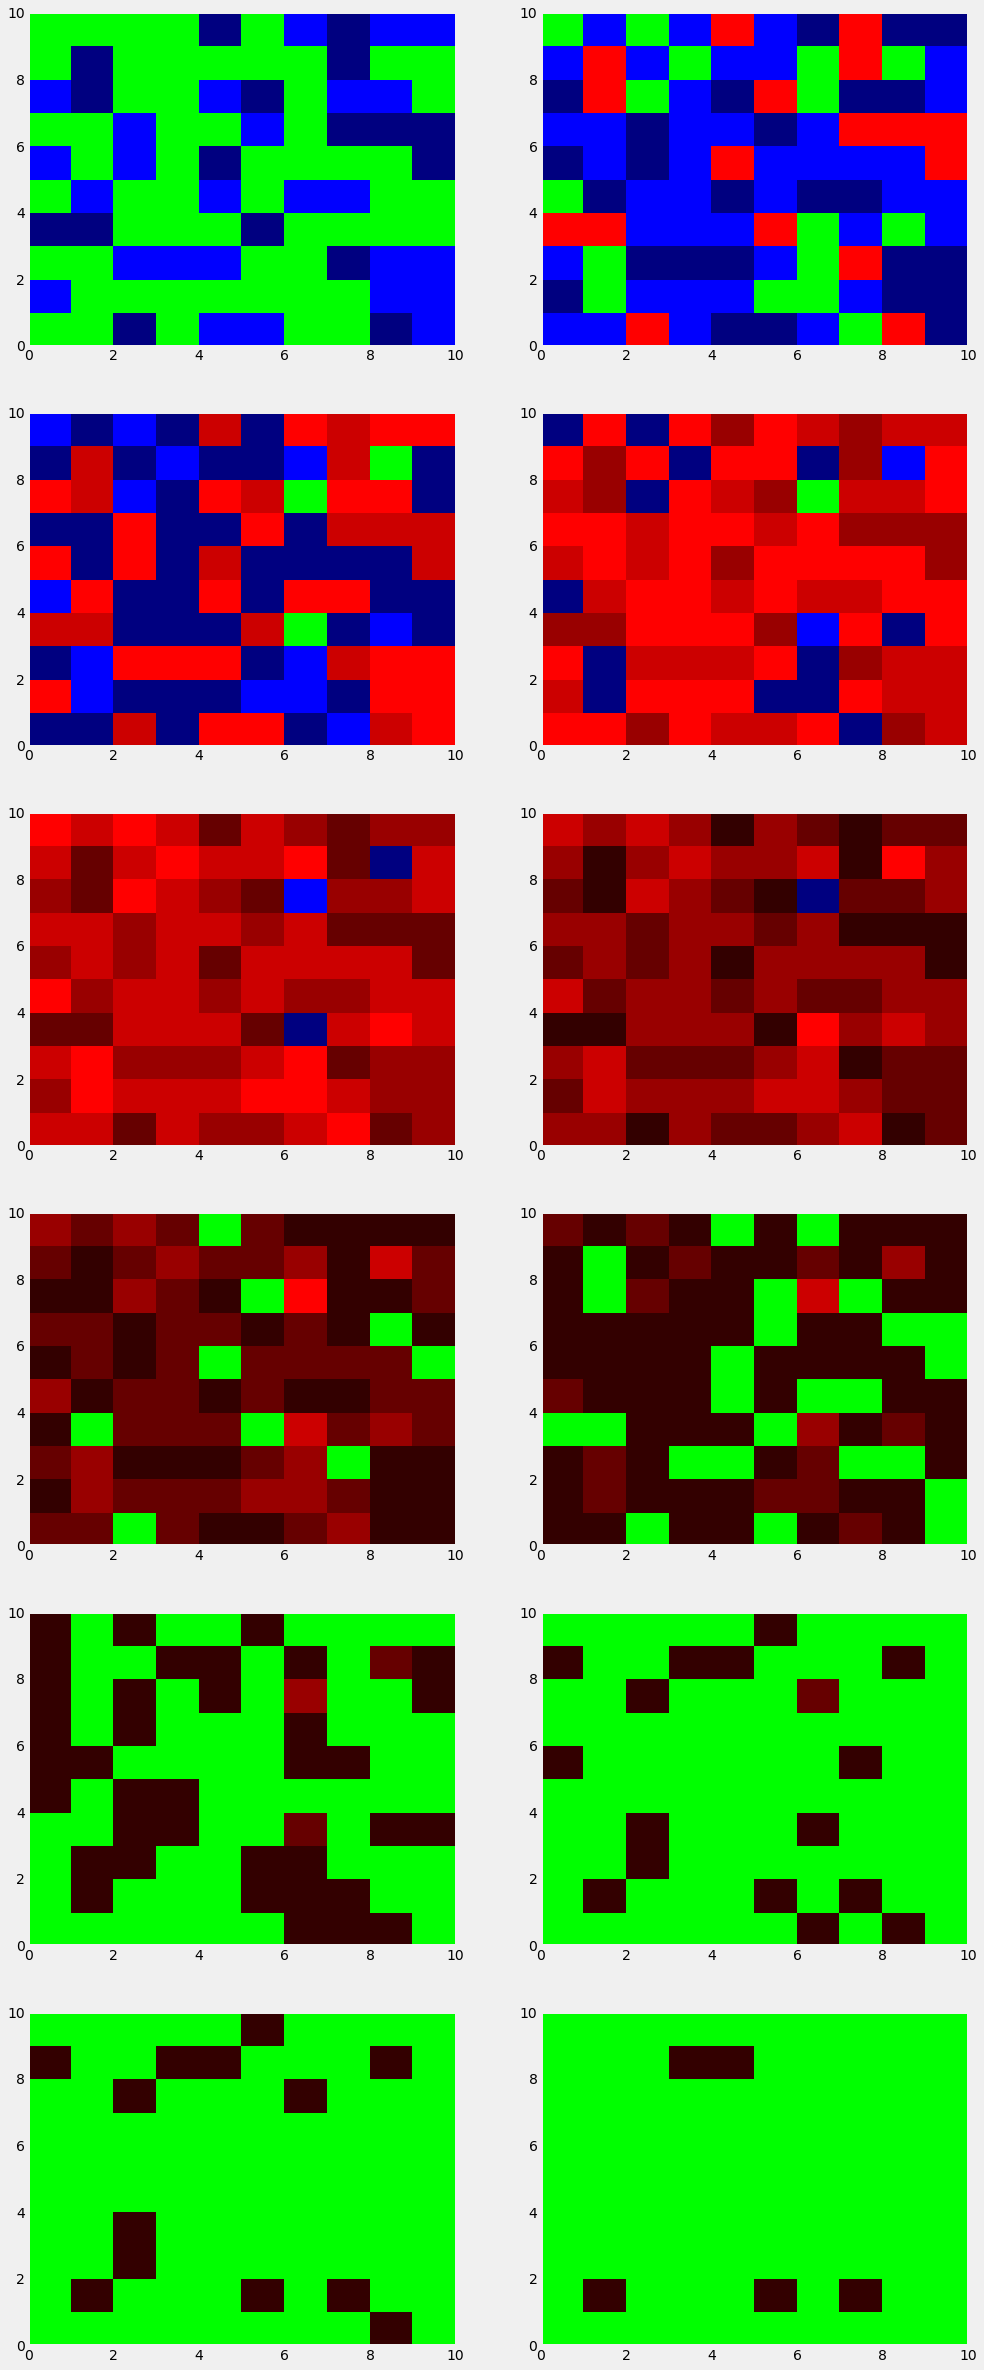

In [206]:
animDiseaseSpread(grids6)

In [207]:
print(noOfInfectsAtAnyTime)
print(noOfSusceptsAtAnyTime)
noOfInfectsAtAnyTime6=noOfInfectsAtAnyTime.copy()
noOfSusceptsAtAnyTime6=noOfSusceptsAtAnyTime.copy()

[43, 67, 54, 15, 3, 1, 0, 0, 0, 0, 0, 0]
[57, 16, 3, 1, 0, 0, 9, 25, 60, 83, 87, 95]


## With same no of suscepts as above but with less prob of catch 

In [227]:
probCatch=0.6
probBeSusceptible=0.5
probSusceptible

0.8

In [225]:
grids10=DiseaseSpreadSim(10,10,probSusceptible,'reflecting',rows*cols-1,2)
grids10

12


[array([[2, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 2],
        [0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
        [0, 0, 0, 0, 0, 2, 2, 0, 2, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 2, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 2, 2, 2, 0, 0, 2],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
        [0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 2, 0, 0, 0, 0, 0, 2, 0]]),
 array([[3, 1, 0, 0, 1, 0, 0, 1, 2, 1],
        [1, 0, 0, 1, 2, 1, 0, 1, 0, 3],
        [0, 0, 0, 0, 1, 0, 0, 3, 1, 0],
        [0, 0, 0, 0, 1, 3, 3, 1, 3, 2],
        [0, 1, 0, 0, 0, 1, 1, 0, 1, 1],
        [1, 3, 2, 1, 1, 0, 0, 0, 0, 1],
        [2, 0, 1, 1, 3, 3, 3, 1, 0, 3],
        [0, 0, 0, 0, 0, 1, 0, 2, 0, 2],
        [0, 0, 3, 1, 0, 0, 0, 0, 1, 1],
        [2, 1, 3, 0, 0, 0, 0, 1, 3, 1]]),
 array([[4, 2, 1, 0, 2, 1, 0, 2, 3, 2],
        [2, 0, 1, 2, 3, 2, 1, 2, 1, 4],
        [1, 0, 0, 1, 2, 1, 0, 4, 2, 1],
        [0, 0, 0, 1, 2, 4, 4, 2, 4, 3],
        [0, 2, 0, 1, 1, 2, 2, 0, 2, 

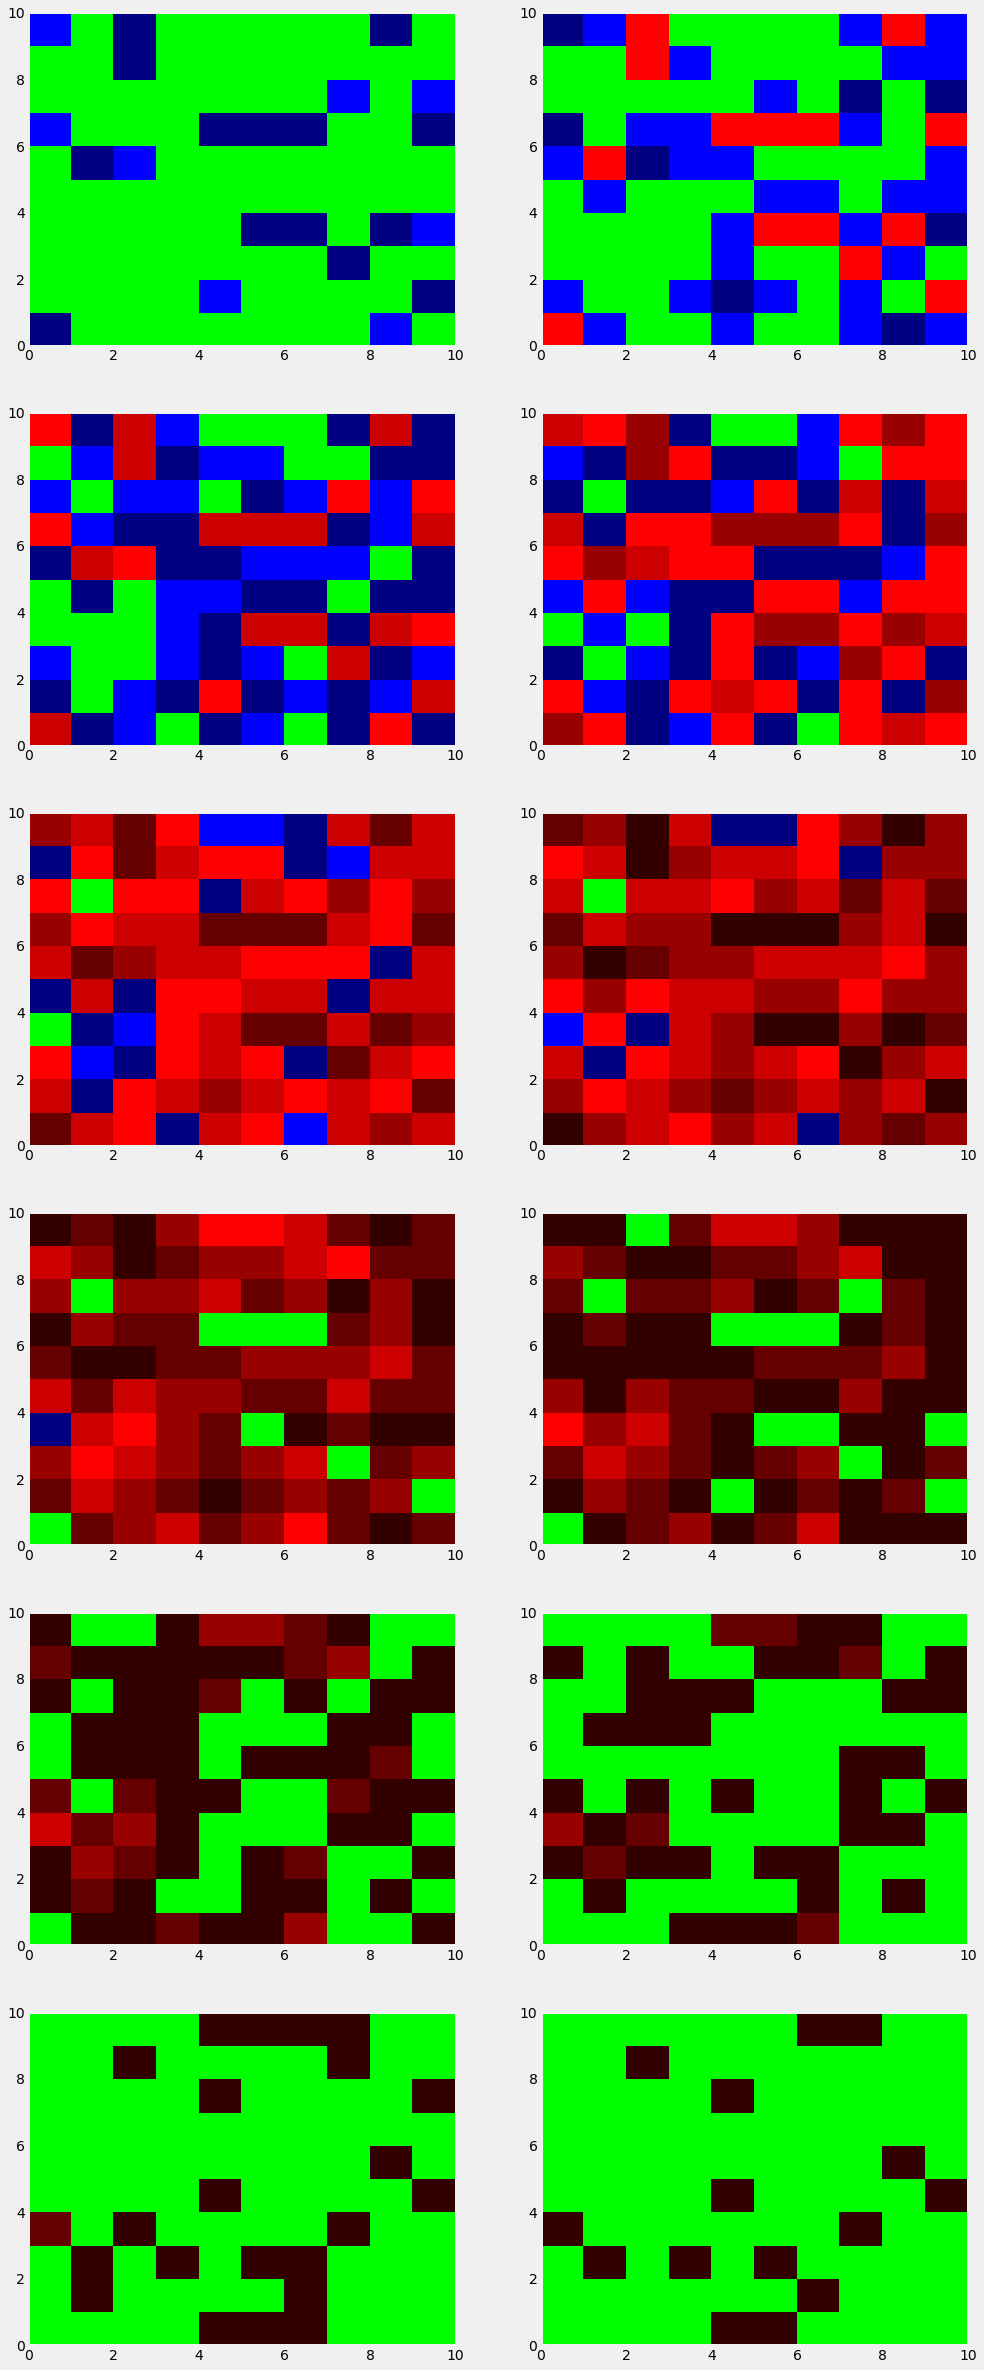

In [226]:
animDiseaseSpread(grids10)

In [228]:
print(noOfInfectsAtAnyTime)
print(noOfSusceptsAtAnyTime)
noOfInfectsAtAnyTime10=noOfInfectsAtAnyTime.copy()
noOfSusceptsAtAnyTime10=noOfSusceptsAtAnyTime.copy()

[22, 39, 57, 39, 19, 7, 1, 0, 0, 0, 0, 0]
[78, 47, 21, 8, 2, 1, 8, 13, 33, 57, 77, 85]


## With same Prob of catch but more no of susceptible 

In [213]:
probSusceptible=0.8
probCatch=0.7
probBeSusceptible=0.5

In [214]:
grids8=DiseaseSpreadSim(10,10,probSusceptible,'reflecting',rows*cols-1,2)
grids8

12


[array([[1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 1, 1, 0, 0, 1, 0, 1],
        [1, 0, 0, 2, 2, 0, 1, 0, 0, 2],
        [0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
        [2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 2, 0, 2, 0, 0, 1, 1, 0, 1],
        [0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
        [2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 2, 1, 0, 0, 0, 0, 2, 0]]),
 array([[2, 1, 2, 1, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 0, 1, 0, 0, 1, 0, 1],
        [1, 2, 0, 2, 2, 0, 1, 2, 1, 2],
        [2, 1, 1, 3, 3, 0, 2, 1, 1, 3],
        [0, 0, 0, 1, 1, 3, 0, 0, 0, 0],
        [3, 1, 0, 1, 0, 0, 1, 0, 0, 1],
        [1, 3, 1, 3, 1, 1, 2, 2, 1, 2],
        [1, 1, 3, 1, 0, 0, 1, 0, 0, 0],
        [3, 1, 0, 1, 0, 0, 0, 0, 1, 0],
        [1, 0, 3, 2, 1, 0, 0, 1, 3, 1]]),
 array([[3, 2, 3, 2, 1, 0, 0, 0, 0, 1],
        [1, 2, 2, 1, 2, 0, 0, 2, 0, 2],
        [2, 3, 1, 3, 3, 1, 2, 3, 2, 3],
        [3, 2, 2, 4, 4, 1, 3, 2, 2, 4],
        [1, 1, 0, 2, 2, 4, 1, 1, 1, 

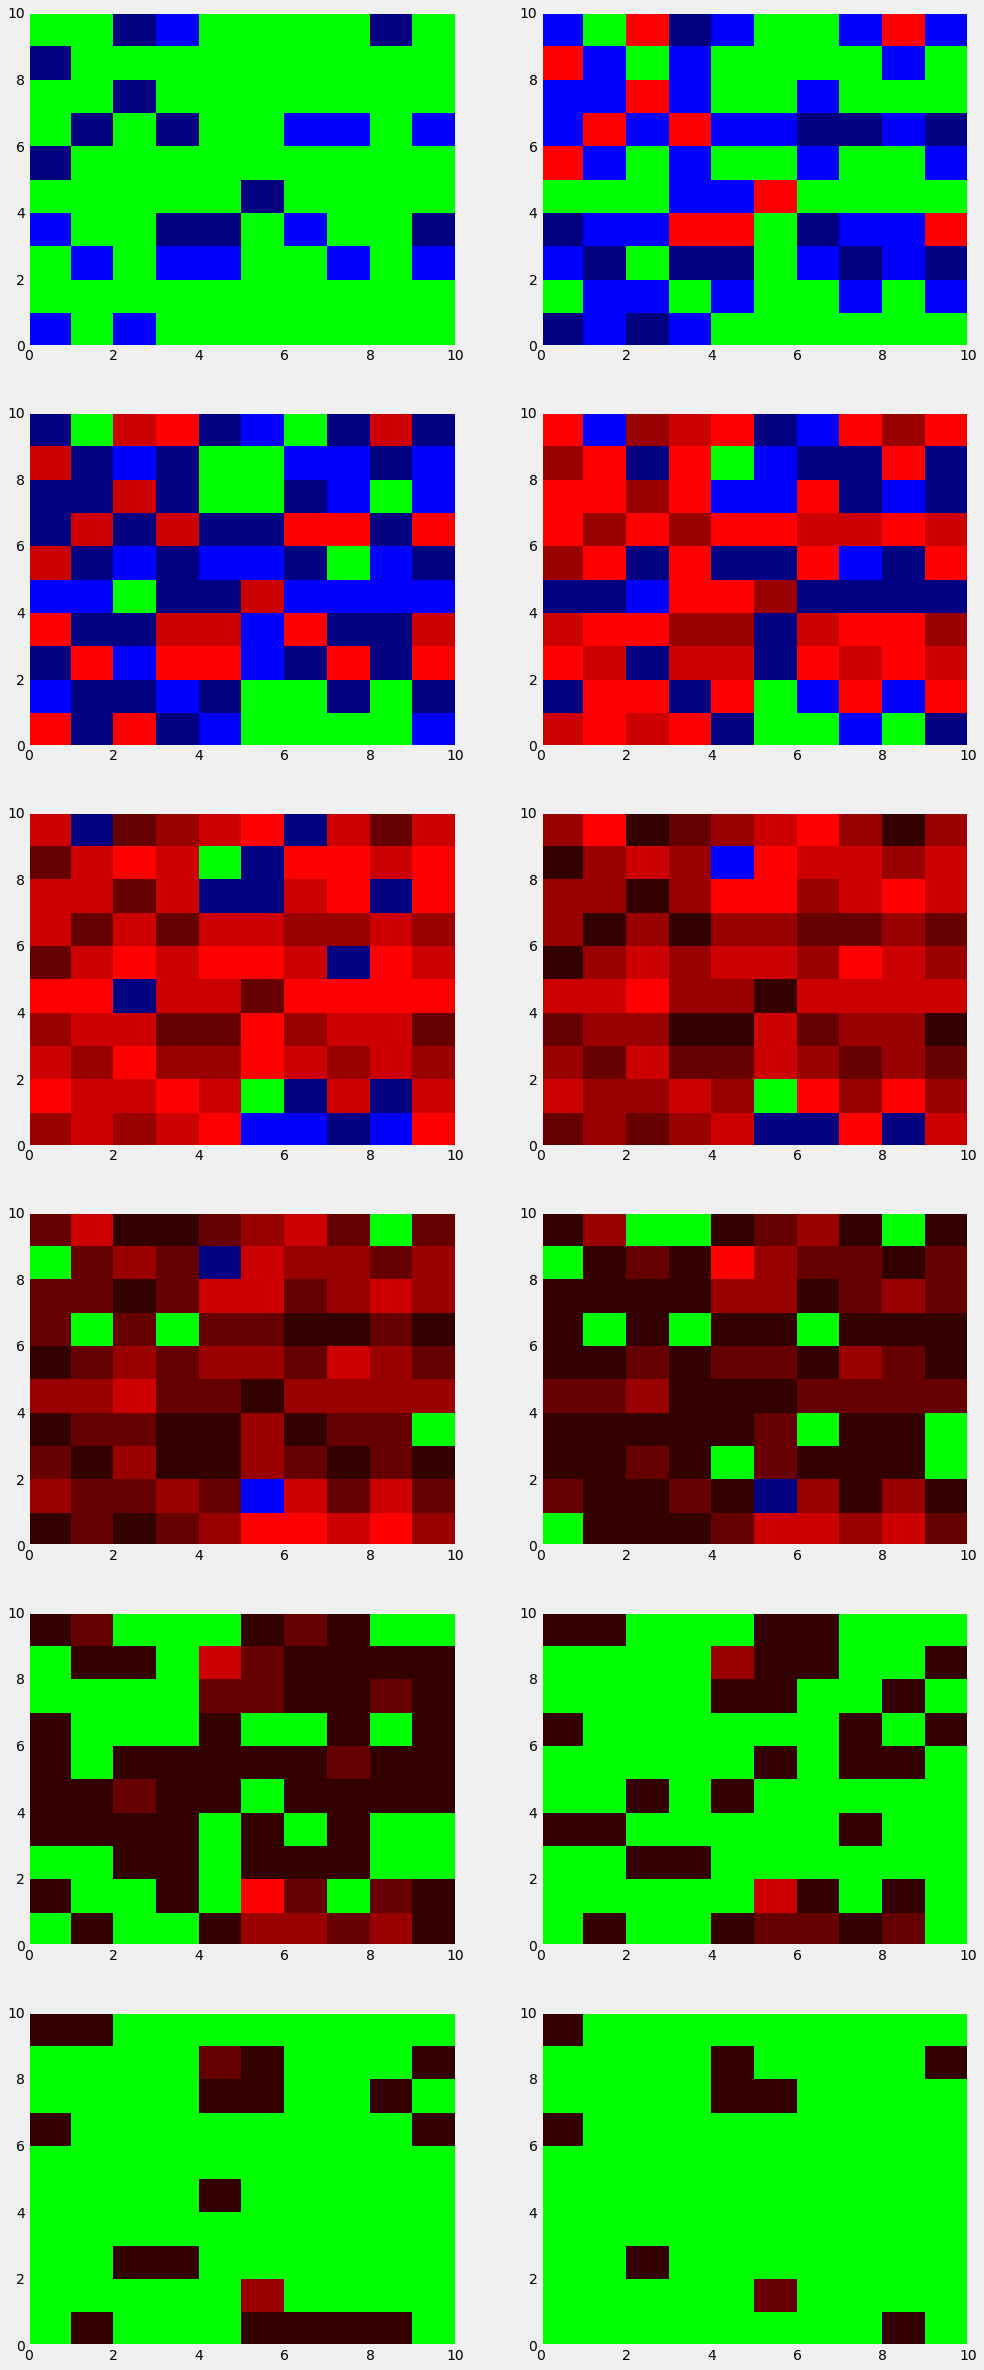

In [215]:
animDiseaseSpread(grids8)

In [216]:
print(noOfInfectsAtAnyTime)
print(noOfSusceptsAtAnyTime)
noOfInfectsAtAnyTime8=noOfInfectsAtAnyTime.copy()
noOfSusceptsAtAnyTime8=noOfSusceptsAtAnyTime.copy()

[24, 49, 60, 35, 14, 4, 2, 1, 0, 0, 0, 0]
[76, 40, 16, 5, 2, 1, 5, 12, 35, 67, 81, 91]


## With following initial conds of large no of susceptible and half the prob of catch 

In [217]:
probSusceptible=0.8
probCatch=0.5
probBeSusceptible=0.5

In [218]:
grids9=DiseaseSpreadSim(10,10,probSusceptible,'reflecting',rows*cols-1,2)
grids9

12


[array([[2, 0, 0, 1, 0, 0, 0, 0, 0, 2],
        [0, 1, 1, 0, 0, 2, 0, 0, 0, 0],
        [1, 2, 0, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 1, 1, 0, 2],
        [0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
        [1, 0, 0, 2, 0, 1, 0, 0, 0, 1],
        [2, 0, 2, 2, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1, 0, 2, 0, 0, 0],
        [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 1, 2, 0]]),
 array([[3, 1, 0, 2, 1, 0, 0, 0, 0, 3],
        [0, 2, 2, 0, 1, 3, 0, 0, 0, 0],
        [2, 3, 1, 0, 0, 0, 1, 1, 1, 2],
        [2, 1, 0, 0, 0, 1, 2, 2, 1, 3],
        [1, 2, 0, 1, 0, 1, 0, 2, 1, 1],
        [2, 0, 0, 3, 0, 2, 0, 1, 1, 2],
        [3, 1, 3, 3, 0, 0, 0, 0, 2, 0],
        [1, 0, 1, 0, 2, 1, 3, 1, 0, 0],
        [0, 0, 0, 2, 1, 2, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 2, 0, 2, 3, 0]]),
 array([[4, 2, 0, 3, 2, 1, 0, 0, 0, 4],
        [1, 3, 3, 0, 2, 4, 1, 0, 0, 1],
        [3, 4, 2, 1, 0, 0, 2, 2, 2, 3],
        [3, 2, 0, 1, 1, 2, 3, 3, 2, 4],
        [2, 3, 0, 2, 1, 2, 1, 3, 2, 

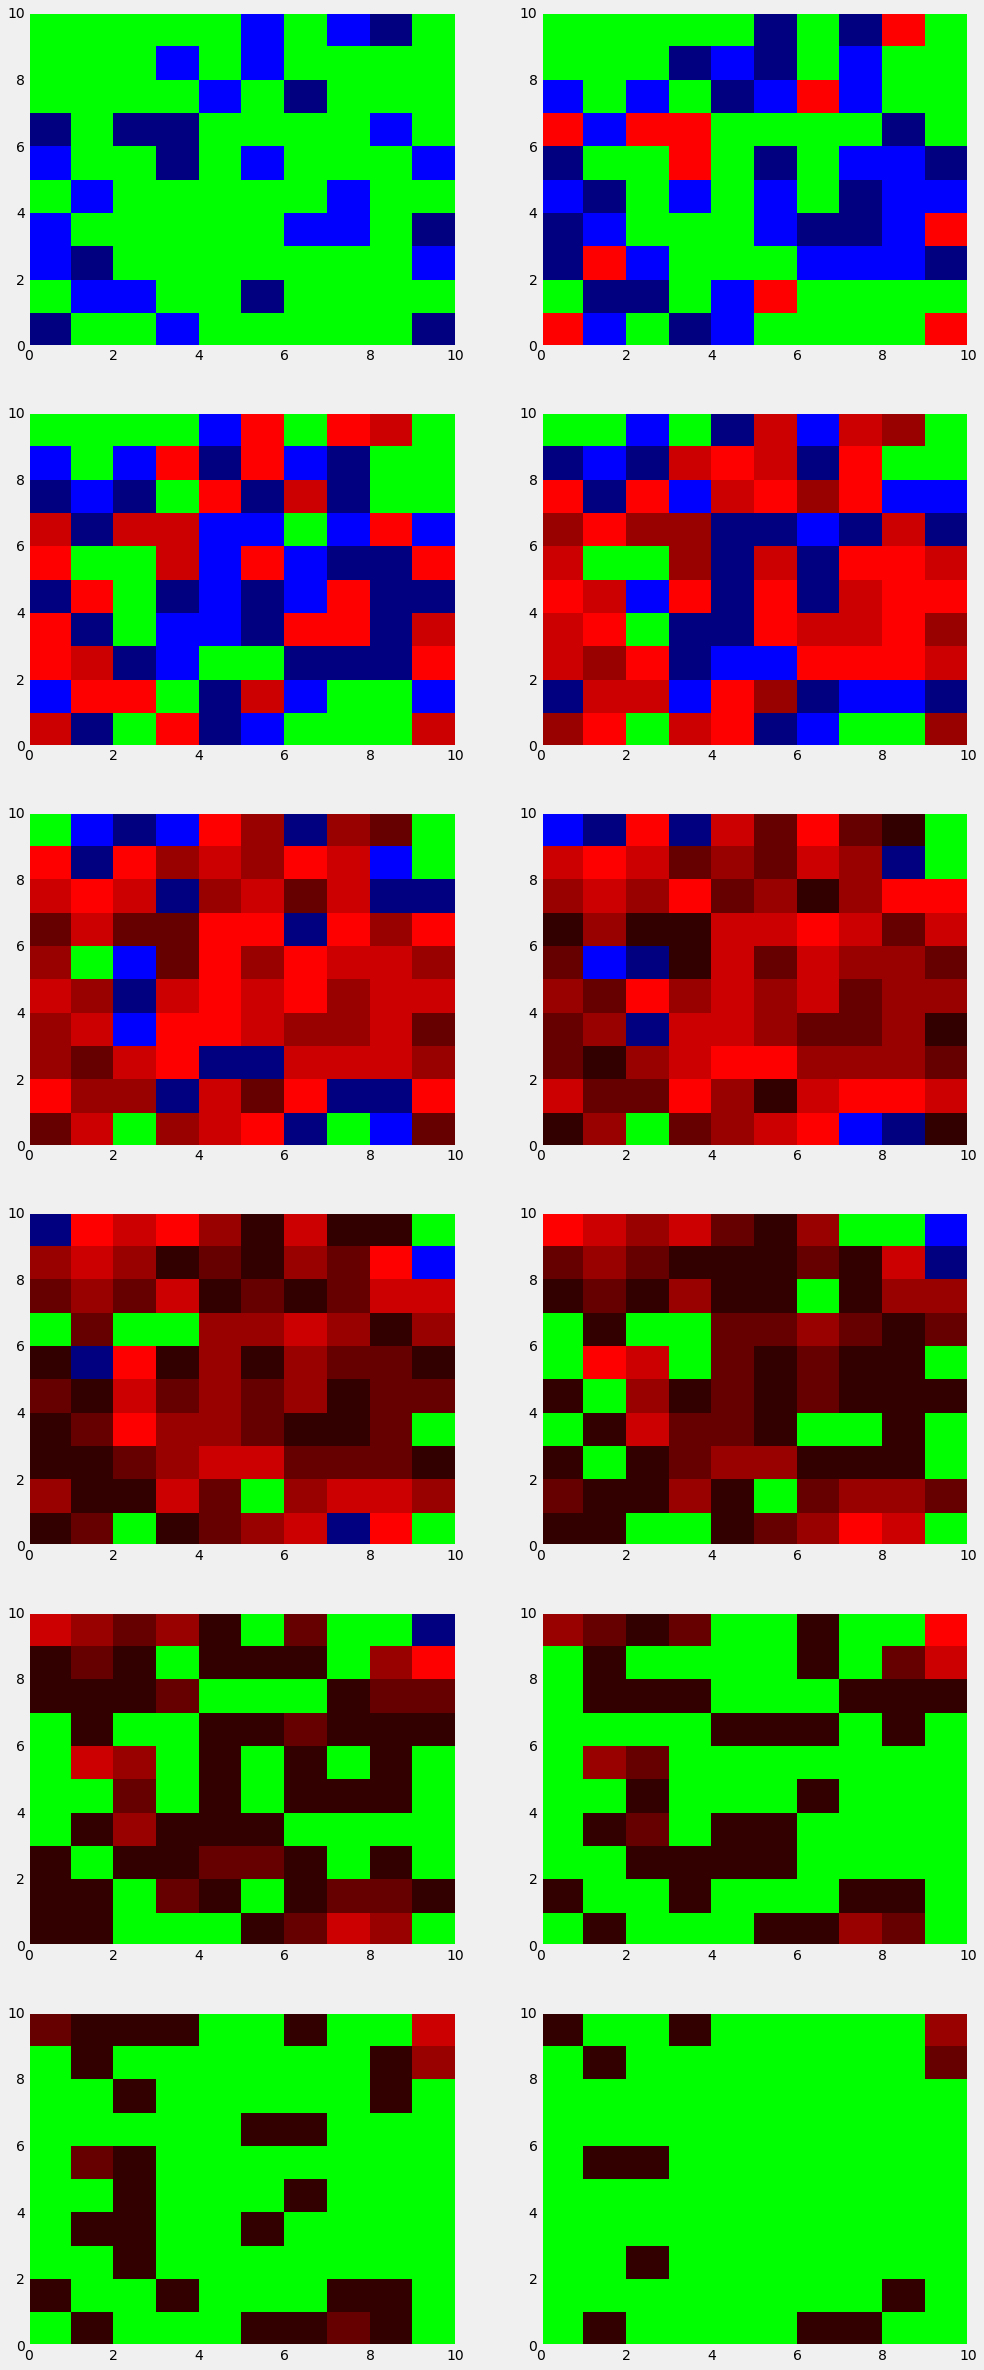

In [220]:
animDiseaseSpread(grids9)

In [221]:
print(noOfInfectsAtAnyTime)
print(noOfSusceptsAtAnyTime)
noOfInfectsAtAnyTime9=noOfInfectsAtAnyTime.copy()
noOfSusceptsAtAnyTime9=noOfSusceptsAtAnyTime.copy()

[30, 43, 44, 34, 20, 9, 4, 2, 1, 0, 0, 0]
[70, 46, 26, 12, 6, 3, 8, 20, 35, 59, 70, 88]


## Q3 

In [232]:
probSusceptible=0.5
#probCatch=0.5 prob that it will ctach the inf will dpened on no of sick neighs
probBeSusceptible=0.5

In [234]:
grids11=DiseaseSpreadSim(10,10,probSusceptible,'reflecting',rows*cols-1,3) #applying rule3 for simulation
grids11

12


[array([[2, 0, 0, 0, 0, 2, 2, 1, 2, 1],
        [0, 0, 0, 1, 2, 0, 2, 0, 0, 1],
        [0, 0, 0, 1, 2, 0, 0, 2, 0, 1],
        [2, 0, 1, 0, 1, 2, 1, 2, 0, 2],
        [0, 2, 0, 2, 0, 0, 0, 0, 0, 0],
        [1, 0, 2, 2, 1, 1, 2, 0, 0, 0],
        [2, 2, 0, 0, 0, 0, 1, 2, 0, 0],
        [0, 1, 0, 1, 2, 0, 0, 0, 0, 0],
        [1, 0, 0, 1, 0, 1, 0, 0, 1, 0],
        [0, 0, 2, 0, 2, 0, 0, 0, 2, 1]]),
 array([[3, 0, 0, 0, 0, 3, 3, 2, 3, 2],
        [0, 0, 0, 2, 3, 1, 3, 0, 1, 2],
        [0, 0, 0, 2, 3, 1, 1, 3, 1, 2],
        [3, 1, 2, 1, 2, 3, 2, 3, 1, 3],
        [0, 3, 1, 3, 1, 0, 0, 1, 0, 0],
        [2, 1, 3, 3, 2, 2, 3, 0, 0, 0],
        [3, 3, 1, 0, 0, 0, 2, 3, 0, 0],
        [1, 2, 1, 2, 3, 1, 0, 0, 0, 0],
        [2, 1, 1, 2, 1, 2, 1, 0, 2, 0],
        [0, 1, 3, 0, 3, 0, 0, 0, 3, 2]]),
 array([[4, 0, 0, 0, 0, 4, 4, 3, 4, 3],
        [0, 0, 0, 3, 4, 2, 4, 0, 2, 3],
        [0, 0, 1, 3, 4, 2, 2, 4, 2, 3],
        [4, 2, 3, 2, 3, 4, 3, 4, 2, 4],
        [0, 4, 2, 4, 2, 0, 1, 2, 0, 

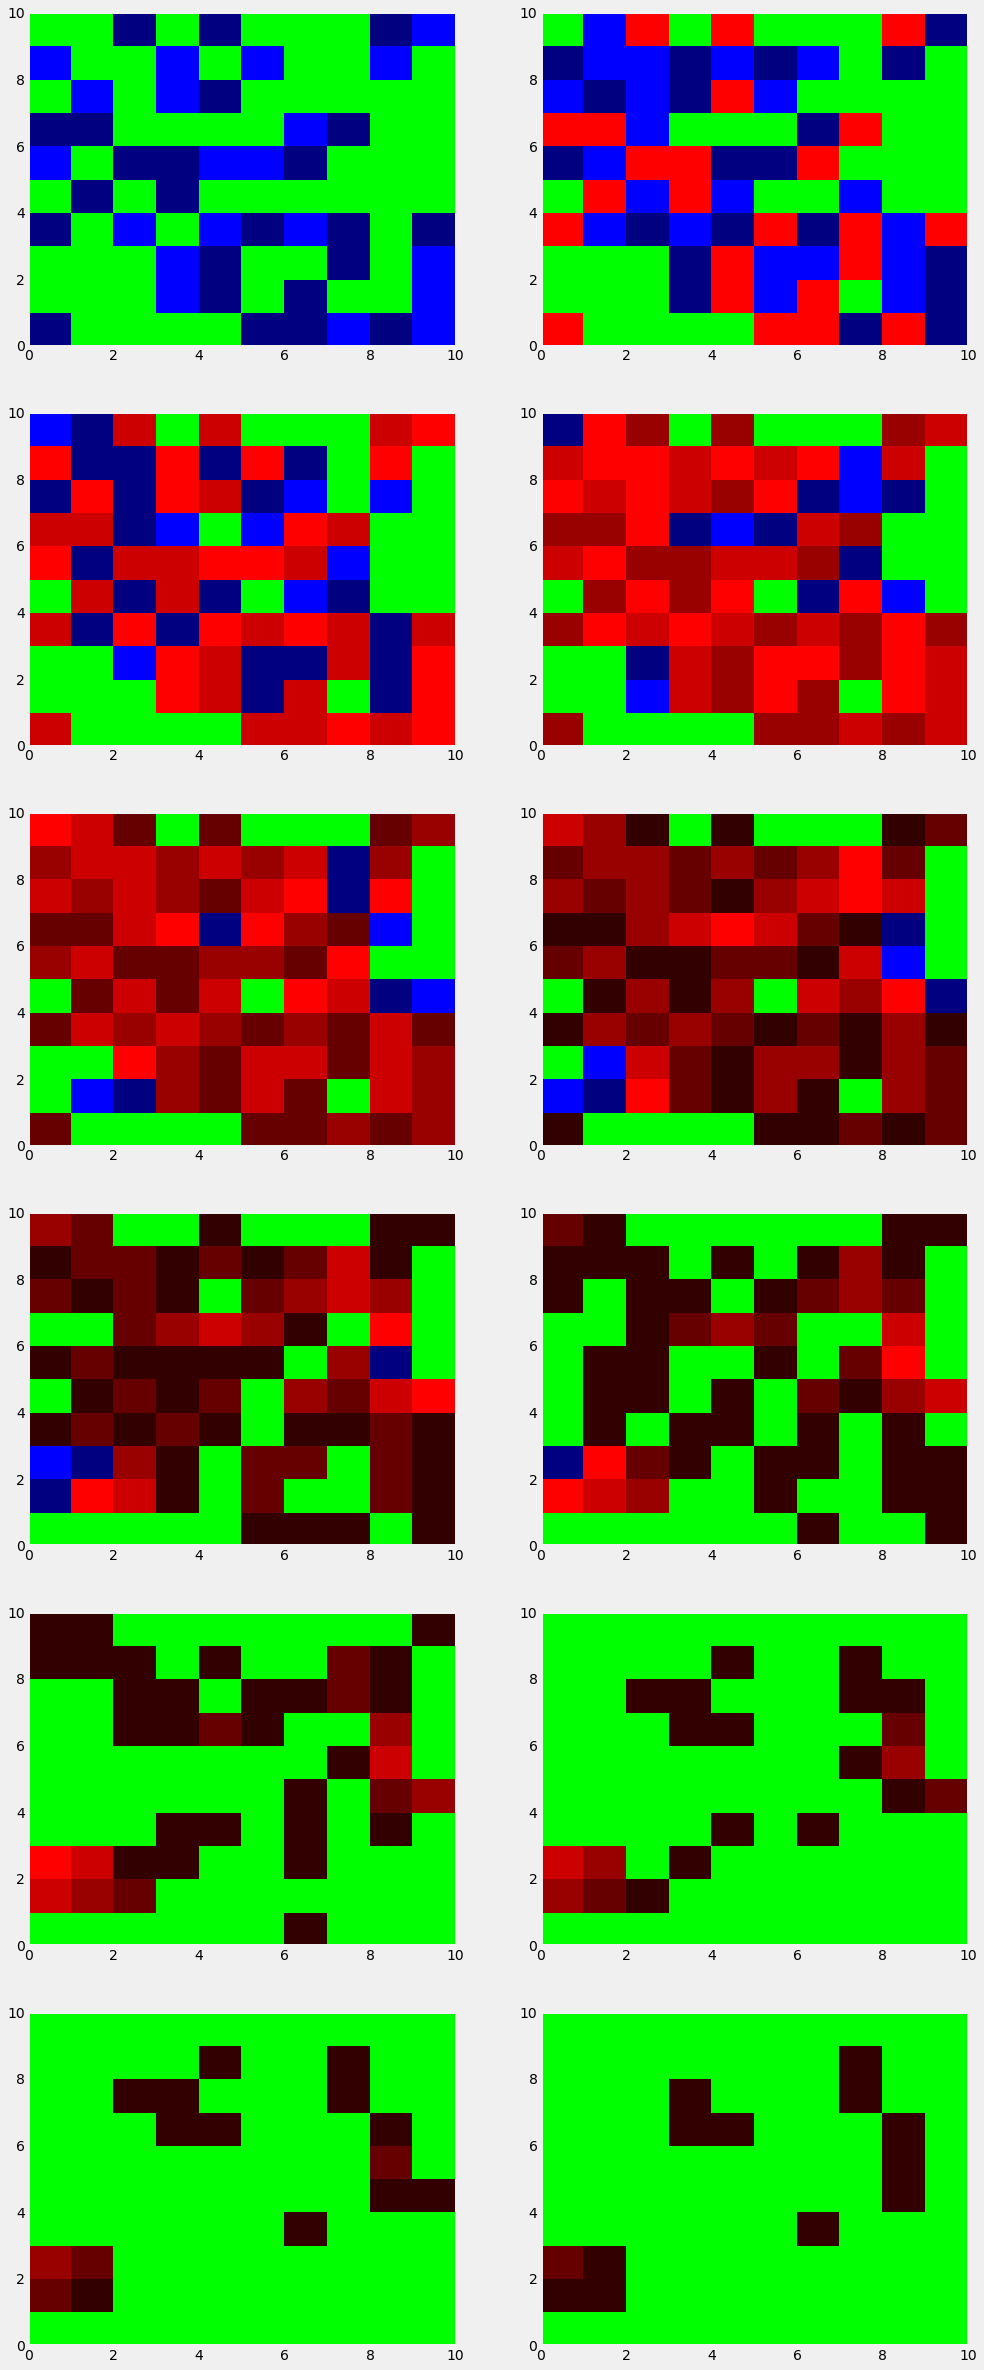

In [235]:
animDiseaseSpread(grids11)

In [236]:
print(noOfInfectsAtAnyTime)
print(noOfSusceptsAtAnyTime)
noOfInfectsAtAnyTime11=noOfInfectsAtAnyTime.copy()
noOfSusceptsAtAnyTime11=noOfSusceptsAtAnyTime.copy()

[44, 41, 29, 13, 8, 6, 4, 1, 0, 0, 0, 0]
[56, 35, 27, 22, 19, 16, 28, 44, 62, 79, 84, 87]


## ProbSusceptible=0.3


In [32]:
probSusceptible=0.3
probBeSusceptible=0.5

In [33]:
grids12=DiseaseSpreadSim(10,10,probSusceptible,'reflecting',rows*cols-1,3) #applying rule3 for simulation
grids12

12


[array([[2, 0, 0, 1, 1, 0, 1, 0, 1, 2],
        [0, 0, 1, 2, 1, 0, 2, 0, 2, 2],
        [1, 0, 1, 0, 0, 0, 1, 1, 2, 2],
        [1, 0, 2, 1, 0, 2, 0, 1, 2, 2],
        [0, 2, 1, 1, 2, 0, 0, 1, 2, 2],
        [2, 2, 2, 0, 2, 2, 0, 0, 1, 0],
        [1, 0, 2, 2, 1, 0, 0, 2, 1, 1],
        [1, 1, 1, 2, 2, 0, 1, 2, 1, 2],
        [1, 0, 1, 2, 2, 2, 0, 1, 0, 1],
        [2, 2, 1, 1, 2, 1, 0, 1, 2, 1]]),
 array([[3, 1, 0, 2, 2, 0, 2, 1, 2, 3],
        [0, 1, 2, 3, 2, 0, 3, 1, 3, 3],
        [2, 0, 2, 1, 0, 1, 2, 2, 3, 3],
        [2, 1, 3, 2, 1, 3, 1, 2, 3, 3],
        [1, 3, 2, 2, 3, 0, 0, 2, 3, 3],
        [3, 3, 3, 1, 3, 3, 0, 1, 2, 1],
        [2, 1, 3, 3, 2, 1, 0, 3, 2, 2],
        [2, 2, 2, 3, 3, 0, 2, 3, 2, 3],
        [2, 1, 2, 3, 3, 3, 1, 2, 1, 2],
        [3, 3, 2, 2, 3, 2, 0, 2, 3, 2]]),
 array([[4, 2, 0, 3, 3, 1, 3, 2, 3, 4],
        [1, 2, 3, 4, 3, 0, 4, 2, 4, 4],
        [3, 1, 3, 2, 1, 2, 3, 3, 4, 4],
        [3, 2, 4, 3, 2, 4, 2, 3, 4, 4],
        [2, 4, 3, 3, 4, 0, 1, 3, 4, 

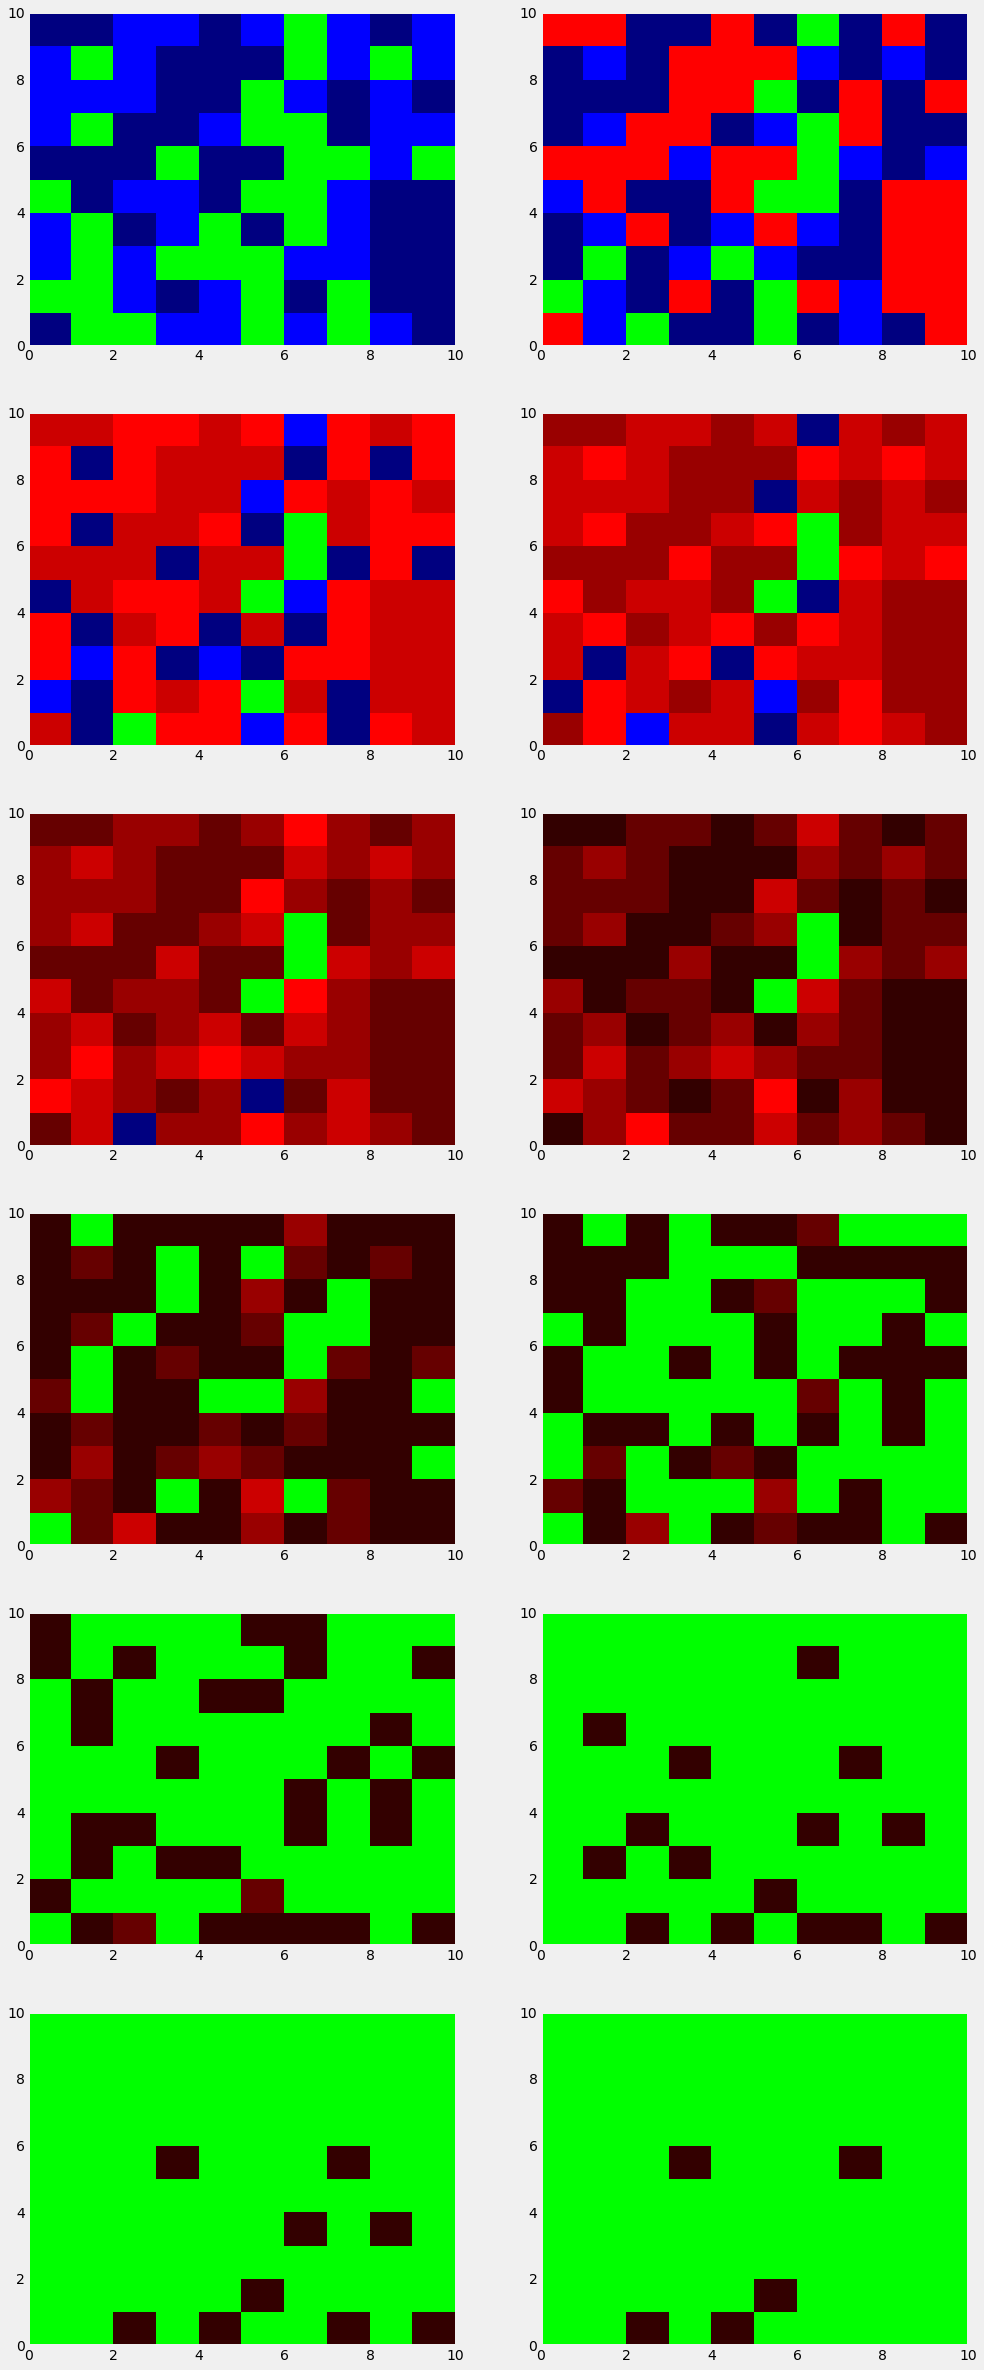

In [34]:
animDiseaseSpread(grids12)

In [35]:
print(noOfInfectsAtAnyTime)
print(noOfSusceptsAtAnyTime)
noOfInfectsAtAnyTime12=noOfInfectsAtAnyTime.copy()
noOfSusceptsAtAnyTime12=noOfSusceptsAtAnyTime.copy()

[70, 53, 25, 9, 2, 0, 0, 0, 0, 0, 0, 0]
[30, 12, 5, 3, 3, 3, 18, 51, 67, 85, 91, 95]


## ProbSusceptible=0.8


In [36]:
probSusceptible=0.8
probBeSusceptible=0.5

In [37]:
grids13=DiseaseSpreadSim(10,10,probSusceptible,'reflecting',rows*cols-1,3) #applying rule3 for simulation
grids13

12


[array([[0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 0, 0, 0, 0, 2, 1],
        [2, 0, 0, 0, 1, 0, 0, 2, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 2],
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 1],
        [2, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [2, 1, 0, 0, 2, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [1, 0, 2, 0, 2, 0, 0, 0, 0, 1]]),
 array([[0, 1, 3, 1, 0, 0, 0, 0, 1, 1],
        [1, 2, 2, 2, 0, 0, 0, 1, 3, 2],
        [3, 0, 0, 1, 2, 0, 1, 3, 0, 1],
        [1, 0, 0, 0, 0, 1, 0, 0, 0, 3],
        [0, 0, 0, 0, 0, 2, 0, 2, 0, 2],
        [3, 1, 0, 0, 0, 1, 0, 1, 1, 2],
        [3, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [3, 2, 0, 0, 3, 0, 0, 0, 2, 0],
        [0, 0, 0, 0, 1, 0, 2, 0, 0, 0],
        [2, 0, 3, 1, 3, 0, 0, 0, 0, 2]]),
 array([[1, 2, 4, 2, 1, 0, 0, 0, 2, 2],
        [2, 3, 3, 3, 1, 0, 0, 2, 4, 3],
        [4, 1, 1, 2, 3, 1, 2, 4, 1, 2],
        [2, 0, 0, 0, 1, 2, 0, 0, 0, 4],
        [1, 1, 0, 0, 0, 3, 0, 3, 1, 

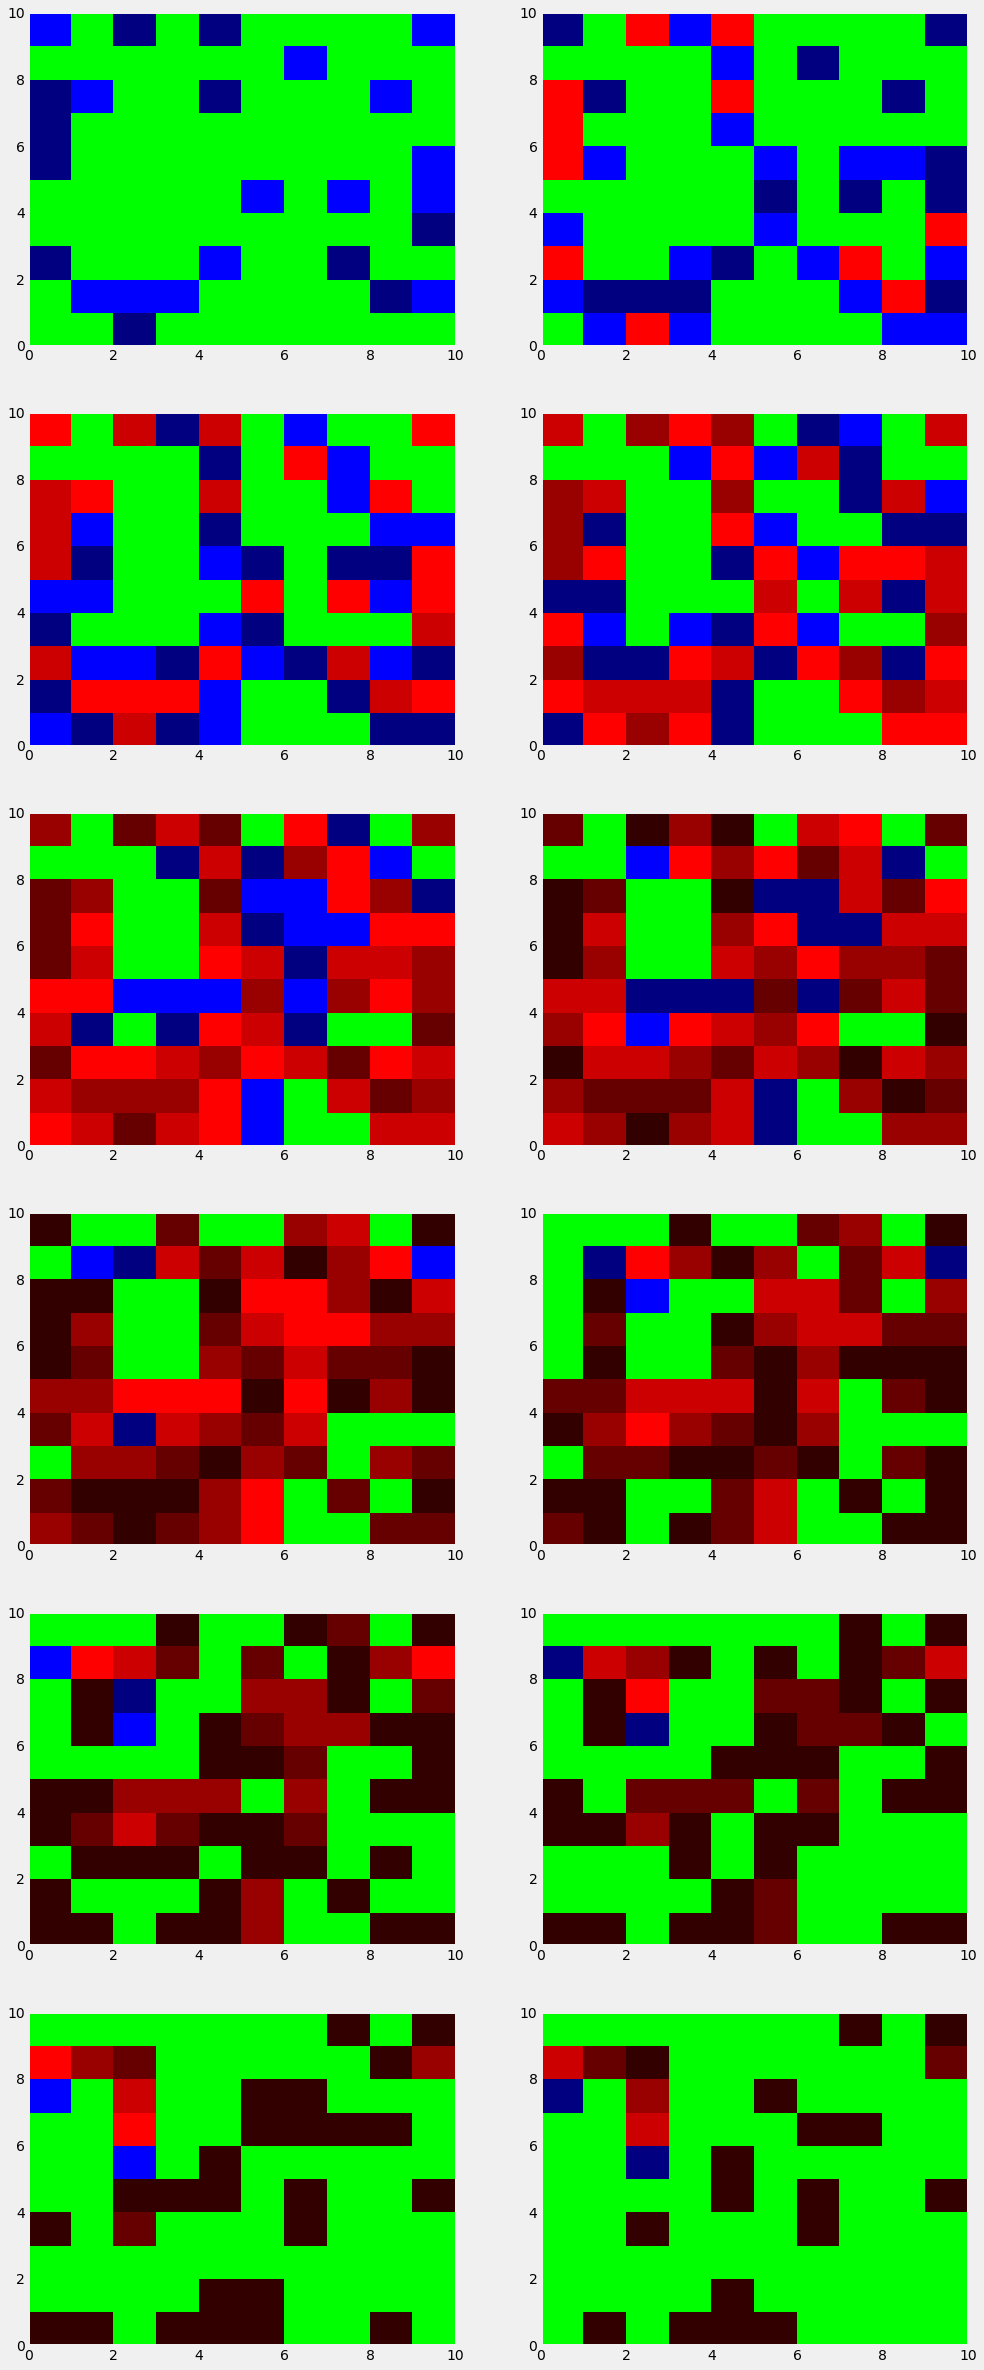

In [38]:
animDiseaseSpread(grids13)

In [39]:
print(noOfInfectsAtAnyTime)
print(noOfSusceptsAtAnyTime)
noOfInfectsAtAnyTime13=noOfInfectsAtAnyTime.copy()
noOfSusceptsAtAnyTime13=noOfSusceptsAtAnyTime.copy()

[25, 32, 36, 27, 20, 13, 4, 3, 3, 2, 2, 2]
[75, 57, 39, 30, 19, 17, 21, 31, 38, 50, 66, 76]


# Q4 

## pobSusceptible=0.5 

In [43]:
probSusceptible=0.5
#probCatch=0.5 prob that it will ctach the inf will dpened on no of sick neighs
probBeSusceptible=0.5

In [28]:
grids13=DiseaseSpreadSim(10,10,probSusceptible,'reflecting',rows*cols-1,4) #applying rule3 for simulation
grids13

12


[array([[1, 0, 0, 2, 0, 1, 2, 0, 0, 0],
        [2, 1, 0, 1, 0, 0, 0, 0, 1, 0],
        [1, 2, 0, 0, 0, 2, 0, 1, 0, 1],
        [0, 0, 2, 1, 2, 2, 0, 2, 2, 2],
        [1, 0, 2, 1, 0, 0, 2, 2, 1, 1],
        [0, 0, 1, 1, 1, 1, 1, 2, 0, 0],
        [1, 1, 0, 2, 0, 1, 2, 0, 1, 2],
        [0, 2, 1, 1, 0, 1, 2, 2, 0, 1],
        [1, 2, 2, 0, 0, 1, 0, 0, 2, 0],
        [0, 1, 1, 0, 0, 2, 1, 0, 2, 0]]),
 array([[2, 0, 0, 3, 0, 2, 3, 0, 1, 0],
        [3, 2, 0, 2, 0, 1, 0, 0, 2, 0],
        [2, 3, 0, 1, 0, 3, 0, 2, 1, 2],
        [0, 0, 3, 2, 3, 3, 1, 3, 3, 3],
        [2, 1, 3, 2, 0, 1, 3, 3, 2, 2],
        [1, 1, 2, 2, 2, 2, 2, 3, 0, 1],
        [2, 2, 1, 3, 1, 2, 3, 1, 2, 3],
        [1, 3, 2, 2, 1, 2, 3, 3, 1, 2],
        [2, 3, 3, 1, 0, 2, 0, 0, 3, 0],
        [1, 2, 2, 0, 0, 3, 2, 0, 3, 0]]),
 array([[3, 1, 0, 4, 0, 3, 4, 0, 2, 1],
        [4, 3, 1, 3, 1, 2, 0, 0, 3, 0],
        [3, 4, 1, 2, 0, 4, 0, 3, 2, 3],
        [0, 0, 4, 3, 4, 4, 2, 4, 4, 4],
        [3, 2, 4, 3, 0, 2, 4, 4, 3, 

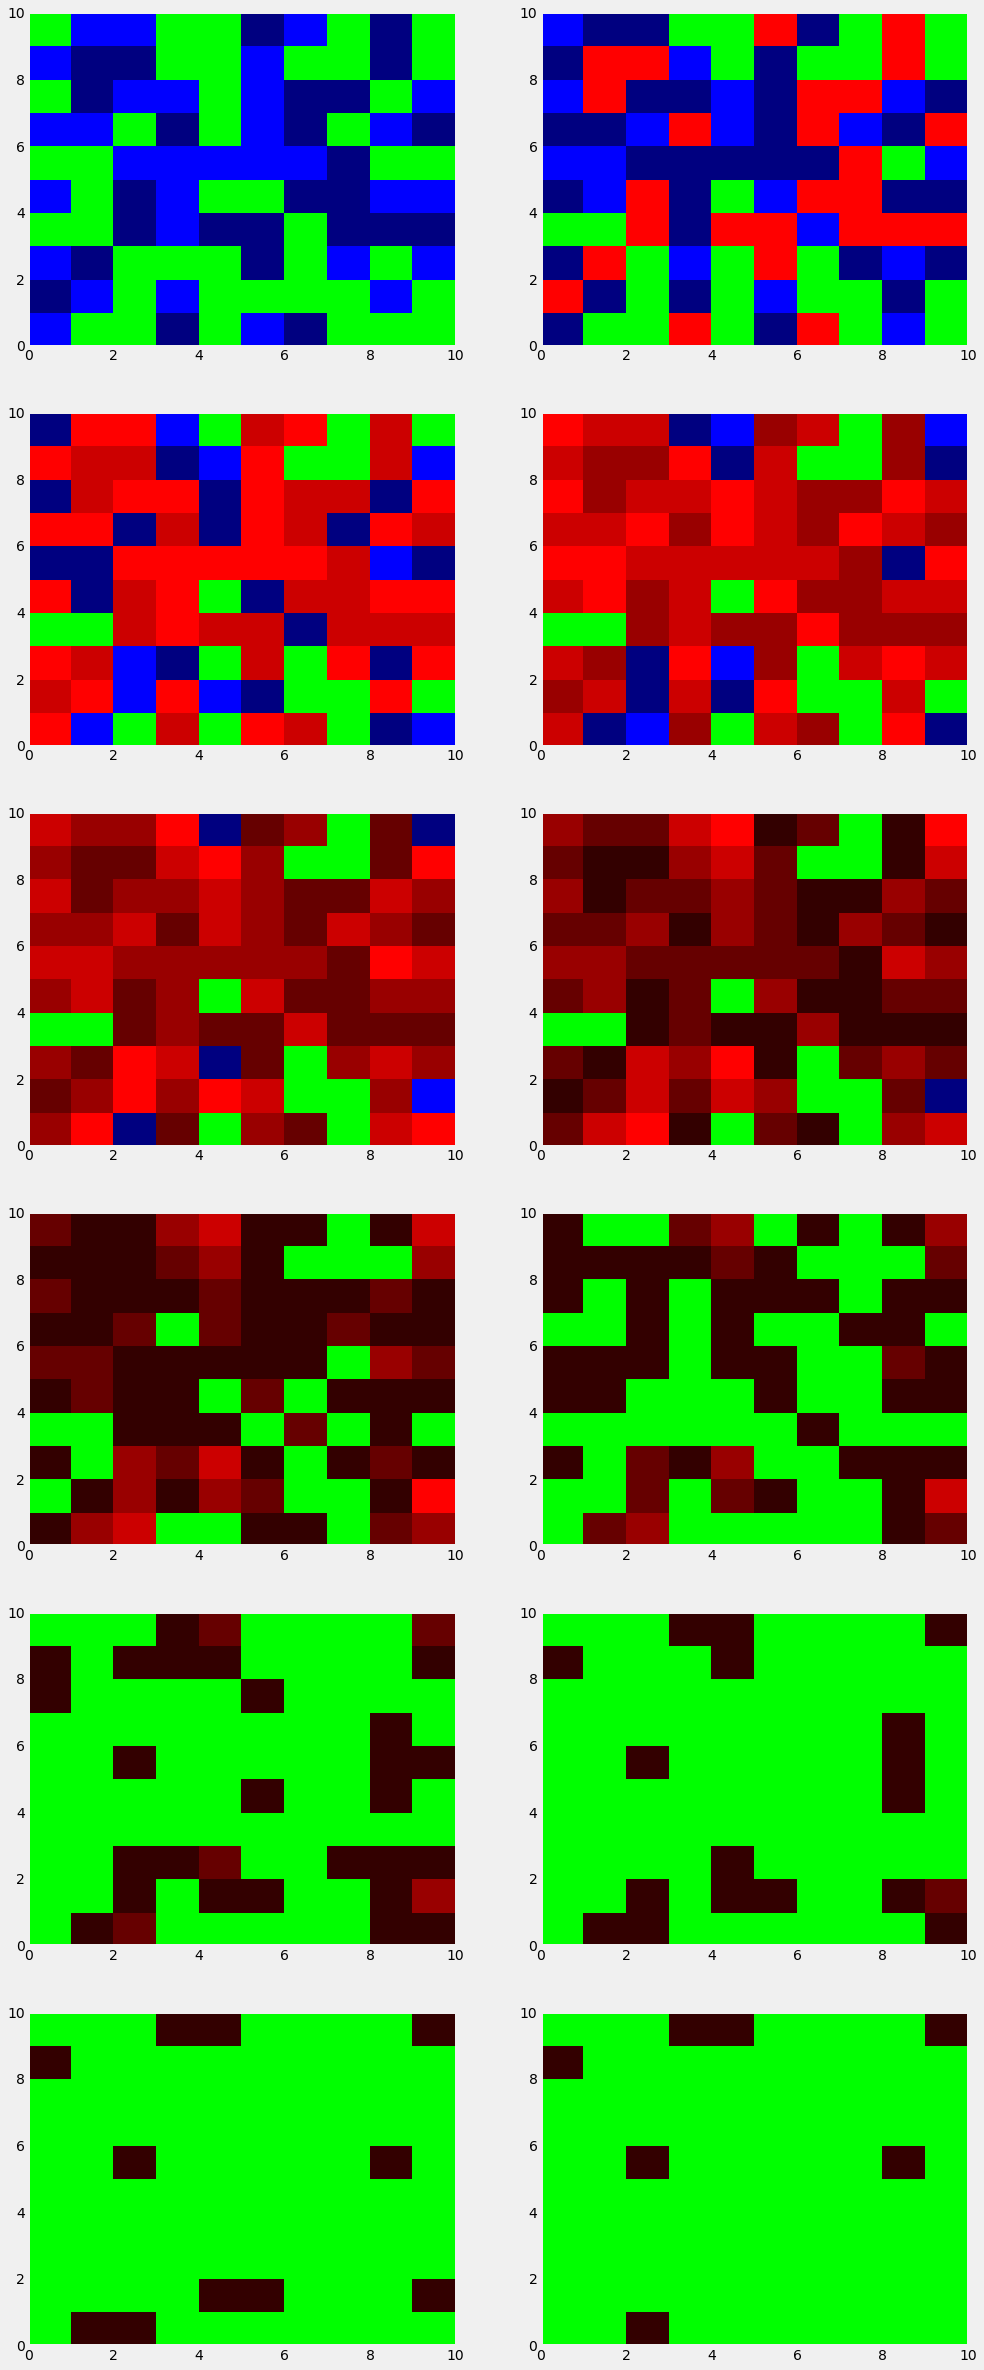

In [30]:
animDiseaseSpread(grids13)

In [31]:
print(noOfInfectsAtAnyTime)
print(noOfSusceptsAtAnyTime)
noOfInfectsAtAnyTime13=noOfInfectsAtAnyTime.copy()
noOfSusceptsAtAnyTime13=noOfSusceptsAtAnyTime.copy()

[57, 49, 27, 13, 5, 1, 0, 0, 0, 0, 0, 0]
[43, 25, 16, 12, 11, 11, 21, 47, 69, 82, 89, 93]


In [44]:
grids14=DiseaseSpreadSim(10,10,probSusceptible,'reflecting',rows*cols-1,4) #applying rule3 for simulation
grids14

12


[array([[0, 1, 1, 0, 2, 0, 1, 2, 1, 1],
        [2, 2, 0, 0, 2, 2, 0, 1, 0, 1],
        [2, 0, 0, 0, 0, 1, 2, 0, 2, 2],
        [0, 0, 0, 2, 0, 1, 0, 1, 0, 0],
        [0, 0, 2, 1, 0, 2, 2, 0, 1, 1],
        [1, 2, 0, 0, 1, 2, 0, 2, 2, 0],
        [2, 1, 2, 0, 2, 0, 1, 0, 0, 0],
        [2, 2, 2, 1, 1, 1, 2, 0, 2, 2],
        [0, 0, 1, 0, 0, 0, 0, 0, 2, 1],
        [1, 1, 2, 0, 0, 0, 2, 0, 0, 0]]),
 array([[0, 2, 2, 1, 3, 1, 2, 3, 2, 2],
        [3, 3, 1, 0, 3, 3, 0, 2, 0, 2],
        [3, 0, 0, 0, 0, 2, 3, 1, 3, 3],
        [0, 0, 0, 3, 1, 2, 1, 2, 1, 0],
        [1, 0, 3, 2, 1, 3, 3, 0, 2, 2],
        [2, 3, 1, 1, 2, 3, 1, 3, 3, 1],
        [3, 2, 3, 1, 3, 0, 2, 0, 1, 0],
        [3, 3, 3, 2, 2, 2, 3, 0, 3, 3],
        [1, 1, 2, 1, 0, 0, 0, 0, 3, 2],
        [2, 2, 3, 0, 0, 0, 3, 0, 0, 0]]),
 array([[0, 3, 3, 2, 4, 2, 3, 4, 3, 3],
        [4, 4, 2, 0, 4, 4, 0, 3, 1, 3],
        [4, 0, 0, 0, 1, 3, 4, 2, 4, 4],
        [0, 0, 0, 4, 2, 3, 2, 3, 2, 0],
        [2, 0, 4, 3, 2, 4, 4, 0, 3, 

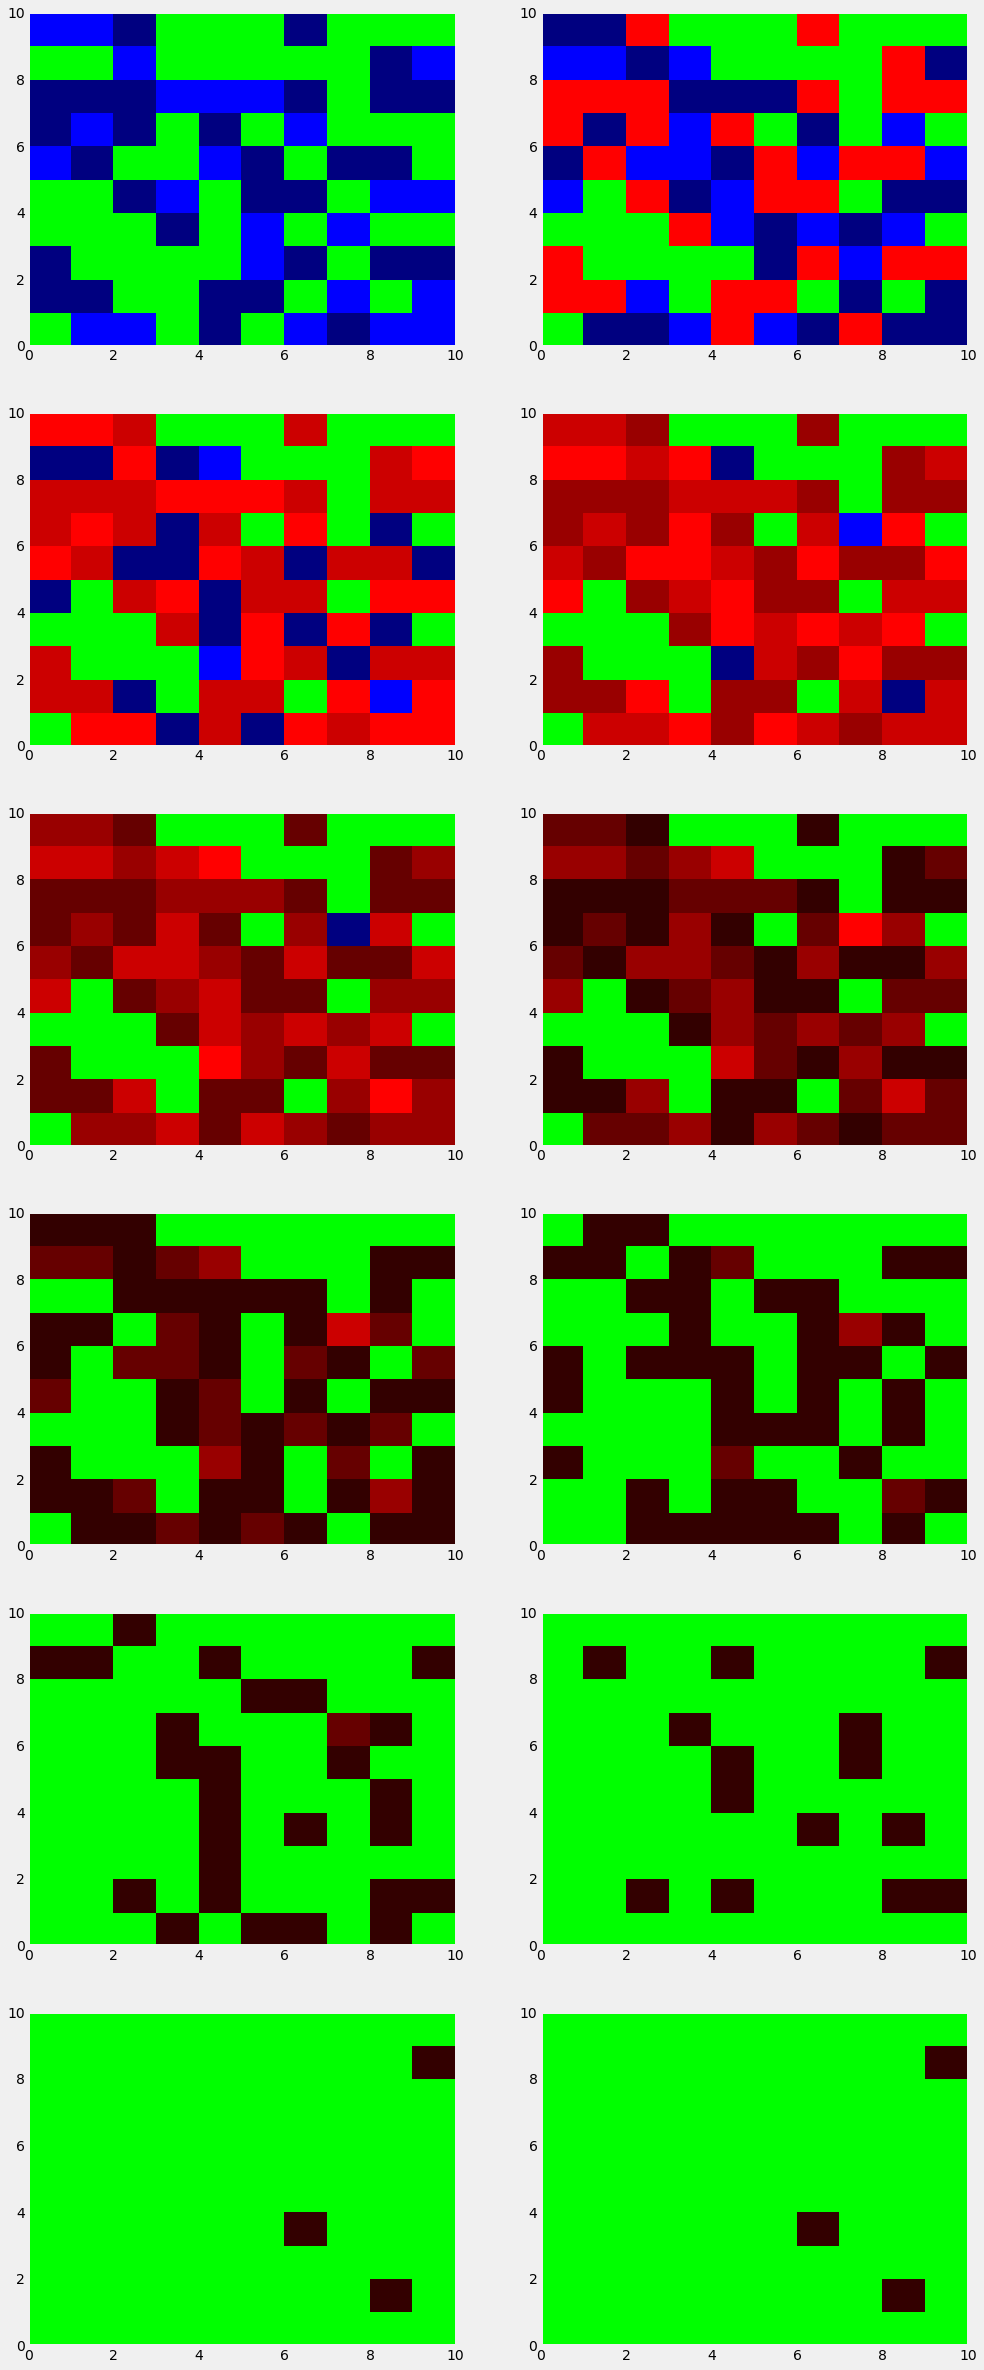

In [46]:
animDiseaseSpread(grids14)

In [45]:
print(noOfInfectsAtAnyTime)
print(noOfSusceptsAtAnyTime)
noOfInfectsAtAnyTime14=noOfInfectsAtAnyTime.copy()
noOfSusceptsAtAnyTime14=noOfSusceptsAtAnyTime.copy()

[54, 42, 21, 4, 1, 0, 0, 0, 0, 0, 0, 0]
[46, 28, 25, 24, 24, 24, 37, 55, 73, 86, 97, 97]


## probSusceptible=0.3 

In [47]:
probSusceptible=0.3
#probCatch=0.5 prob that it will ctach the inf will dpened on no of sick neighs
probBeSusceptible=0.5

In [48]:
grids15=DiseaseSpreadSim(10,10,probSusceptible,'reflecting',rows*cols-1,4) #applying rule3 for simulation
grids15

12


[array([[0, 2, 1, 0, 1, 1, 1, 1, 1, 0],
        [1, 0, 1, 0, 1, 1, 0, 2, 1, 0],
        [2, 1, 2, 1, 0, 0, 1, 1, 0, 2],
        [2, 2, 0, 1, 0, 1, 1, 1, 1, 0],
        [0, 2, 0, 2, 0, 1, 2, 2, 2, 2],
        [0, 1, 0, 0, 0, 1, 2, 1, 0, 2],
        [2, 0, 0, 0, 1, 1, 2, 1, 0, 0],
        [2, 2, 1, 1, 0, 1, 1, 2, 0, 1],
        [1, 1, 0, 0, 2, 0, 0, 1, 1, 2],
        [0, 0, 0, 2, 0, 1, 2, 0, 2, 2]]),
 array([[0, 3, 2, 0, 2, 2, 2, 2, 2, 0],
        [2, 1, 2, 1, 2, 2, 1, 3, 2, 1],
        [3, 2, 3, 2, 1, 1, 2, 2, 1, 3],
        [3, 3, 0, 2, 0, 2, 2, 2, 2, 1],
        [1, 3, 0, 3, 0, 2, 3, 3, 3, 3],
        [0, 2, 1, 0, 0, 2, 3, 2, 0, 3],
        [3, 1, 0, 1, 2, 2, 3, 2, 0, 0],
        [3, 3, 2, 2, 1, 2, 2, 3, 1, 2],
        [2, 2, 1, 0, 3, 1, 0, 2, 2, 3],
        [0, 0, 0, 3, 1, 2, 3, 0, 3, 3]]),
 array([[0, 4, 3, 1, 3, 3, 3, 3, 3, 1],
        [3, 2, 3, 2, 3, 3, 2, 4, 3, 2],
        [4, 3, 4, 3, 2, 2, 3, 3, 2, 4],
        [4, 4, 0, 3, 0, 3, 3, 3, 3, 2],
        [2, 4, 0, 4, 0, 3, 4, 4, 4, 

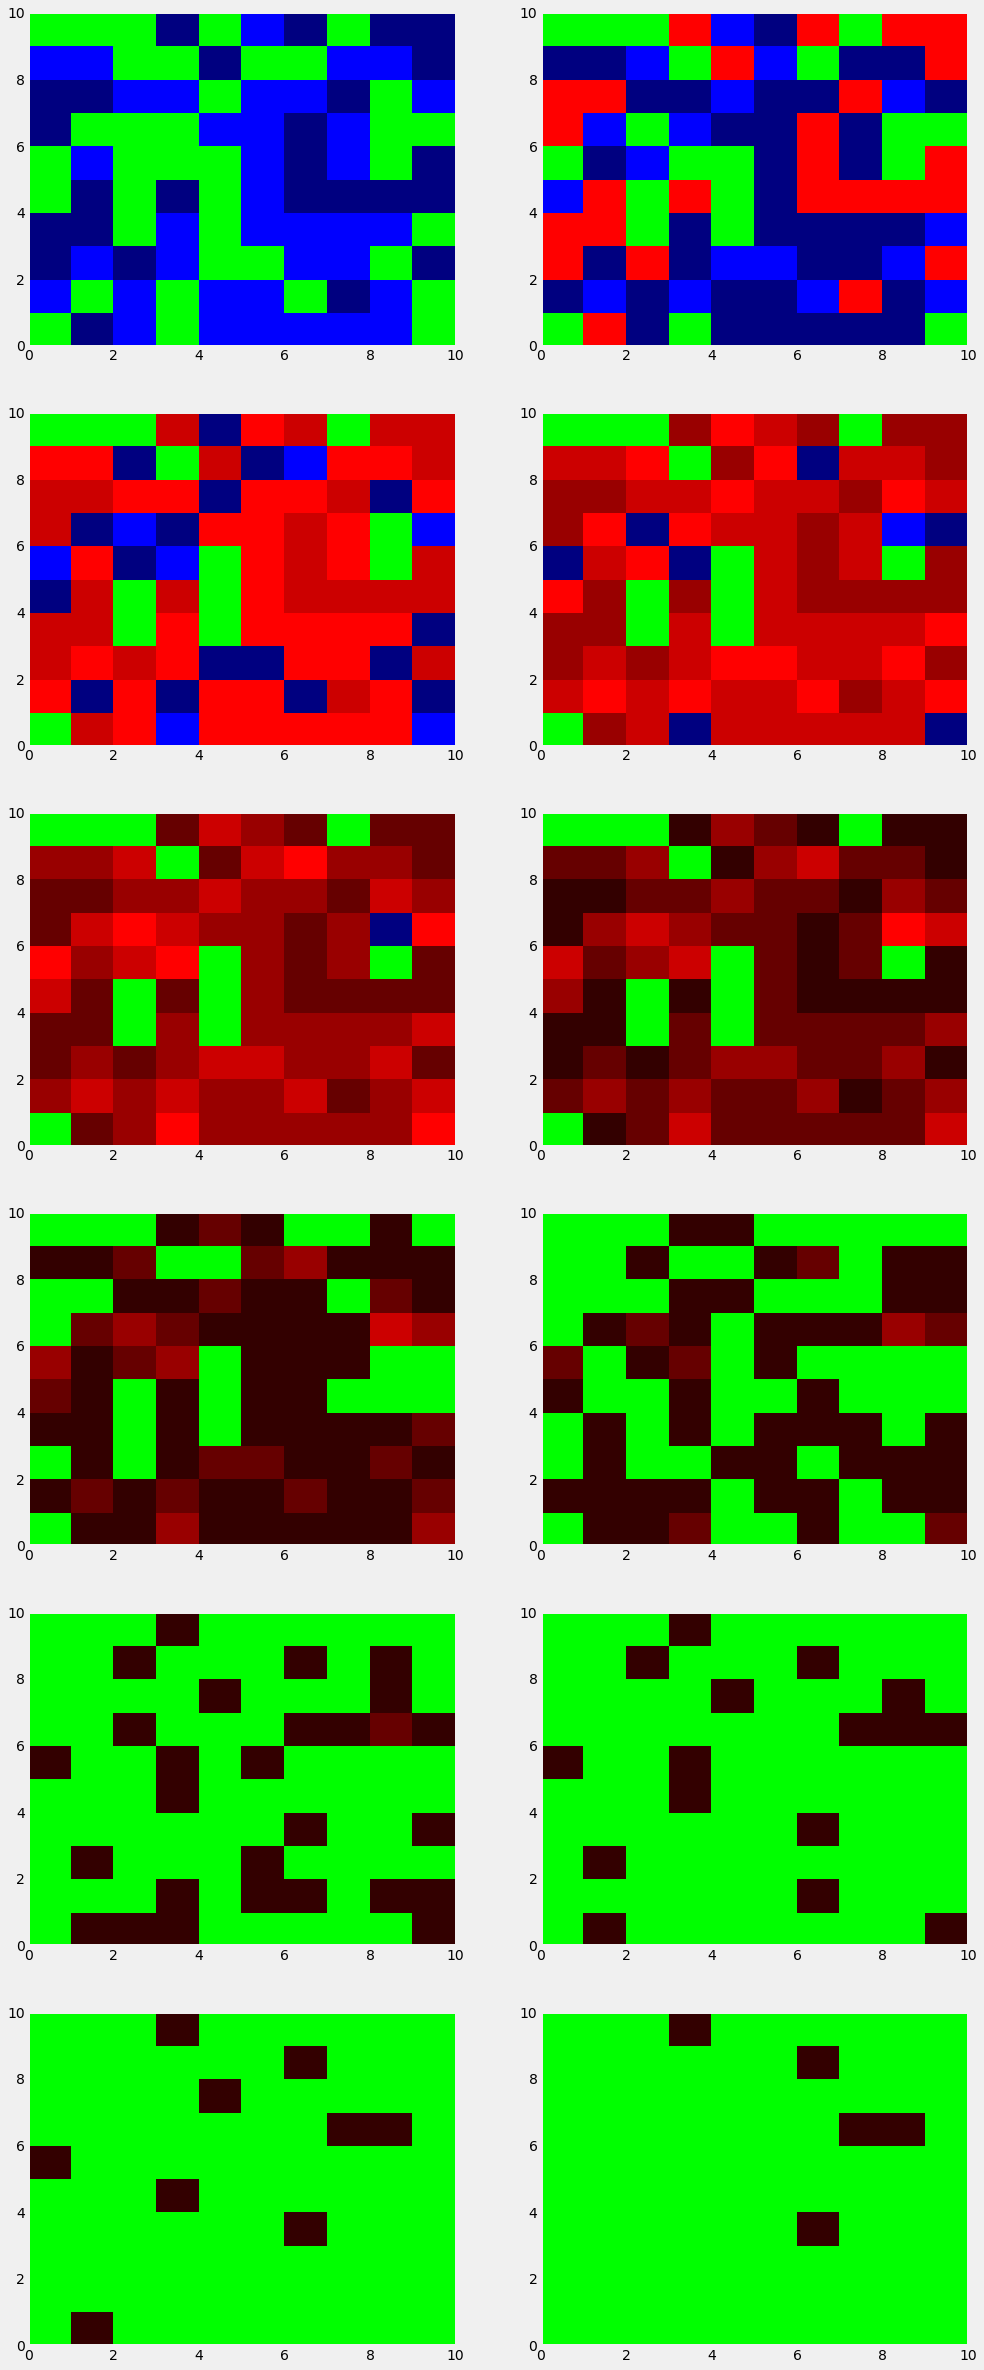

In [49]:
animDiseaseSpread(grids15)

In [50]:
print(noOfInfectsAtAnyTime)
print(noOfSusceptsAtAnyTime)
noOfInfectsAtAnyTime15=noOfInfectsAtAnyTime.copy()
noOfSusceptsAtAnyTime15=noOfSusceptsAtAnyTime.copy()

[63, 54, 24, 8, 1, 0, 0, 0, 0, 0, 0, 0]
[37, 20, 13, 12, 12, 12, 25, 49, 72, 84, 91, 95]


## probBesusceptible=0  for sure because any  immune or recovered individual will not become susceptible again

## probCatch is controlling transmission coeff 'Beta'

## Using Rule1, doing SIR simulation 

In [26]:
probCatch=0.5
probBeSusceptible=0
probSusceptible=0.99

In [27]:
rows,cols=40,2

In [28]:
grids18=DiseaseSpreadSim(20,38,probSusceptible,'reflecting',rows*cols-1,1)
noOfInfectsAtAnyTime18=noOfInfectsAtAnyTime.copy()
noOfSusceptsAtAnyTime18=noOfSusceptsAtAnyTime.copy()
noOfRecoveredAtAnyTime18=(np.array(noOfInfectsAtAnyTime18)+np.array(noOfSusceptsAtAnyTime18))
noOfRecoveredAtAnyTime18=760-noOfRecoveredAtAnyTime18

80


In [24]:
print(noOfInfectsAtAnyTime18)
print(noOfRecoveredAtAnyTime18)
print(noOfSusceptsAtAnyTime18)

[9, 36, 87, 133, 164, 177, 173, 156, 137, 111, 81, 62, 51, 41, 33, 27, 20, 12, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[  0   4   9  40  96 173 258 344 410 438 448 417 383 330 279 211 176 140
 104  79  57  42  28  12   6   3   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0]
[751, 720, 664, 587, 500, 410, 329, 260, 213, 211, 231, 281, 326, 389, 448, 522, 564, 608, 651, 680, 703, 718, 732, 748, 754, 757, 760, 760, 760, 760, 760, 760, 760, 760, 760, 760, 760, 760, 760, 760, 760, 760, 760, 760, 760, 760, 760, 760, 760, 760, 760, 760, 760, 760, 760, 760, 760, 760, 760, 760, 760, 760, 760, 760, 760, 760, 760, 760, 760, 760, 760, 760, 760, 760, 760, 760, 760, 760, 760, 760]


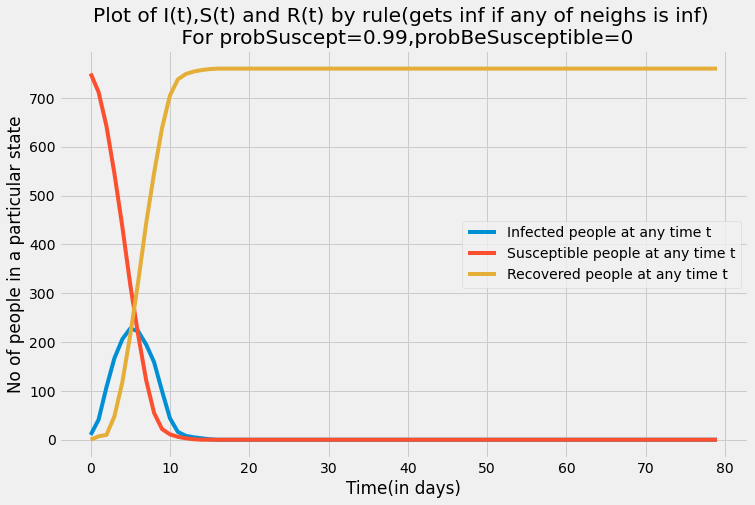

In [29]:
time_steps=np.arange(rows*cols)
str="Plot of I(t),S(t) and R(t) by rule(gets inf if any of neighs is inf) \n For probSuscept={},probBeSusceptible={}"
str=str.format(probSusceptible,probBeSusceptible)
plt.figure(figsize=(11,7))
plt.title(str)
plt.xlabel('Time(in days)')
plt.ylabel('No of people in a particular state')
plt.plot(time_steps,noOfInfectsAtAnyTime18,label='Infected people at any time t')
plt.plot(time_steps,noOfSusceptsAtAnyTime18,label='Susceptible people at any time t')
plt.plot(time_steps,noOfRecoveredAtAnyTime18,label='Recovered people at any time t')
plt.legend()

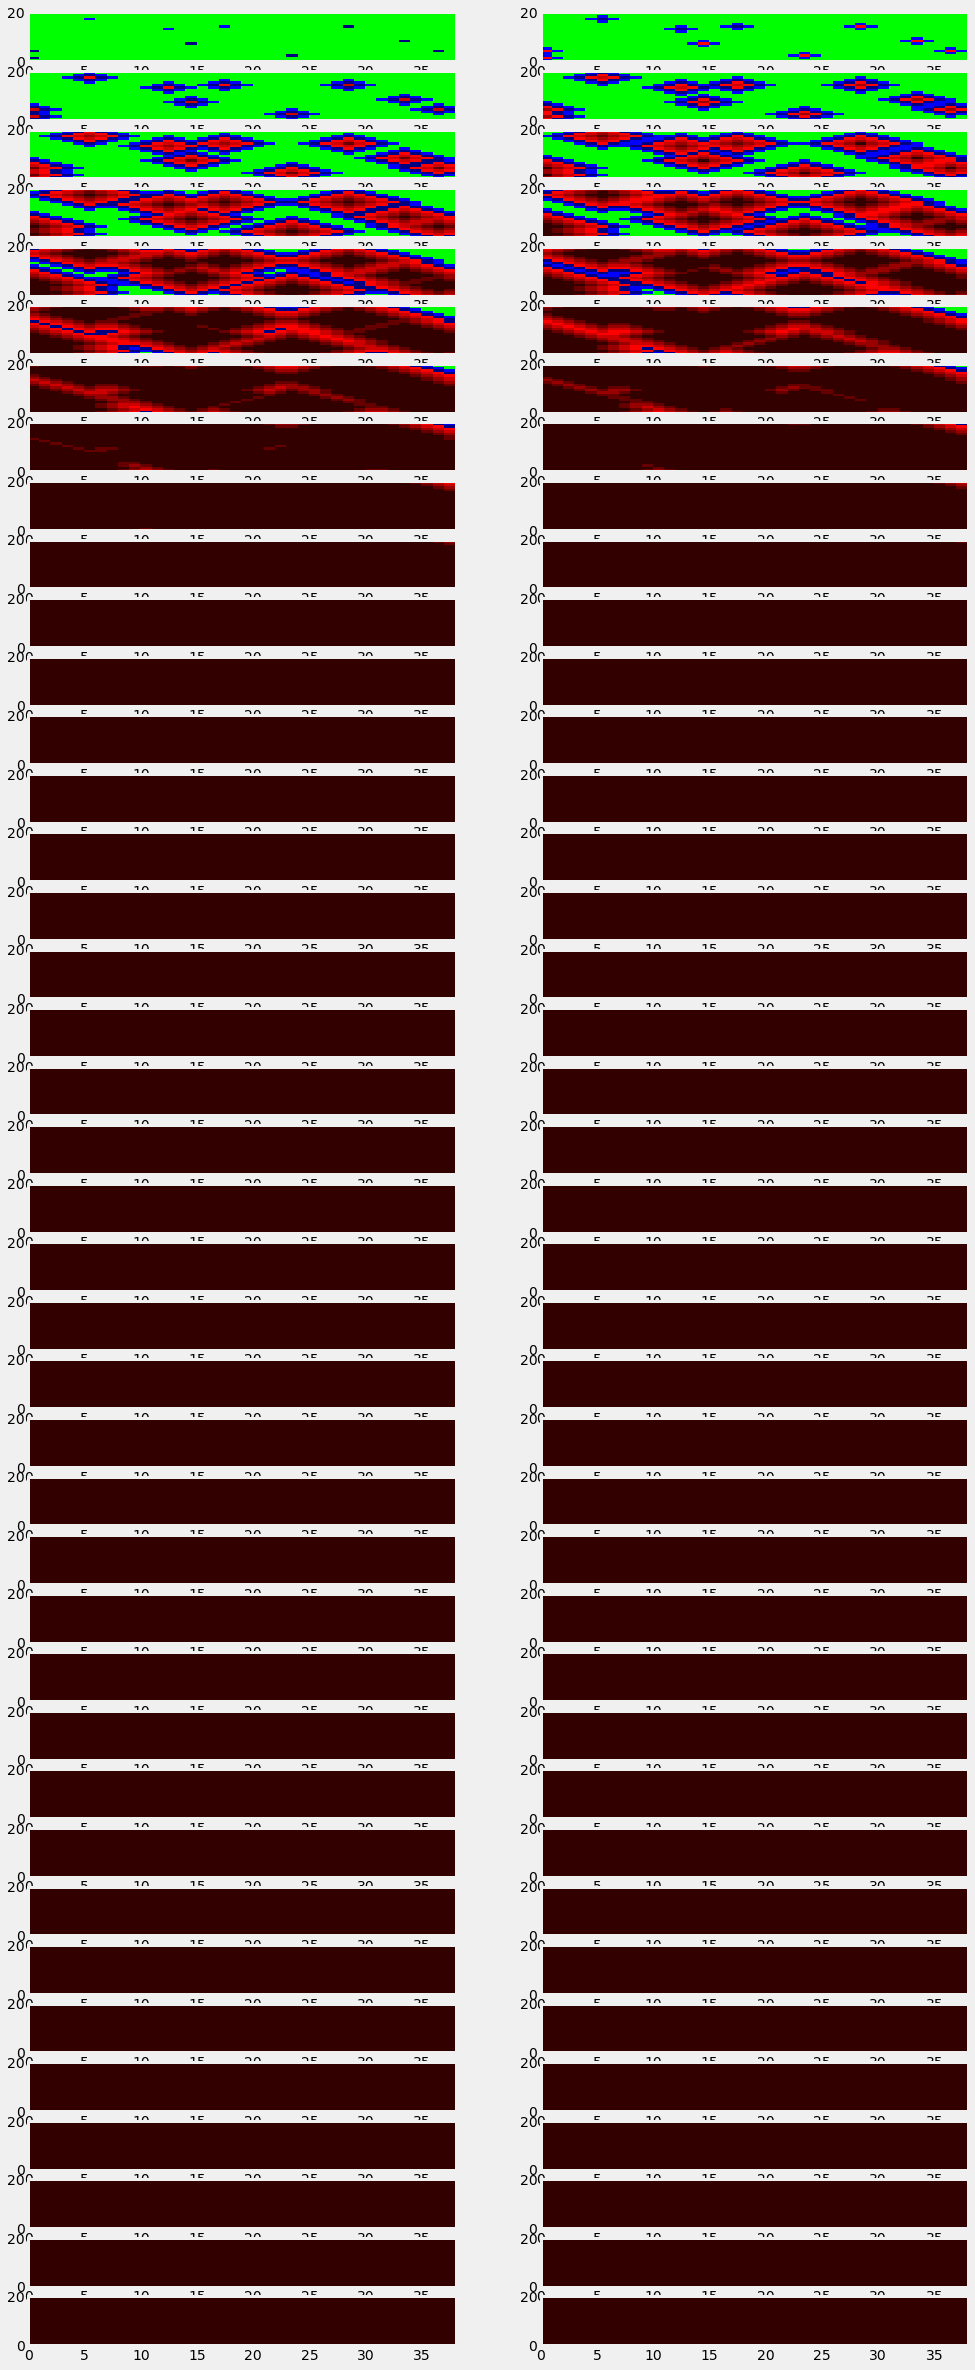

In [33]:
animDiseaseSpread(grids18)

## Taking another sample of the same type 

In [49]:
grids18_2=DiseaseSpreadSim(20,38,probSusceptible,'reflecting',rows*cols-1,1)
noOfInfectsAtAnyTime18_2=noOfInfectsAtAnyTime.copy()
noOfSusceptsAtAnyTime18_2=noOfSusceptsAtAnyTime.copy()
noOfRecoveredAtAnyTime18_2=(np.array(noOfInfectsAtAnyTime18_2)+np.array(noOfSusceptsAtAnyTime18_2))
noOfRecoveredAtAnyTime18_2=760-noOfRecoveredAtAnyTime18_2

80


In [50]:
print(noOfInfectsAtAnyTime18_2)
print(noOfRecoveredAtAnyTime18_2)
print(noOfSusceptsAtAnyTime18_2)

[9, 36, 99, 143, 160, 156, 155, 158, 132, 100, 83, 73, 73, 72, 43, 12, 6, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[  0   8   9  44 108 187 268 343 423 501 555 601 638 674 711 746 754 758
 760 760 760 760 760 760 760 760 760 760 760 760 760 760 760 760 760 760
 760 760 760 760 760 760 760 760 760 760 760 760 760 760 760 760 760 760
 760 760 760 760 760 760 760 760 760 760 760 760 760 760 760 760 760 760
 760 760 760 760 760 760 760 760]
[751, 716, 652, 573, 492, 417, 337, 259, 205, 159, 122, 86, 49, 14, 6, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


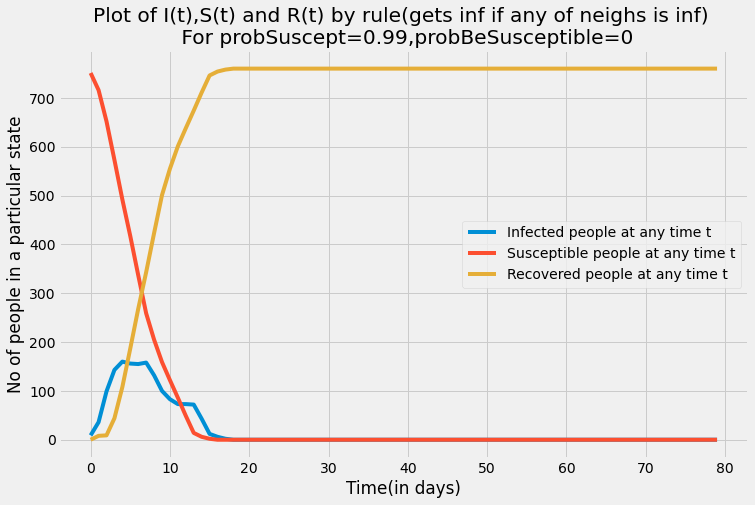

In [51]:
time_steps=np.arange(rows*cols)
str="Plot of I(t),S(t) and R(t) by rule(gets inf if any of neighs is inf) \n For probSuscept={},probBeSusceptible={}"
str=str.format(probSusceptible,probBeSusceptible)
plt.figure(figsize=(11,7))
plt.title(str)
plt.xlabel('Time(in days)')
plt.ylabel('No of people in a particular state')
plt.plot(time_steps,noOfInfectsAtAnyTime18_2,label='Infected people at any time t')
plt.plot(time_steps,noOfSusceptsAtAnyTime18_2,label='Susceptible people at any time t')
plt.plot(time_steps,noOfRecoveredAtAnyTime18_2,label='Recovered people at any time t')
plt.legend()

## With probSusceptible=0.8 

In [58]:
probSusceptible=0.8
rows,cols=10,2
grids18_3=DiseaseSpreadSim(20,38,probSusceptible,'reflecting',rows*cols-1,1)
noOfInfectsAtAnyTime18_3=noOfInfectsAtAnyTime.copy()
noOfSusceptsAtAnyTime18_3=noOfSusceptsAtAnyTime.copy()
noOfRecoveredAtAnyTime18_3=(np.array(noOfInfectsAtAnyTime18_3)+np.array(noOfSusceptsAtAnyTime18_3))
noOfRecoveredAtAnyTime18_3=760-noOfRecoveredAtAnyTime18_3

20


In [59]:
print(noOfInfectsAtAnyTime18_2)
print(noOfRecoveredAtAnyTime18_2)
print(noOfSusceptsAtAnyTime18_2)

[9, 36, 99, 143, 160, 156, 155, 158, 132, 100, 83, 73, 73, 72, 43, 12, 6, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[  0   8   9  44 108 187 268 343 423 501 555 601 638 674 711 746 754 758
 760 760 760 760 760 760 760 760 760 760 760 760 760 760 760 760 760 760
 760 760 760 760 760 760 760 760 760 760 760 760 760 760 760 760 760 760
 760 760 760 760 760 760 760 760 760 760 760 760 760 760 760 760 760 760
 760 760 760 760 760 760 760 760]
[751, 716, 652, 573, 492, 417, 337, 259, 205, 159, 122, 86, 49, 14, 6, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


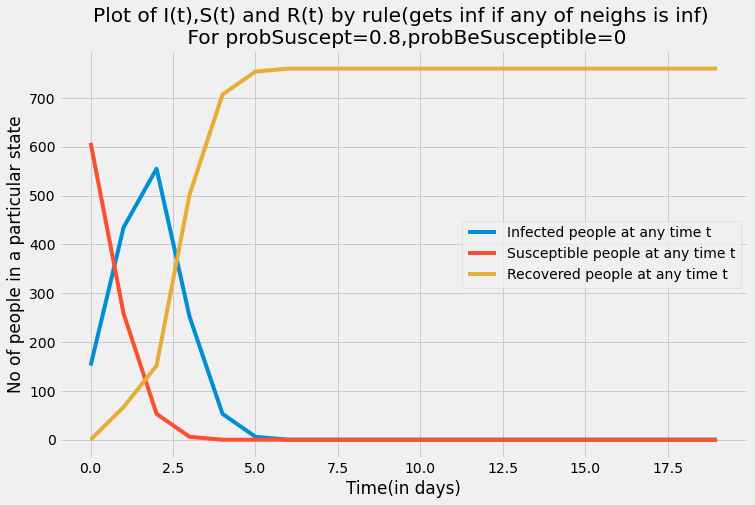

In [60]:
time_steps=np.arange(rows*cols)
str="Plot of I(t),S(t) and R(t) by rule(gets inf if any of neighs is inf) \n For probSuscept={},probBeSusceptible={}"
str=str.format(probSusceptible,probBeSusceptible)
plt.figure(figsize=(11,7))
plt.title(str)
plt.xlabel('Time(in days)')
plt.ylabel('No of people in a particular state')
plt.plot(time_steps,noOfInfectsAtAnyTime18_3,label='Infected people at any time t')
plt.plot(time_steps,noOfSusceptsAtAnyTime18_3,label='Susceptible people at any time t')
plt.plot(time_steps,noOfRecoveredAtAnyTime18_3,label='Recovered people at any time t')
plt.legend()

## Monte Carlo simluns as outputs for diff samples vary so to give some conclusion we need to take avg of some samples 

In [52]:
no_of_simulns=50

noOfInfectsAtAnyTime_total2=np.zeros(rows*cols)
noOfSusceptsAtAnyTime_total2=np.zeros(rows*cols)
noOfRecoversAtAnyTime_total2=np.zeros(rows*cols)

for i in range(no_of_simulns):
    grids_temp=DiseaseSpreadSim(20,38,probSusceptible,'reflecting',rows*cols-1,1)
    noOfInfectsAtAnyTime_temp=noOfInfectsAtAnyTime.copy()
    noOfSusceptsAtAnyTime_temp=noOfSusceptsAtAnyTime.copy()
    
    noOfRecoversAtAnyTime_temp=760-np.array(noOfInfectsAtAnyTime_temp)+np.array(noOfSusceptsAtAnyTime_temp)
    
    noOfInfectsAtAnyTime_total2=noOfInfectsAtAnyTime_total2+np.array(noOfInfectsAtAnyTime_temp)
    noOfSusceptsAtAnyTime_total2=noOfSusceptsAtAnyTime_total2+np.array(noOfSusceptsAtAnyTime_temp)
    noOfRecoversAtAnyTime_total2=noOfRecoversAtAnyTime_total2+np.array(noOfRecoversAtAnyTime_temp)
noOfInfectsAtAnyTime_total2/=no_of_simulns
noOfSusceptsAtAnyTime_total2/=no_of_simulns
noOfRecoversAtAnyTime_total2=760-(noOfInfectsAtAnyTime_total2+noOfSusceptsAtAnyTime_total2)

80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80


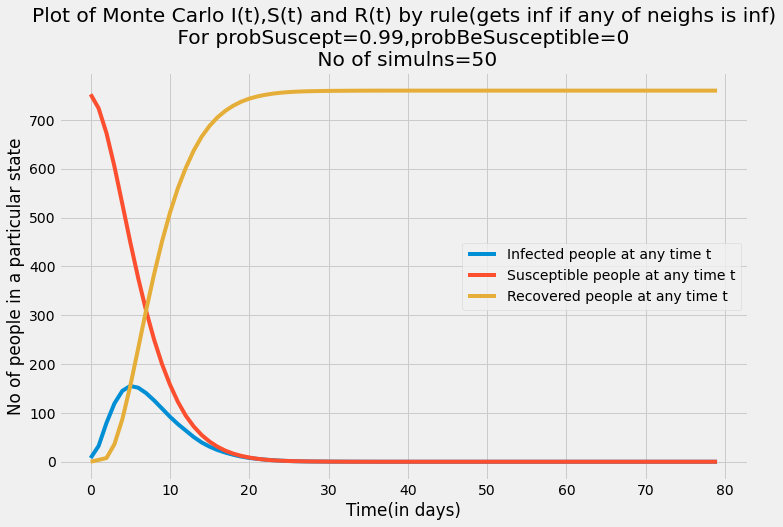

In [53]:
time_steps=np.arange(rows*cols)
str="Plot of Monte Carlo I(t),S(t) and R(t) by rule(gets inf if any of neighs is inf)\n For probSuscept={},probBeSusceptible={} \n No of simulns={}"
str=str.format(probSusceptible,probBeSusceptible,no_of_simulns)
plt.figure(figsize=(11,7))
plt.title(str)
plt.xlabel('Time(in days)')
plt.ylabel('No of people in a particular state')
plt.plot(time_steps,noOfInfectsAtAnyTime_total2,label='Infected people at any time t')
plt.plot(time_steps,noOfSusceptsAtAnyTime_total2,label='Susceptible people at any time t')
plt.plot(time_steps,noOfRecoversAtAnyTime_total2,label='Recovered people at any time t')
plt.legend()

In [80]:
noOfRecoversAtAnyTime_total2

array([  0.  ,   3.78,   7.6 ,  35.96,  87.2 , 155.3 , 232.44, 310.48,
       384.04, 451.  , 509.68, 560.02, 601.9 , 637.2 , 665.76, 687.8 ,
       705.28, 718.74, 729.26, 737.42, 743.52, 747.98, 751.36, 753.9 ,
       755.74, 757.04, 757.92, 758.52, 758.92, 759.2 , 759.42, 759.58,
       759.7 , 759.8 , 759.88, 759.94, 759.98, 760.  , 760.  , 760.  ,
       760.  , 760.  , 760.  , 760.  , 760.  , 760.  , 760.  , 760.  ,
       760.  , 760.  , 760.  , 760.  , 760.  , 760.  , 760.  , 760.  ,
       760.  , 760.  , 760.  , 760.  , 760.  , 760.  , 760.  , 760.  ,
       760.  , 760.  , 760.  , 760.  , 760.  , 760.  , 760.  , 760.  ,
       760.  , 760.  , 760.  , 760.  , 760.  , 760.  , 760.  , 760.  ])

## Using Rule2 for simuln 

In [68]:
probSusceptible=0.99
rows=40
cols=2

In [69]:
grids16=DiseaseSpreadSim(20,38,probSusceptible,'reflecting',rows*cols-1,2)

80


In [70]:
print(noOfInfectsAtAnyTime)
print(noOfSusceptsAtAnyTime)
noOfInfectsAtAnyTime16=noOfInfectsAtAnyTime.copy()
noOfSusceptsAtAnyTime16=noOfSusceptsAtAnyTime.copy()

[6, 18, 35, 45, 58, 70, 82, 82, 75, 68, 69, 80, 72, 63, 62, 65, 63, 53, 49, 51, 48, 34, 36, 43, 33, 29, 27, 18, 13, 10, 8, 8, 6, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[754, 738, 719, 693, 661, 623, 579, 541, 504, 473, 435, 393, 363, 330, 301, 265, 238, 212, 189, 161, 141, 127, 105, 84, 72, 55, 45, 37, 32, 27, 24, 19, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18]


In [71]:
noOfRecoveredAtAnyTime16=(np.array(noOfInfectsAtAnyTime16)+np.array(noOfSusceptsAtAnyTime16))

In [72]:
noOfRecoveredAtAnyTime16=np.array(noOfRecoveredAtAnyTime16)

In [73]:
noOfRecoveredAtAnyTime16=760-noOfRecoveredAtAnyTime16
print(len(noOfRecoveredAtAnyTime16),len(noOfInfectsAtAnyTime16),len(noOfInfectsAtAnyTime16))

80 80 80


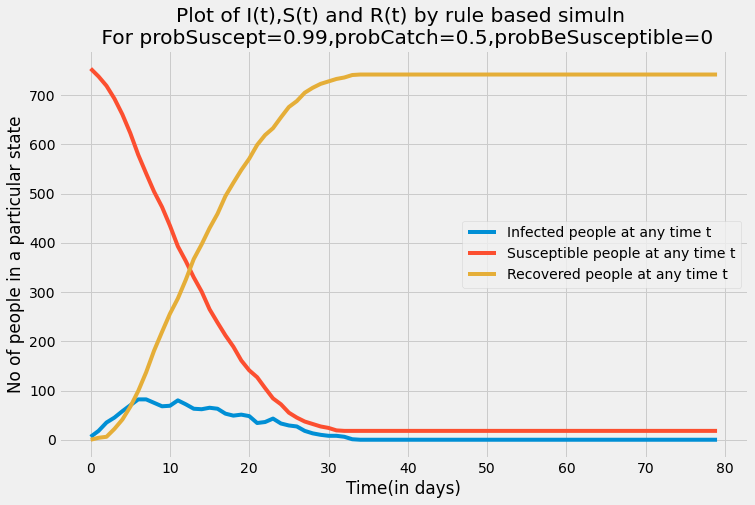

In [74]:
time_steps=np.arange(rows*cols)
str="Plot of I(t),S(t) and R(t) by rule based simuln \n For probSuscept={},probCatch={},probBeSusceptible={} No of simulns={}"
# str="Plot of Monte Carlo I(t),S(t) and R(t) by rule(gets inf if any of neighs is inf)\n For probSuscept={},probBeSusceptible={} \n No of simulns={}"
str=str.format(probSusceptible,probCatch,probBeSusceptible)
plt.figure(figsize=(11,7))
plt.title(str)
plt.xlabel('Time(in days)')
plt.ylabel('No of people in a particular state')
plt.plot(time_steps,noOfInfectsAtAnyTime16,label='Infected people at any time t')
plt.plot(time_steps,noOfSusceptsAtAnyTime16,label='Susceptible people at any time t')
plt.plot(time_steps,noOfRecoveredAtAnyTime16,label='Recovered people at any time t')
plt.legend()

In [75]:
noOfRecoveredAtAnyTime16

array([  0,   4,   6,  22,  41,  67,  99, 137, 181, 219, 256, 287, 325,
       367, 397, 430, 459, 495, 522, 548, 571, 599, 619, 633, 655, 676,
       688, 705, 715, 723, 728, 733, 736, 741, 742, 742, 742, 742, 742,
       742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742,
       742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742,
       742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742,
       742, 742])

In [76]:
no_of_simulns=50

noOfInfectsAtAnyTime_total3=np.zeros(rows*cols)
noOfSusceptsAtAnyTime_total3=np.zeros(rows*cols)
noOfRecoversAtAnyTime_total3=np.zeros(rows*cols)

for i in range(no_of_simulns):
    grids_temp=DiseaseSpreadSim(20,38,probSusceptible,'reflecting',rows*cols-1,2)
    noOfInfectsAtAnyTime_temp=noOfInfectsAtAnyTime.copy()
    noOfSusceptsAtAnyTime_temp=noOfSusceptsAtAnyTime.copy()
    
    noOfRecoversAtAnyTime_temp=760-np.array(noOfInfectsAtAnyTime_temp)+np.array(noOfSusceptsAtAnyTime_temp)
    
    noOfInfectsAtAnyTime_total3=noOfInfectsAtAnyTime_total3+np.array(noOfInfectsAtAnyTime_temp)
    noOfSusceptsAtAnyTime_total3=noOfSusceptsAtAnyTime_total3+np.array(noOfSusceptsAtAnyTime_temp)
    noOfRecoversAtAnyTime_total3=noOfRecoversAtAnyTime_total3+np.array(noOfRecoversAtAnyTime_temp)
noOfInfectsAtAnyTime_total3/=no_of_simulns
noOfSusceptsAtAnyTime_total3/=no_of_simulns
noOfRecoversAtAnyTime_total3=760-(noOfInfectsAtAnyTime_total3+noOfSusceptsAtAnyTime_total3)

80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80


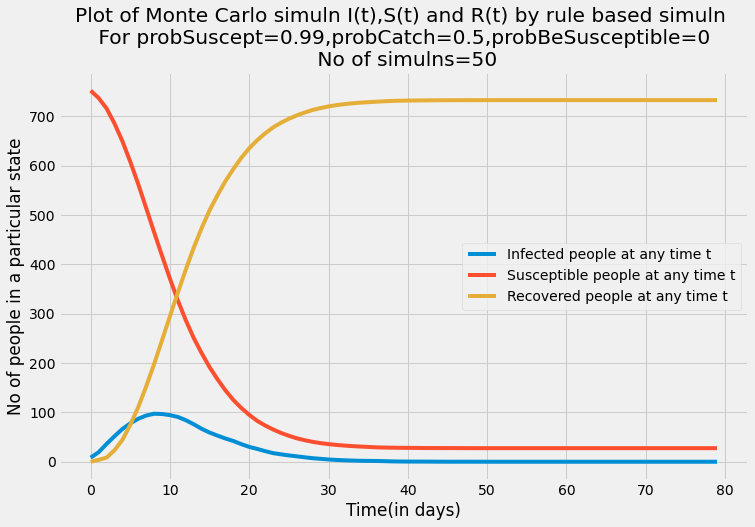

In [79]:
time_steps=np.arange(rows*cols)
str="Plot of Monte Carlo simuln I(t),S(t) and R(t) by rule based simuln \n For probSuscept={},probCatch={},probBeSusceptible={} \n No of simulns={}"
# str="Plot of Monte Carlo I(t),S(t) and R(t) by rule(gets inf if any of neighs is inf)\n For probSuscept={},probBeSusceptible={} \n No of simulns={}"
str=str.format(probSusceptible,probCatch,probBeSusceptible,no_of_simulns)
plt.figure(figsize=(11,7))
plt.title(str)
plt.xlabel('Time(in days)')
plt.ylabel('No of people in a particular state')
plt.plot(time_steps,noOfInfectsAtAnyTime_total3,label='Infected people at any time t')
plt.plot(time_steps,noOfSusceptsAtAnyTime_total3,label='Susceptible people at any time t')
plt.plot(time_steps,noOfRecoversAtAnyTime_total3,label='Recovered people at any time t')
plt.legend()

In [81]:
noOfRecoversAtAnyTime_total3

array([  0.  ,   3.94,   8.3 ,  23.16,  44.2 ,  74.7 , 110.52, 152.46,
       197.56, 245.98, 294.8 , 342.66, 389.2 , 433.4 , 473.34, 509.32,
       540.04, 568.42, 592.96, 615.48, 634.96, 651.1 , 665.04, 677.12,
       686.54, 694.6 , 701.56, 707.4 , 712.54, 716.38, 719.7 , 722.28,
       724.3 , 725.94, 727.26, 728.34, 729.22, 730.06, 730.8 , 731.26,
       731.52, 731.74, 731.86, 732.04, 732.18, 732.24, 732.28, 732.3 ,
       732.36, 732.42, 732.46, 732.48, 732.48, 732.48, 732.48, 732.48,
       732.48, 732.48, 732.48, 732.48, 732.48, 732.48, 732.48, 732.48,
       732.48, 732.48, 732.48, 732.48, 732.48, 732.48, 732.48, 732.48,
       732.48, 732.48, 732.48, 732.48, 732.48, 732.48, 732.48, 732.48])

## In diff eqn based model , there was beta and alpha , but there alpha represents avg no of days a person remians infected but here we have a fixed duration of days i.e. 2 for which a person remains infected  

## Simulating using Rule3

In [91]:
grids19=DiseaseSpreadSim(20,38,probSusceptible,'reflecting',rows*cols-1,3)
noOfInfectsAtAnyTime19=noOfInfectsAtAnyTime.copy()
noOfSusceptsAtAnyTime19=noOfSusceptsAtAnyTime.copy()
noOfRecoveredAtAnyTime19=(np.array(noOfInfectsAtAnyTime19)+np.array(noOfSusceptsAtAnyTime19))
noOfRecoveredAtAnyTime19=760-noOfRecoveredAtAnyTime19

80


In [92]:
print(noOfInfectsAtAnyTime19)
print(noOfRecoveredAtAnyTime19)
print(noOfSusceptsAtAnyTime19)

[4, 4, 6, 7, 10, 11, 11, 10, 10, 11, 11, 7, 4, 4, 4, 4, 4, 5, 5, 2, 1, 2, 3, 4, 5, 7, 7, 6, 4, 3, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[ 0  4  4  8 10 15 20 26 31 36 41 47 52 54 56 58 60 62 64 67 69 69 70 71
 73 75 78 82 85 88 89 91 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92
 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92 92
 92 92 92 92 92 92 92 92]
[756, 752, 750, 745, 740, 734, 729, 724, 719, 713, 708, 706, 704, 702, 700, 698, 696, 693, 691, 691, 690, 689, 687, 685, 682, 678, 675, 672, 671, 669, 668, 668, 668, 668, 668, 668, 668, 668, 668, 668, 668, 668, 668, 668, 668, 668, 668, 668, 668, 668, 668, 668, 668, 668, 668, 668, 668, 668, 668, 668, 668, 668, 668, 668, 668, 668, 668, 668, 668, 668, 668, 668, 668, 668, 668, 668, 668, 668, 668, 668]


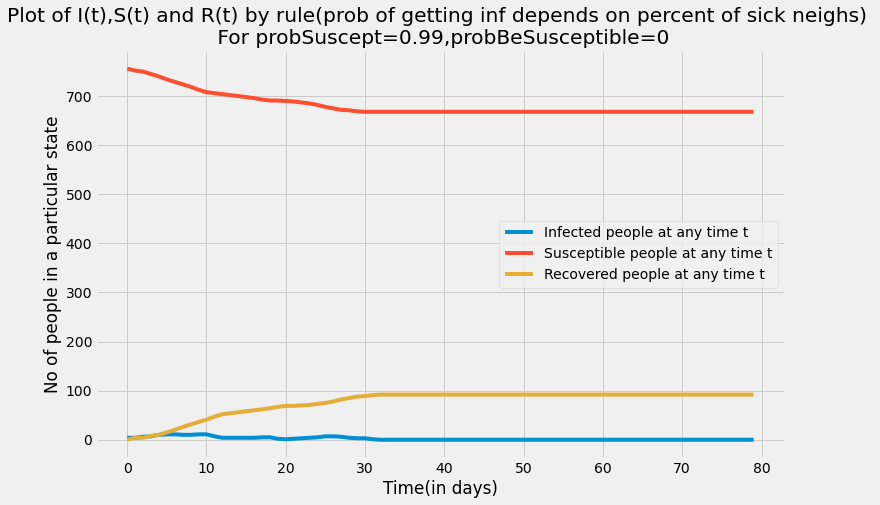

In [93]:
time_steps=np.arange(rows*cols)
str="Plot of I(t),S(t) and R(t) by rule(prob of getting inf depends on percent of sick neighs) \n For probSuscept={},probBeSusceptible={}"
str=str.format(probSusceptible,probBeSusceptible)
plt.figure(figsize=(11,7))
plt.title(str)
plt.xlabel('Time(in days)')
plt.ylabel('No of people in a particular state')
plt.plot(time_steps,noOfInfectsAtAnyTime19,label='Infected people at any time t')
plt.plot(time_steps,noOfSusceptsAtAnyTime19,label='Susceptible people at any time t')
plt.plot(time_steps,noOfRecoveredAtAnyTime19,label='Recovered people at any time t')
plt.legend()

## Doing Monte Carlo simulns for RUle 3

In [94]:
no_of_simulns=50

noOfInfectsAtAnyTime_total4=np.zeros(rows*cols)
noOfSusceptsAtAnyTime_total4=np.zeros(rows*cols)
noOfRecoversAtAnyTime_total4=np.zeros(rows*cols)

for i in range(no_of_simulns):
    grids_temp=DiseaseSpreadSim(20,38,probSusceptible,'reflecting',rows*cols-1,3)
    noOfInfectsAtAnyTime_temp=noOfInfectsAtAnyTime.copy()
    noOfSusceptsAtAnyTime_temp=noOfSusceptsAtAnyTime.copy()
    
    noOfRecoversAtAnyTime_temp=760-np.array(noOfInfectsAtAnyTime_temp)+np.array(noOfSusceptsAtAnyTime_temp)
    
    noOfInfectsAtAnyTime_total4=noOfInfectsAtAnyTime_total4+np.array(noOfInfectsAtAnyTime_temp)
    noOfSusceptsAtAnyTime_total4=noOfSusceptsAtAnyTime_total4+np.array(noOfSusceptsAtAnyTime_temp)
    noOfRecoversAtAnyTime_total4=noOfRecoversAtAnyTime_total4+np.array(noOfRecoversAtAnyTime_temp)
noOfInfectsAtAnyTime_total4/=no_of_simulns
noOfSusceptsAtAnyTime_total4/=no_of_simulns
noOfRecoversAtAnyTime_total4=760-(noOfInfectsAtAnyTime_total4+noOfSusceptsAtAnyTime_total4)

80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80


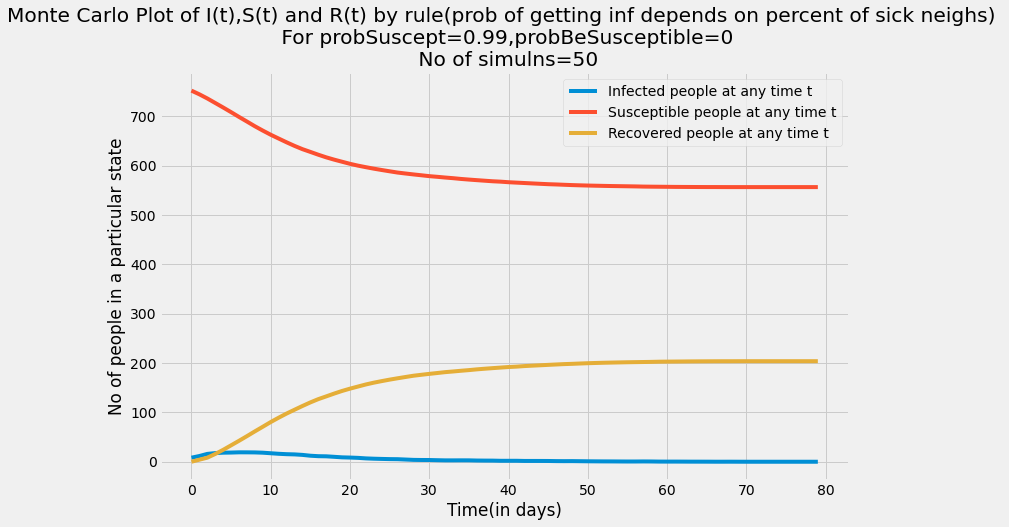

In [95]:
time_steps=np.arange(rows*cols)
str="Monte Carlo Plot of I(t),S(t) and R(t) by rule(prob of getting inf depends on percent of sick neighs) \n For probSuscept={},probBeSusceptible={}\n No of simulns={}"
str=str.format(probSusceptible,probBeSusceptible,no_of_simulns)
plt.figure(figsize=(11,7))
plt.title(str)
plt.xlabel('Time(in days)')
plt.ylabel('No of people in a particular state')
plt.plot(time_steps,noOfInfectsAtAnyTime_total4,label='Infected people at any time t')
plt.plot(time_steps,noOfSusceptsAtAnyTime_total4,label='Susceptible people at any time t')
plt.plot(time_steps,noOfRecoversAtAnyTime_total4,label='Recovered people at any time t')
plt.legend()

In [96]:
noOfSusceptsAtAnyTime_total4

array([751.76, 744.26, 735.9 , 726.74, 717.56, 708.14, 698.48, 689.1 ,
       679.6 , 670.78, 662.38, 654.68, 647.06, 639.8 , 633.18, 627.6 ,
       621.92, 616.6 , 611.94, 607.68, 603.46, 599.82, 596.66, 593.66,
       590.94, 588.32, 585.78, 583.84, 582.  , 580.28, 578.5 , 577.16,
       575.7 , 574.38, 572.84, 571.56, 570.38, 569.24, 568.12, 567.32,
       566.2 , 565.38, 564.58, 563.76, 562.98, 562.22, 561.68, 561.02,
       560.4 , 559.92, 559.48, 559.12, 558.78, 558.46, 558.22, 557.98,
       557.72, 557.36, 557.18, 557.04, 556.9 , 556.74, 556.64, 556.56,
       556.48, 556.42, 556.42, 556.36, 556.32, 556.32, 556.32, 556.32,
       556.32, 556.32, 556.32, 556.32, 556.32, 556.32, 556.32, 556.32])

## Simulating using Rule4

In [85]:
grids17=DiseaseSpreadSim(20,38,probSusceptible,'reflecting',rows*cols-1,4)
noOfInfectsAtAnyTime17=noOfInfectsAtAnyTime.copy()
noOfSusceptsAtAnyTime17=noOfSusceptsAtAnyTime.copy()
noOfRecoveredAtAnyTime17=(np.array(noOfInfectsAtAnyTime17)+np.array(noOfSusceptsAtAnyTime17))
noOfRecoveredAtAnyTime17=760-noOfRecoveredAtAnyTime17

80


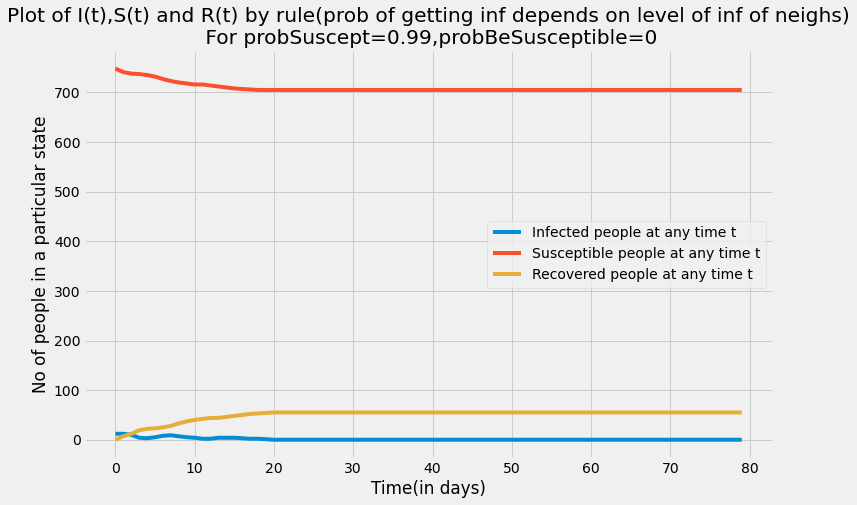

In [86]:
time_steps=np.arange(rows*cols)
str="Plot of I(t),S(t) and R(t) by rule(prob of getting inf depends on level of inf of neighs)\n For probSuscept={},probBeSusceptible={}\n No of simulns={}"
# str="Plot of Monte Carlo I(t),S(t) and R(t) by rule(prob of getting inf depends on level of inf of neighs)\n For probSuscept={},probBeSusceptible={} \n No of simulns={}"
str=str.format(probSusceptible,probBeSusceptible,no_of_simulns)
plt.figure(figsize=(11,7))
plt.title(str)
plt.xlabel('Time(in days)')
plt.ylabel('No of people in a particular state')
plt.plot(time_steps,noOfInfectsAtAnyTime17,label='Infected people at any time t')
plt.plot(time_steps,noOfSusceptsAtAnyTime17,label='Susceptible people at any time t')
plt.plot(time_steps,noOfRecoveredAtAnyTime17,label='Recovered people at any time t')
plt.legend()

In [84]:
probBeSusceptible

0

## Doing Monte Carlo Simulns as we are dealing with stochastic models here 

In [87]:
no_of_simulns=50

noOfInfectsAtAnyTime_total=np.zeros(rows*cols)
noOfSusceptsAtAnyTime_total=np.zeros(rows*cols)
noOfRecoversAtAnyTime_total=np.zeros(rows*cols)

for i in range(no_of_simulns):
    grids_temp=DiseaseSpreadSim(20,38,probSusceptible,'reflecting',rows*cols-1,4)
    noOfInfectsAtAnyTime_temp=noOfInfectsAtAnyTime.copy()
    noOfSusceptsAtAnyTime_temp=noOfSusceptsAtAnyTime.copy()
    
    noOfRecoversAtAnyTime_temp=760-np.array(noOfInfectsAtAnyTime_temp)+np.array(noOfSusceptsAtAnyTime_temp)
    
    noOfInfectsAtAnyTime_total=noOfInfectsAtAnyTime_total+np.array(noOfInfectsAtAnyTime_temp)
    noOfSusceptsAtAnyTime_total=noOfSusceptsAtAnyTime_total+np.array(noOfSusceptsAtAnyTime_temp)
    noOfRecoversAtAnyTime_total=noOfRecoversAtAnyTime_total+np.array(noOfRecoversAtAnyTime_temp)
noOfInfectsAtAnyTime_total/=no_of_simulns
noOfSusceptsAtAnyTime_total/=no_of_simulns
noOfRecoversAtAnyTime_total=760-(noOfInfectsAtAnyTime_total+noOfSusceptsAtAnyTime_total)

80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80


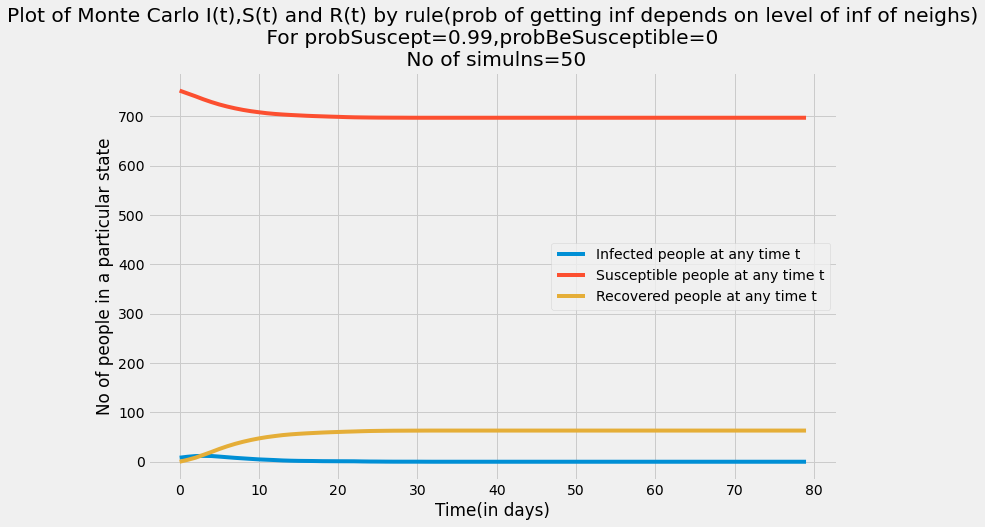

In [88]:
time_steps=np.arange(rows*cols)
str="Plot of Monte Carlo I(t),S(t) and R(t) by rule(prob of getting inf depends on level of inf of neighs)\n For probSuscept={},probBeSusceptible={} \n No of simulns={}"
str=str.format(probSusceptible,probBeSusceptible,no_of_simulns)
plt.figure(figsize=(11,7))
plt.title(str)
plt.xlabel('Time(in days)')
plt.ylabel('No of people in a particular state')
plt.plot(time_steps,noOfInfectsAtAnyTime_total,label='Infected people at any time t')
plt.plot(time_steps,noOfSusceptsAtAnyTime_total,label='Susceptible people at any time t')
plt.plot(time_steps,noOfRecoversAtAnyTime_total,label='Recovered people at any time t')
plt.legend()

In [89]:
noOfRecoversAtAnyTime_total

array([ 0.  ,  3.86,  8.2 , 13.96, 19.7 , 25.82, 31.32, 36.24, 40.46,
       44.12, 47.28, 49.9 , 52.04, 53.98, 55.44, 56.58, 57.54, 58.34,
       59.14, 59.78, 60.32, 60.88, 61.34, 61.86, 62.26, 62.5 , 62.7 ,
       62.86, 62.92, 63.  , 63.04, 63.12, 63.16, 63.16, 63.16, 63.16,
       63.16, 63.16, 63.16, 63.16, 63.16, 63.16, 63.16, 63.16, 63.16,
       63.16, 63.16, 63.16, 63.16, 63.16, 63.16, 63.16, 63.16, 63.16,
       63.16, 63.16, 63.16, 63.16, 63.16, 63.16, 63.16, 63.16, 63.16,
       63.16, 63.16, 63.16, 63.16, 63.16, 63.16, 63.16, 63.16, 63.16,
       63.16, 63.16, 63.16, 63.16, 63.16, 63.16, 63.16, 63.16])